## <code style="background:white;color:black"> **1. IMPORT REQUIRED LIBRARIES** </code>

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
import math
import statsmodels.api as sm
import scipy.stats as st
from scipy.stats import chi2_contingency, skew
from itertools import combinations
from xgboost import XGBClassifier as xgbm
import xgboost as xgb
from xgboost import plot_importance, plot_tree, DMatrix
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, f1_score, make_scorer, recall_score, precision_score, silhouette_score, davies_bouldin_score, calinski_harabasz_score, homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, mutual_info_score, normalized_mutual_info_score, silhouette_samples, silhouette_score, davies_bouldin_score, calinski_harabasz_score, homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, mutual_info_score, normalized_mutual_info_score
from imblearn.over_sampling import SMOTE
import joblib


## <code style="background:white;color:black"> **2. IMPORT DATA** </code>

In [25]:
df = pd.read_csv("data/raw-data/bank-data.csv")
df.head(5)

id  CustomerId         Surname  CreditScore Geography Gender   Age  Tenure  \
0   0    15674932  Okwudilichukwu          668    France   Male  33.0       3   
1   1    15749177   Okwudiliolisa          627    France   Male  33.0       1   
2   2    15694510           Hsueh          678    France   Male  40.0      10   
3   3    15741417             Kao          581    France   Male  34.0       2   
4   4    15766172       Chiemenam          716     Spain   Male  33.0       5   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              2        1.0             0.0        181449.97   
1       0.00              2        1.0             1.0         49503.50   
2       0.00              2        1.0             0.0        184866.69   
3  148882.54              1        1.0             1.0         84560.88   
4       0.00              2        1.0             1.0         15068.83   

   Exited  
0       0  
1       0  
2       0  
3       0  
4       0

## <code style="background:white;color:black"> **3. CHECK THE VALUES AND FEATURES OF THE DATA SET** </code>

In [26]:
df.info() # check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [27]:
df.isnull().sum() # double check for missing values

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [28]:
df.shape

(165034, 14)

In [29]:
df["id"].nunique() # check for number of entries

165034

In [30]:
duplicates = df["id"].value_counts() # check if there is any duplicate entries
duplicates = duplicates[duplicates > 1]
print(f"Number of duplicate entries: {len(duplicates)}")

Number of duplicate entries: 0


### <code style="background:white;color:black"> **3.1. Check the Categorical Values/Labels** </code>

In [31]:
df["Geography"].value_counts() # check for categorical values

Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64

In [32]:
df["Gender"].value_counts() # check for categorical values

Gender
Male      93150
Female    71884
Name: count, dtype: int64

## <code style="background:white;color:black"> **4. DESCRIPTIVE ANALYSIS** </code> 

### <code style="background:white;color:black" > **4.1. Basic Statistics** </code>

In [33]:
df.describe()

id    CustomerId    CreditScore            Age         Tenure  \
count  165034.0000  1.650340e+05  165034.000000  165034.000000  165034.000000   
mean    82516.5000  1.569201e+07     656.454373      38.125888       5.020353   
std     47641.3565  7.139782e+04      80.103340       8.867205       2.806159   
min         0.0000  1.556570e+07     350.000000      18.000000       0.000000   
25%     41258.2500  1.563314e+07     597.000000      32.000000       3.000000   
50%     82516.5000  1.569017e+07     659.000000      37.000000       5.000000   
75%    123774.7500  1.575682e+07     710.000000      42.000000       7.000000   
max    165033.0000  1.581569e+07     850.000000      92.000000      10.000000   

             Balance  NumOfProducts      HasCrCard  IsActiveMember  \
count  165034.000000  165034.000000  165034.000000   165034.000000   
mean    55478.086689       1.554455       0.753954        0.497770   
std     62817.663278       0.547154       0.430707        0.499997   
min         0.000000       1.000000       0.000000        0.000000   
25%         0.000000       1.000000       1.000000        0.000000   
50%         0.000000       2.000000       1.000000        0.000000   
75%    119939.517500       2.000000       1.000000        1.000000   
max    250898.090000       4.000000       1.000000        1.000000   

       EstimatedSalary         Exited  
count    165034.000000  165034.000000  
mean     112574.822734       0.211599  
std       50292.865585       0.408443  
min          11.580000       0.000000  
25%       74637.570000       0.000000  
50%      117948.000000       0.000000  
75%      155152.467500       0.000000  
max      199992.480000       1.000000

In [34]:
numeric_cols = df.select_dtypes(include=["number"])  # Select numeric columns
ranges = {col: (numeric_cols[col].min(), numeric_cols[col].max()) for col in numeric_cols.columns}

for column, value_range in ranges.items():
    print(f"{column}: Range ({value_range[0]:}–{value_range[1]:})")

id: Range (0–165033)
CustomerId: Range (15565701–15815690)
CreditScore: Range (350–850)
Age: Range (18.0–92.0)
Tenure: Range (0–10)
Balance: Range (0.0–250898.09)
NumOfProducts: Range (1–4)
HasCrCard: Range (0.0–1.0)
IsActiveMember: Range (0.0–1.0)
EstimatedSalary: Range (11.58–199992.48)
Exited: Range (0–1)


##### <code style="background:orange;color:black"> **Insights** </code>

Based on the descriptive analysis:
 1. The credit score distribution (350-850) spans the entire FICO range

 2. The mean credit score (656) considered as a "fair" score although it is very close to upper bracket (650) of "bad" scoring.

 3. With mean and median credit score being very close, it indicates that a normal distribution.

 4. 50% of customers are between 32 (25th percentile) and 42 (75th percentile) years old

 5. Most customers have 1 or 2 products (median 2)

 6. About 75% of the customers own a credit card
 
 7. Around 21% is concerning because it signals that about one-fifth of the customers have left the bank.



### <code style="background:white;color:black"> **4.2. Target Variable Analysis** </code>

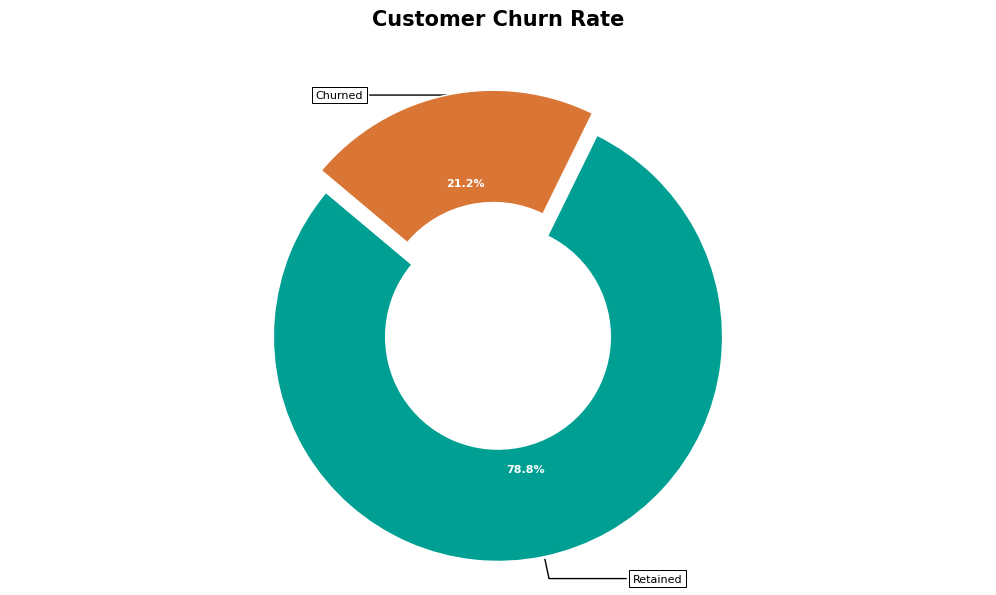

In [35]:
# Check the target variable
data = df["Exited"].value_counts().to_numpy()
labels = ["Retained", "Churned"]

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"), tight_layout=True)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct="%1.1f%%", 
                                  textprops=dict(color="w", weight="bold"),
                                  wedgeprops=dict(width=0.5, edgecolor="w"), 
                                  startangle=140,
                                  explode=(0, 0.1),
                                  colors=["#009F93", "#DA7635"])

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1) / 2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(labels[i], xy=(x, y), xytext=(0.6 * np.sign(x), 1.1 * y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Customer Churn Rate")
ax.axis("equal")

plt.show()

In [36]:
df["Exited"].value_counts(normalize=True)

Exited
0    0.788401
1    0.211599
Name: proportion, dtype: float64

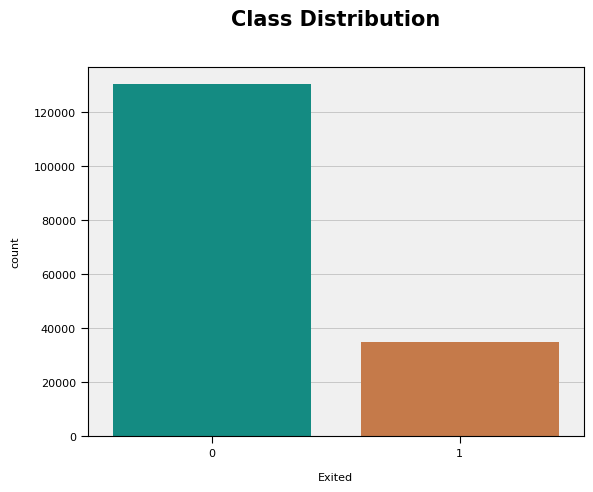

In [37]:
custom_palette = ["#009F93", "#DA7635"]
sns.countplot(x="Exited", data=df, hue="Exited", legend=False, palette=custom_palette)
plt.title("Class Distribution")
plt.show()

##### <code style="background:orange;color:black"> **Insights** </code>

This class distribution indicates that the dataset is imbalanced, with about 21.16% of customers labeled as Exited (churned) and 78.84% labeled as Retained (not churned). This imbalance can impact the performance of the predictive model, as most algorithms tend to favor the majority class. So this issue will be handled later.

## <code style="background:white;color:black"> **5. EXPLARATORY ANALYSIS** </code>

In [38]:
# Select the numerical and categorical columns
df_numerical = df[["Age", "Balance", "EstimatedSalary", "CreditScore", "Tenure", "NumOfProducts"]]
df_categorical = df[["Geography","Gender","HasCrCard","IsActiveMember"]]
df_target = df[["Exited"]]
print(df_numerical.head())
print(df_categorical.head())
print(df_target.head())

    Age    Balance  EstimatedSalary  CreditScore  Tenure  NumOfProducts
0  33.0       0.00        181449.97          668       3              2
1  33.0       0.00         49503.50          627       1              2
2  40.0       0.00        184866.69          678      10              2
3  34.0  148882.54         84560.88          581       2              1
4  33.0       0.00         15068.83          716       5              2
  Geography Gender  HasCrCard  IsActiveMember
0    France   Male        1.0             0.0
1    France   Male        1.0             1.0
2    France   Male        1.0             0.0
3    France   Male        1.0             1.0
4     Spain   Male        1.0             1.0
   Exited
0       0
1       0
2       0
3       0
4       0


In [39]:
# Setting global graph styles
plt.rcParams.update({
    "lines.linewidth": 2.5,
    "axes.titleweight": "bold",
    "axes.titlelocation": "center",
    "axes.titlepad": 30.0,
    "axes.labelpad": 10.0,
    "axes.titlesize": 15,
    "font.family": "sans-serif",
    "font.size": 8,
    "axes.facecolor": "#f0f0f0",
    "axes.grid.axis": "y",
    "axes.grid": True,
    "axes.axisbelow": True,
    "grid.color": "gray",
    "grid.linewidth": 0.5,
    "grid.alpha": 0.5,
    "grid.linestyle": "-",
    "xtick.major.size": 5,
    "ytick.major.size": 5,
})

### <code style="background:white;color:black" > **5.1. Categorical Variable Analysis** </code>

#### <code style="background:white;color:black" > **5.1.1. Univariate Analysis** </code>

In [40]:
for var in df_categorical:
    print(f"Frequency Distribution for {var}:")
    print(df[var].value_counts(normalize=True) * 100)
    print("\n")

Frequency Distribution for Geography:
Geography
France     57.088236
Spain      21.942751
Germany    20.969012
Name: proportion, dtype: float64


Frequency Distribution for Gender:
Gender
Male      56.442915
Female    43.557085
Name: proportion, dtype: float64


Frequency Distribution for HasCrCard:
HasCrCard
1.0    75.395373
0.0    24.604627
Name: proportion, dtype: float64


Frequency Distribution for IsActiveMember:
IsActiveMember
0.0    50.222984
1.0    49.777016
Name: proportion, dtype: float64




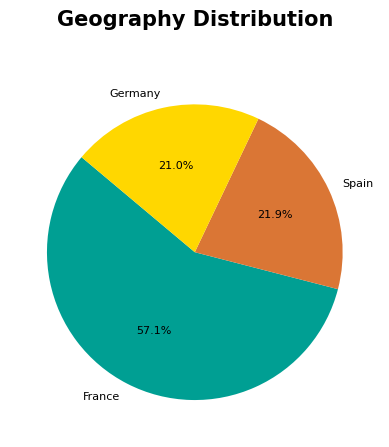

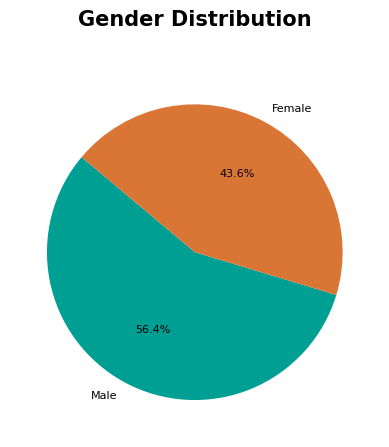

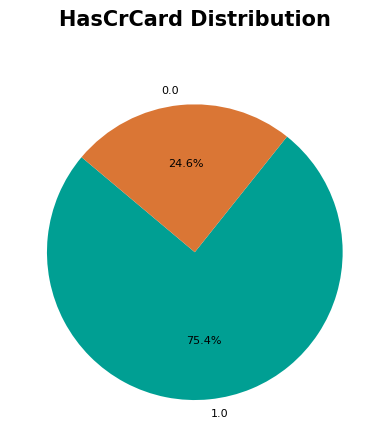

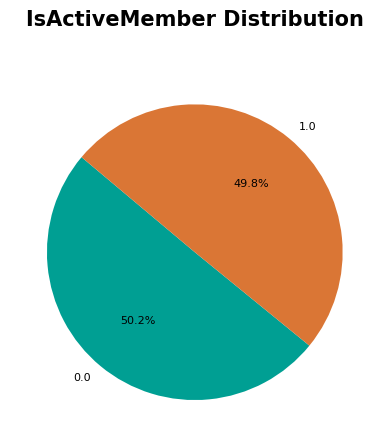

In [41]:
for var in df_categorical:
    df_categorical[var].value_counts().plot(kind="pie", autopct="%1.1f%%", startangle=140, colors=["#009F93", "#DA7635", "#FFD700"])
    plt.title(f"{var} Distribution")
    plt.ylabel("")
    plt.show()

##### <code style="background:orange;color:black"> **Insights** </code>

1. The majority of customers are from France, followed by Spain and Germany. Since this variable is not balanced, it’s important to check how churn behavior differs across regions.

2. The dataset has more male customers than female customers. But it is not significantly imbalanced. Gender imbalance may affect churn rate analysis. Analyzing churn rate by gender will show if gender impacts churn.

3. Most customers hold a credit card which shows a higher imbalance (75.4% to 24.6%).

4. The distribution between active and inactive members is relatively balanced. This makes it easier to analyze churn without bias from an imbalanced dataset. 




#### <code style="background:white;color:black"> **5.1.2. Bivariate Analysis** </code>

C:\Users\Furkan\AppData\Local\Temp\ipykernel_21580\780546112.py:14: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(ax=axs[i, 0],
C:\Users\Furkan\AppData\Local\Temp\ipykernel_21580\780546112.py:14: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(ax=axs[i, 0],
C:\Users\Furkan\AppData\Local\Temp\ipykernel_21580\780546112.py:14: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(ax=axs[i, 0],
C:\Users\Furkan\AppData\Local\Temp\ipykernel_21580\780546112.py:14: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(ax=axs[i, 0],


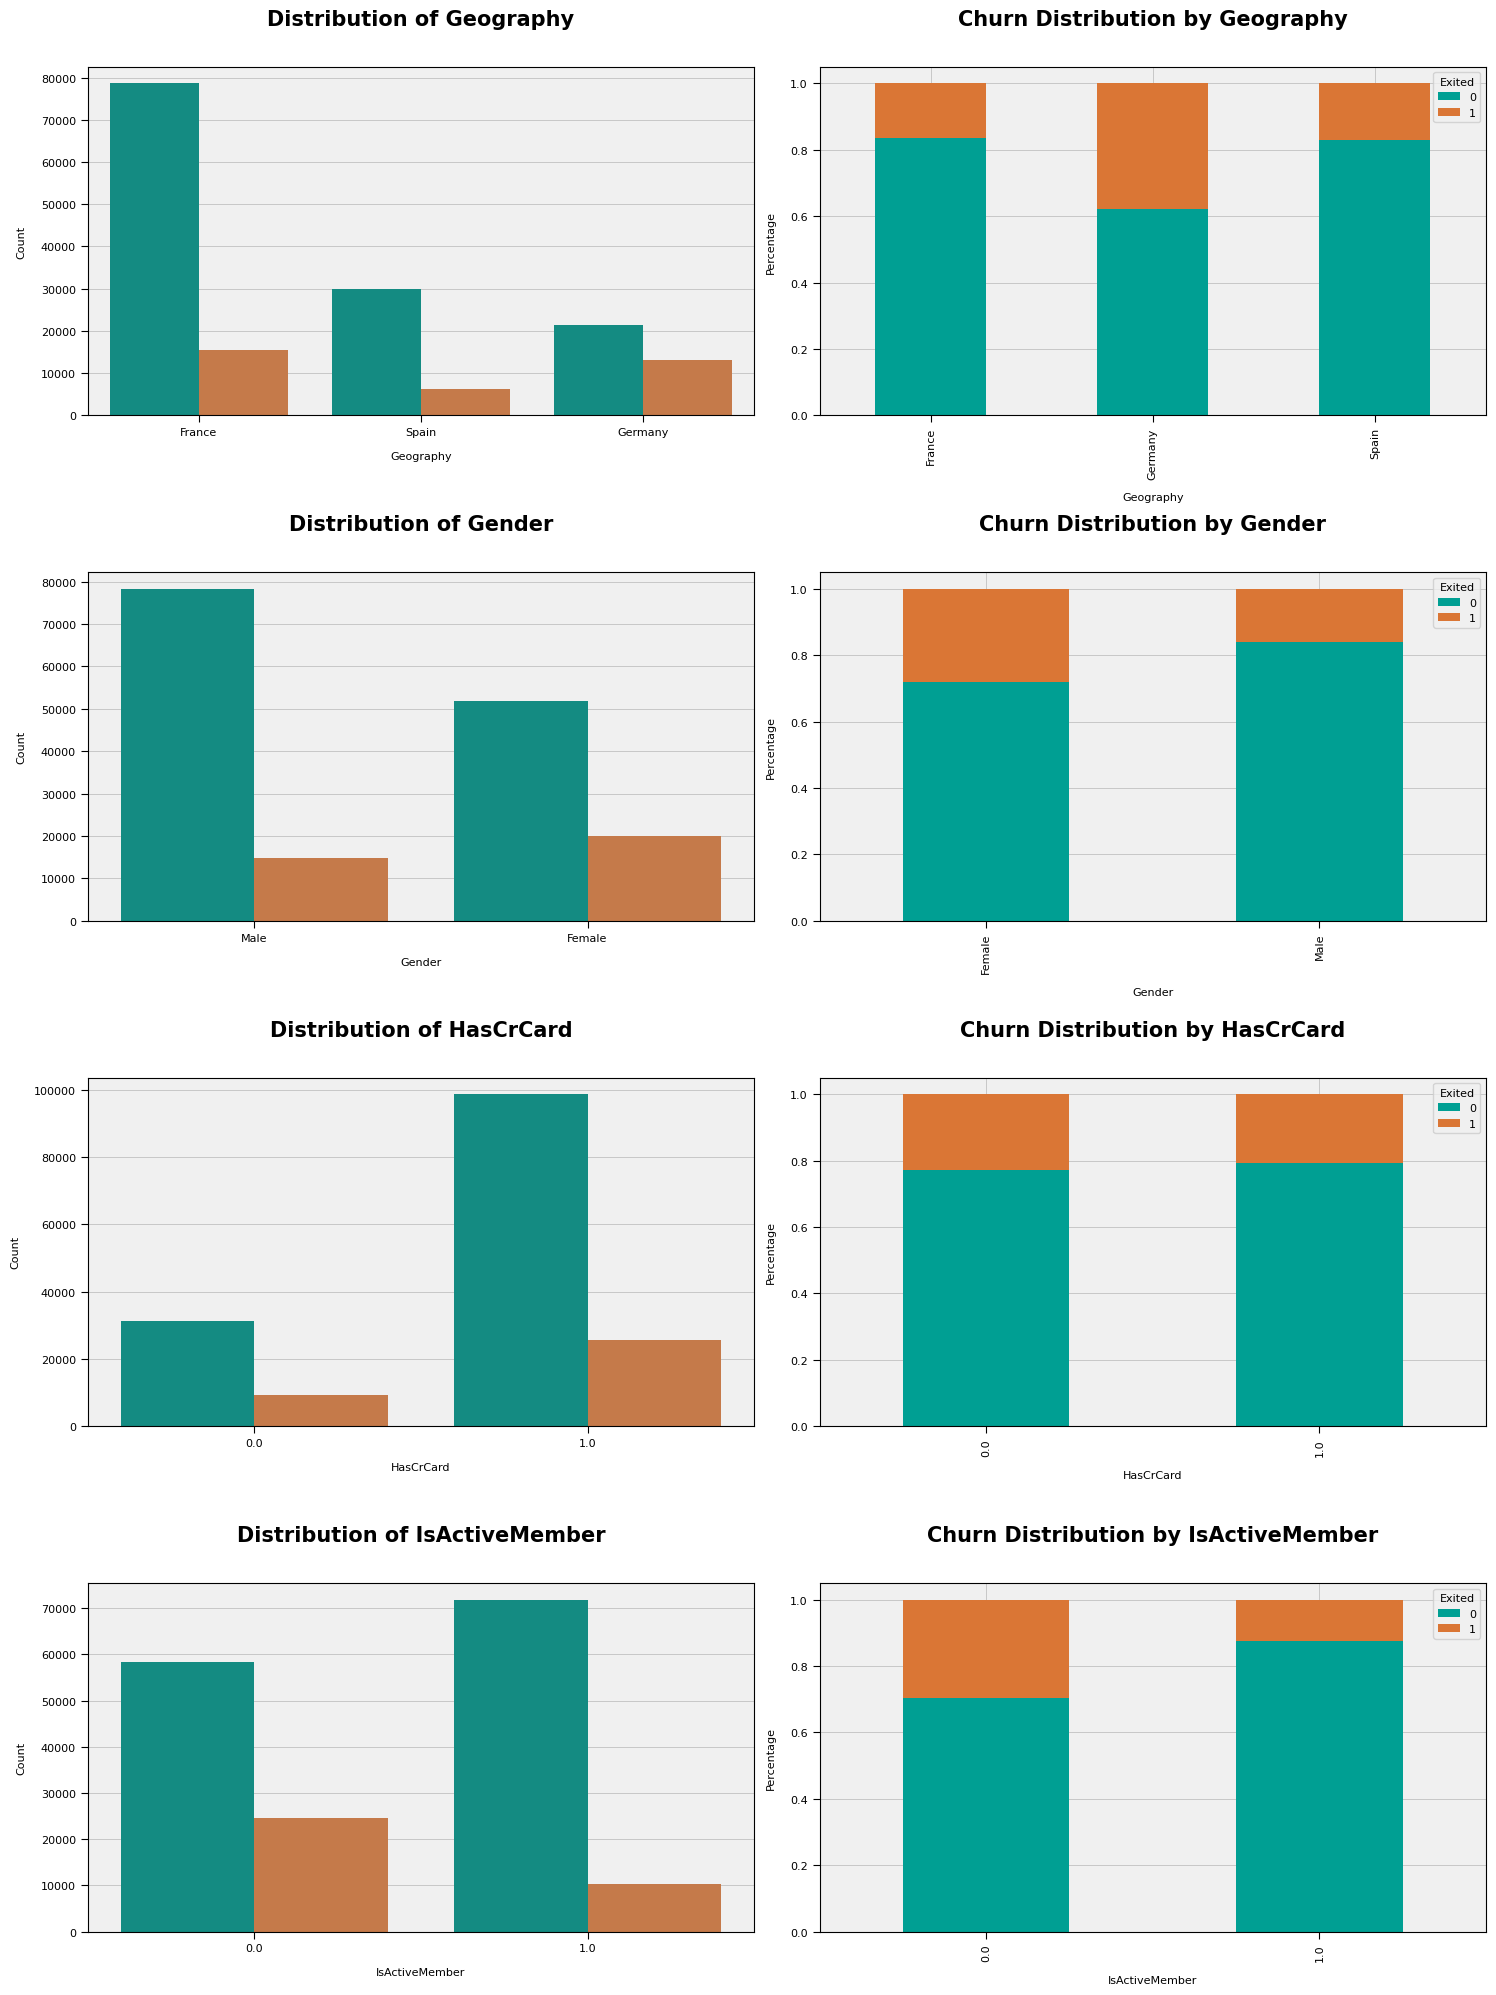

In [42]:
custom_palette=["#009F93", "#DA7635", "#E6E49F"]

n_rows = len(df_categorical.columns)

fig, axs = plt.subplots(n_rows, 2, figsize=(15, 5*n_rows))

if n_rows == 1:
    axs = axs.reshape(2,1)


# Loop through categorical variables for the first graph (bar plot)
for i, var in enumerate(df_categorical):
    ax = axs[i, 0]  # Access the subplot for the current variable
    sns.countplot(ax=axs[i, 0], 
                x=df[var], 
                palette=custom_palette,
                hue=df["Exited"],
                legend=False)
    axs[i, 0].set_title(f"Distribution of {var}")
    axs[i, 0].set_xlabel(var)
    axs[i, 0].set_ylabel("Count")

# Loop through categorical variables for the second graph (stacked bar plot)
for i, var in enumerate(df_categorical.columns):
    ax = axs[i, 1]  # Access the subplot for the current variable
    contingency_table = pd.crosstab(df[var], df["Exited"], normalize="index")
    contingency_table.plot(kind="bar", 
                           ax=axs[i, 1], 
                           stacked=True, 
                           color=custom_palette,
                           legend=True)
    axs[i, 1].set_title(f"Churn Distribution by {var}")
    axs[i, 1].set_xlabel(var)
    axs[i, 1].set_ylabel("Percentage")

fig.tight_layout()

plt.show()

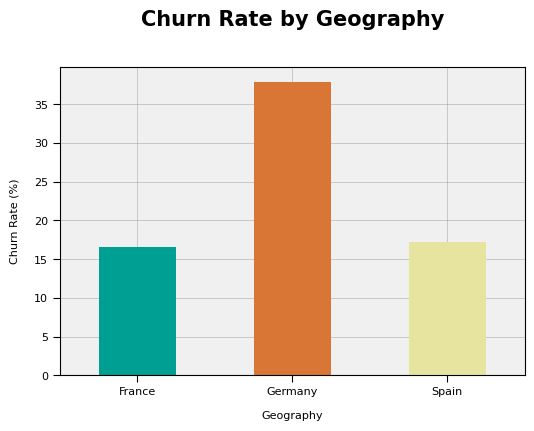

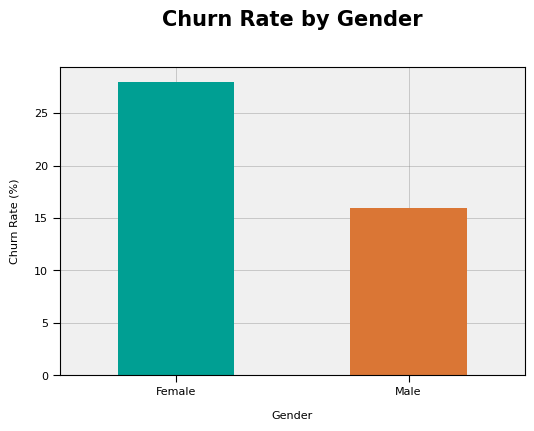

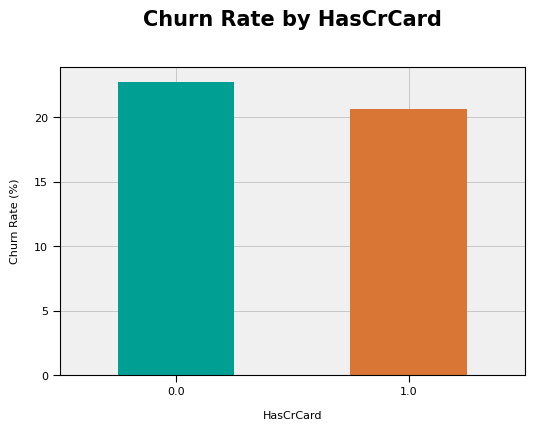

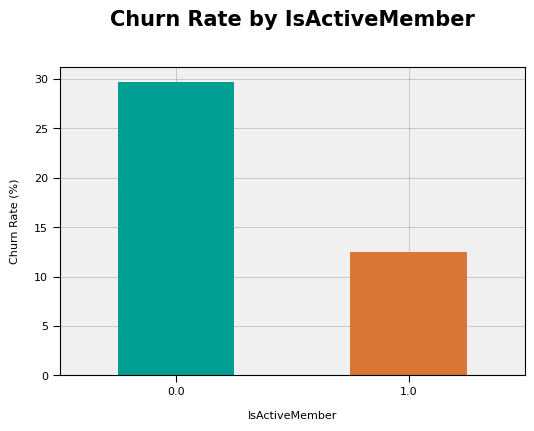

In [43]:
for var in df_categorical:
    churn_rate = df.groupby(var)["Exited"].mean() * 100
    plt.figure(figsize=(6, 4))
    churn_rate.plot(kind="bar", color=["#009F93", "#DA7635", "#E6E49F"])
    plt.title(f"Churn Rate by {var}")
    plt.ylabel("Churn Rate (%)")
    plt.xlabel(var)
    plt.xticks(rotation=0)
    plt.show()

##### <code style="background:orange;color:black"> **Insights** </code>

1. The highest churn rate is observed in Germany, exceeding 35%. This high attrition rate in the German market is a significant concern. In contrast, churn rates in France and Spain are comparable and do not exhibit statistically significant differences.

2. Female customers exhibit a higher churn rate than male customers, with a difference of approximately 10%. This disparity suggests that gender should be considered a crucial factor in further churn analysis to understand the underlying reasons for this difference.

3. Customers who own a credit card have a slightly lower churn rate compared to those without, with a difference of approximately 5%. While the difference is relatively small, it may still warrant further investigation to determine if credit card ownership is a contributing factor to customer retention.

4. Active members demonstrate significantly lower churn rates, around 12%, compared to inactive members, who have a churn rate of approximately 30%. This substantial difference highlights the importance of member engagement and suggests that strategies to increase member activity could be highly effective in reducing overall churn.

#### <code style="background:white;color:black"> **5.1.3. Chi-Square Test** </code>

In [44]:

for var in df_categorical:
    contingency_table = pd.crosstab(df[var], df["Exited"])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"{var}: Chi2={chi2:.2f}, P-value={p:.4f}")


Geography: Chi2=7358.67, P-value=0.0000
Gender: Chi2=3538.45, P-value=0.0000
HasCrCard: Chi2=80.78, P-value=0.0000
IsActiveMember: Chi2=7293.41, P-value=0.0000


##### <code style="background:orange;color:black"> **Insights** </code>

Results show that all categorical variables have p<0.0001 which indicates a statistically significant association between the variables and customer churn. P-value close to zero indicates  strong evidence against the null hypothesis. The results strongly suggest there is a statistically significant association between each of the categorical variables (`Geography`, `Gender`, `HasCrCard`, `IsActiveMember`) and the `Exited` (churn) variable. Though it should be noted that even if the association between `HasCrCar` and `Exited` significant, the chi-square value is much smaller compared to `Geography`and `Gender`, implying a weaker correlation.

Keep in mind that with very large sample sizes, even small differences or associations can become statistically significant, leading to very small p-values.

Overall, the results indicate a very strong association between each of the categorical variables and customer churn. Though we need to calculate the effect sizes (Cramér"s V) to quantify the strength of these associations. This will give us a more complete picture than just the p-values

#### <code style="background:white;color:black"> **5.1.4. Cramer's V Tests** </code>

In [45]:
# Function to compute Cramer"s V
def cramers_v(chi2, n, min_dim):
    return np.sqrt(chi2 / (n * (min_dim - 1)))

df_cramers_v = pd.concat([df_categorical, df_target], axis=1)

def compute_cramers_v_for_df(df_cramers_v, target="Exited"):
    results = {}
    for col in df_cramers_v.columns:
        if col != target:
            contingency = pd.crosstab(df_cramers_v[col], df_cramers_v[target])
            chi2, p, dof, expected = chi2_contingency(contingency)
            n = contingency.sum().sum()
            min_dim = min(contingency.shape)
            cramer_v = cramers_v(chi2, n, min_dim)
            results[col] = {"Cramer_V": cramer_v, "P-Value": p}
    return pd.DataFrame(results).T

cramers_v_results = compute_cramers_v_for_df(df_cramers_v)
print(cramers_v_results)


                Cramer_V       P-Value
Geography       0.211161  0.000000e+00
Gender          0.146427  0.000000e+00
HasCrCard       0.022124  2.522693e-19
IsActiveMember  0.210222  0.000000e+00


##### <code style="background:orange;color:black"> **Insights** </code>

Results indicate that there is modarate association for the majority of the categorical variables for the target variable.
* **Geography (0.21)**: Moderate association with churn (important for modeling).
* **Gender (0.15)**: Moderate but weaker association than Geography.
* **HasCrCard (0.02)**: Very weak association, unlikely to contribute much to predicting churn just as suggested
* **IsActiveMember (0.21)**: Similar strength to Geography, indicating relevance to churn.


P-values are very small (near zero), indicating that the observed associations are statistically significant for all variables, meaning the relationships are not due to random chance.



### <code style="background:white;color:black" > **5.2. Numerical Variable Analysis** </code>

#### <code style="background:white;color:black" > **5.2.1. Univariate Analysis** </code>

Descriptive Statistics for Age:
count    165034.000000
mean         38.125888
std           8.867205
min          18.000000
25%          32.000000
50%          37.000000
75%          42.000000
max          92.000000
Name: Age, dtype: float64

Skewness of Age: 0.97

Age is moderately positively skewed.


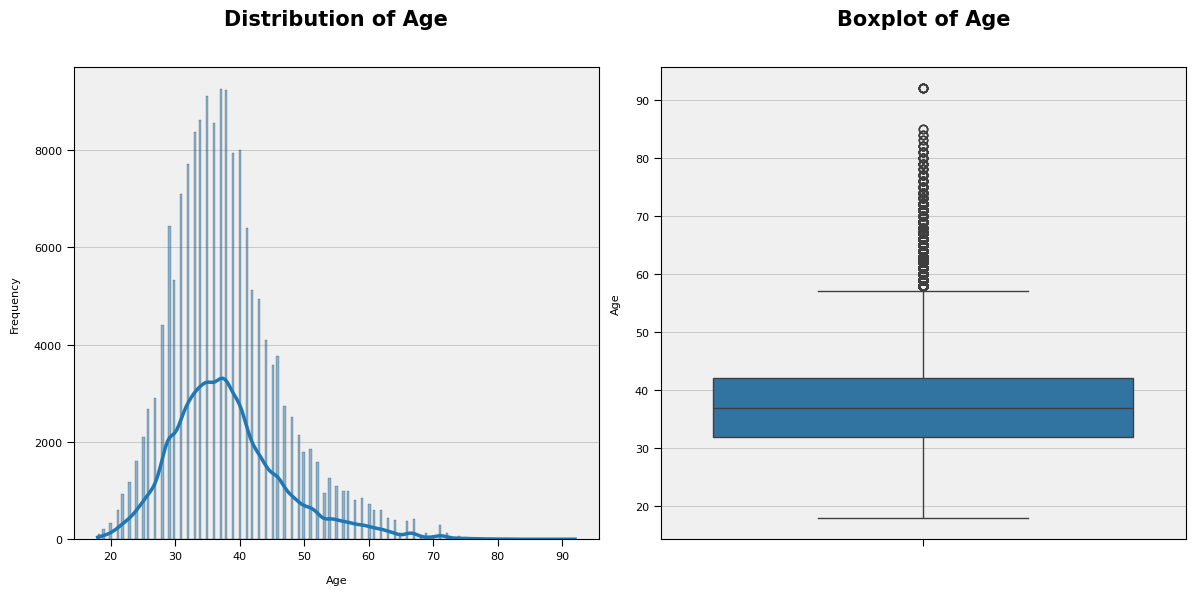

----------------------------------------------------------------------------------------------------
Descriptive Statistics for Balance:
count    165034.000000
mean      55478.086689
std       62817.663278
min           0.000000
25%           0.000000
50%           0.000000
75%      119939.517500
max      250898.090000
Name: Balance, dtype: float64

Skewness of Balance: 0.38

Balance is approximately normally distributed or slightly skewed.


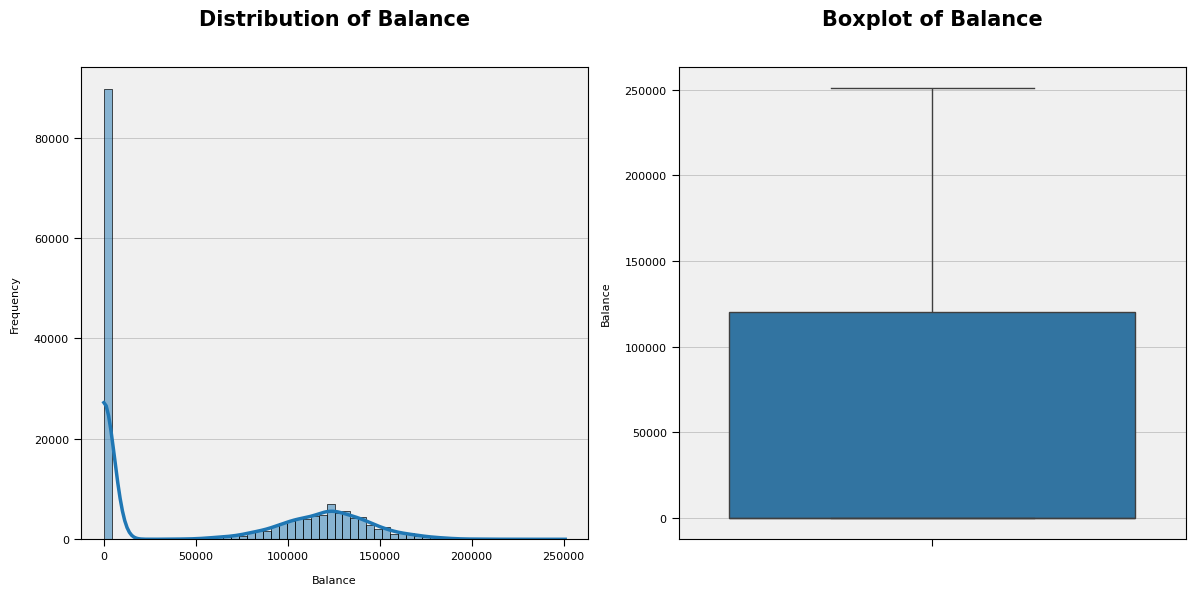

----------------------------------------------------------------------------------------------------
Descriptive Statistics for EstimatedSalary:
count    165034.000000
mean     112574.822734
std       50292.865585
min          11.580000
25%       74637.570000
50%      117948.000000
75%      155152.467500
max      199992.480000
Name: EstimatedSalary, dtype: float64

Skewness of EstimatedSalary: -0.31

EstimatedSalary is approximately normally distributed or slightly skewed.


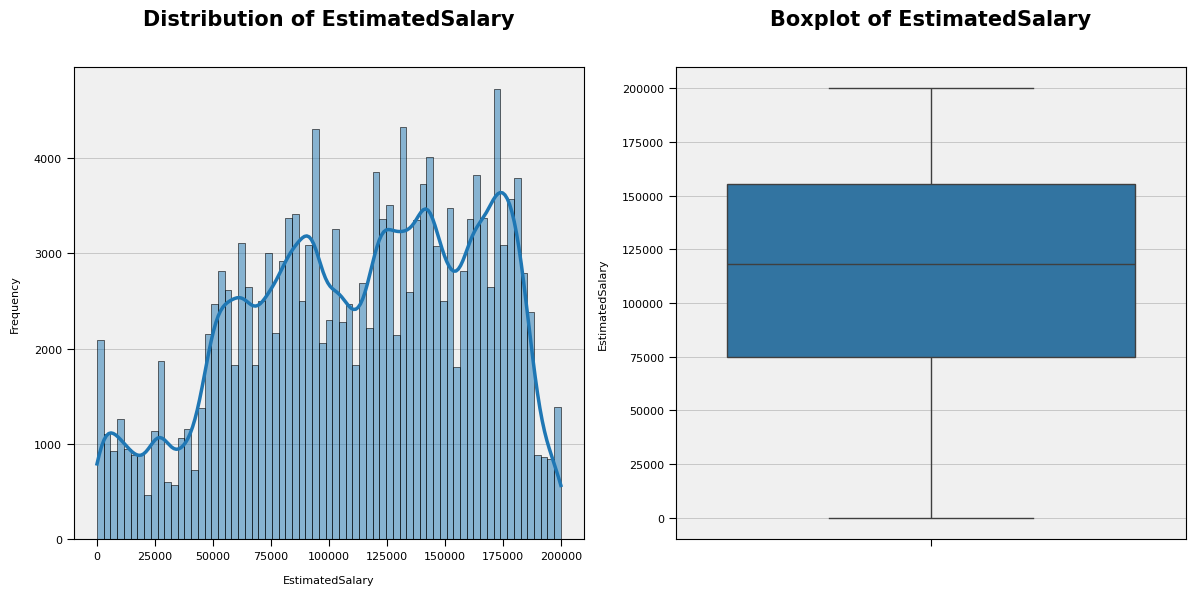

----------------------------------------------------------------------------------------------------
Descriptive Statistics for CreditScore:
count    165034.000000
mean        656.454373
std          80.103340
min         350.000000
25%         597.000000
50%         659.000000
75%         710.000000
max         850.000000
Name: CreditScore, dtype: float64

Skewness of CreditScore: -0.06

CreditScore is approximately normally distributed or slightly skewed.


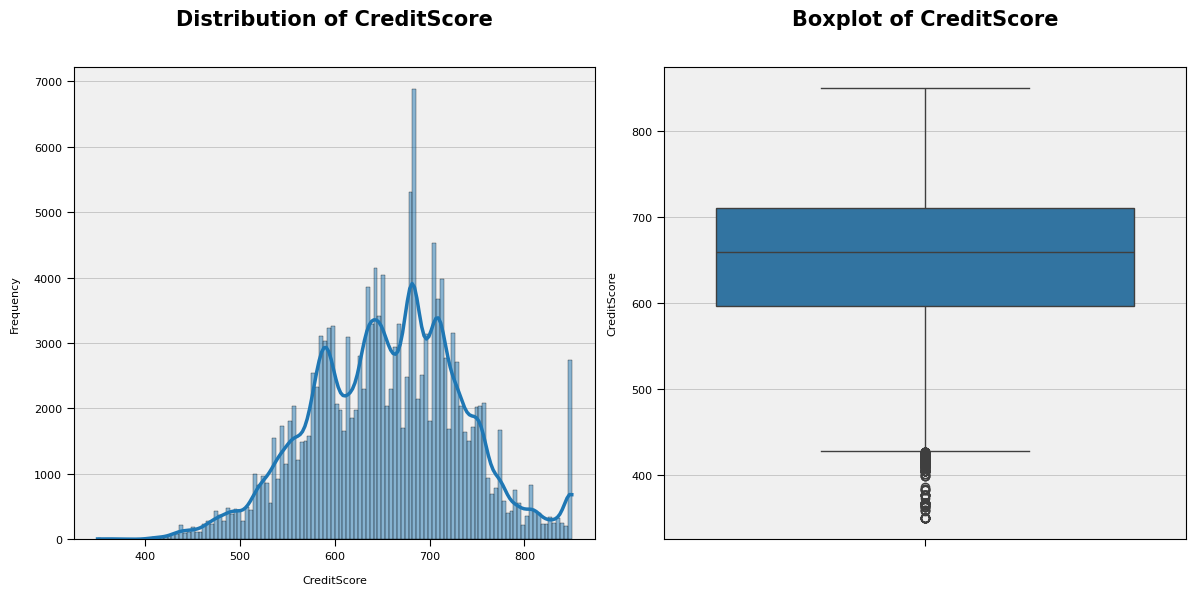

----------------------------------------------------------------------------------------------------
Descriptive Statistics for Tenure:
count    165034.000000
mean          5.020353
std           2.806159
min           0.000000
25%           3.000000
50%           5.000000
75%           7.000000
max          10.000000
Name: Tenure, dtype: float64

Skewness of Tenure: 0.01

Tenure is approximately normally distributed or slightly skewed.


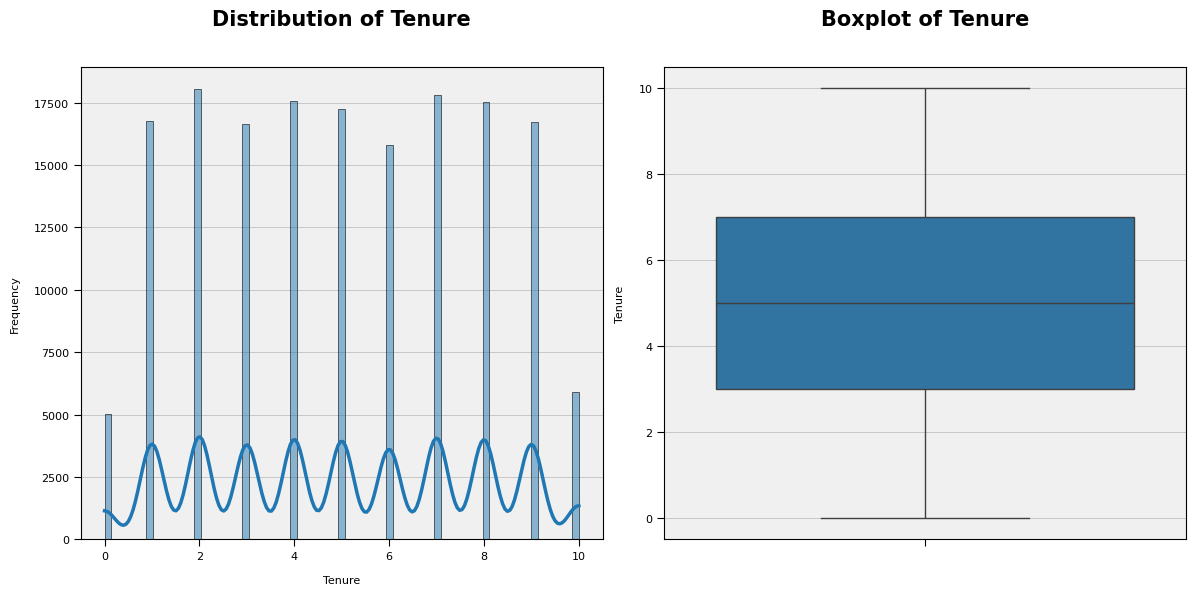

----------------------------------------------------------------------------------------------------
Descriptive Statistics for NumOfProducts:
count    165034.000000
mean          1.554455
std           0.547154
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           4.000000
Name: NumOfProducts, dtype: float64

Skewness of NumOfProducts: 0.37

NumOfProducts is approximately normally distributed or slightly skewed.


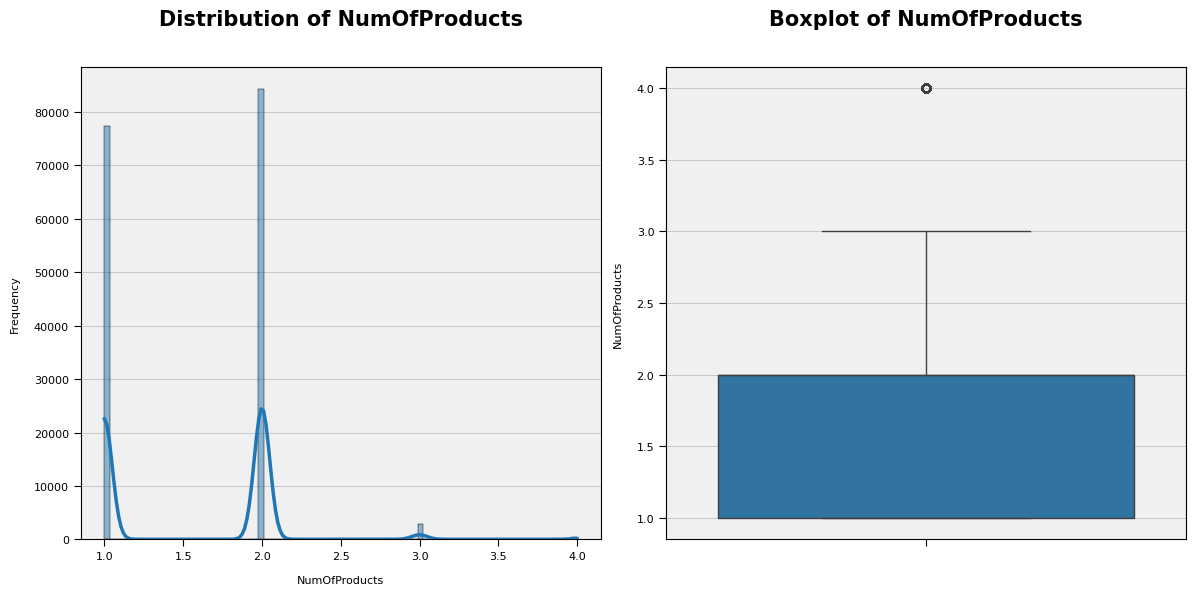

----------------------------------------------------------------------------------------------------


In [46]:

def analyze_numerical_variable(df, var):
    """Analyzes the distribution and skewness of a numerical variable."""

    # Descriptive Statistics
    print(f"Descriptive Statistics for {var}:\n{df[var].describe()}\n")

    # Skewness
    skewness = skew(df[var])
    print(f"Skewness of {var}: {skewness:.2f}\n")

    # Interpretation of Skewness
    if skewness > 1:
        print(f"{var} is highly positively skewed.")
    elif skewness >= 0.5:
        print(f"{var} is moderately positively skewed.")
    elif skewness > -0.5:
        print(f"{var} is approximately normally distributed or slightly skewed.")
    elif skewness >= -1:
        print(f"{var} is moderately negatively skewed.")
    else:
        print(f"{var} is highly negatively skewed.")

    # Visualizations
    plt.figure(figsize=(12, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[var], kde=True)
    plt.title(f"Distribution of {var}")
    plt.ylabel("Frequency")

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[var])
    plt.title(f"Boxplot of {var}")

    plt.tight_layout()
    plt.show()

for col in df_numerical:
    analyze_numerical_variable(df, col)
    print("-" * 100)


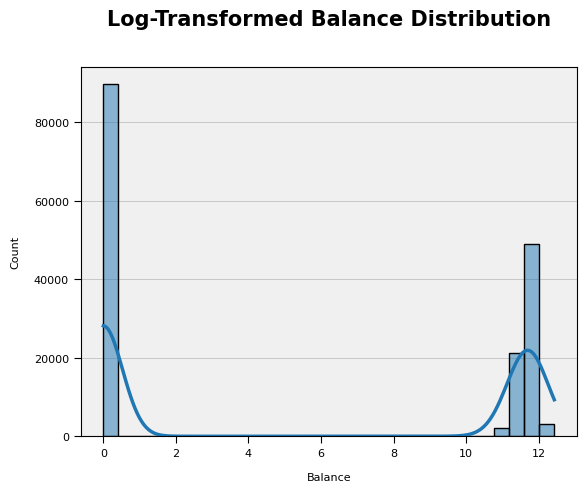

In [47]:
# Log Transformation of Balance
log_balance = np.log1p(df_numerical["Balance"])  # log1p handles zero values safely
sns.histplot(log_balance, kde=True)
plt.title("Log-Transformed Balance Distribution")
plt.show()

In [48]:
log_balance_skew = skew(log_balance)
print(f"Skewness of Log-Transformed Balance: {log_balance_skew:.2f}")

Skewness of Log-Transformed Balance: 0.18


In [49]:
zero_balance_percentage = (df_numerical["Balance"] == 0).mean() * 100
print(f"Percentage of zero balances: {zero_balance_percentage:.2f}%")

Percentage of zero balances: 54.32%


##### <code style="background:orange;color:black"> **Insights** </code>

* **Age**: The IQR (Q3 - Q1 = 42 - 32 = 10) indicates that the middle 50% of customers fall within a 10-year age range (between 32 and 42). This variable has moderate positive skewness, indicating more younger customers but a notable tail of older ones. This skewness reflects that more customers are concentrated in the younger age brackets, but there is a tail of older customers.

* **Balance**: The majority of "Balance" values are exactly 0 which shows a significant spike at zero. This represents a unique and dominant mode in the distribution. The rest of the data is slightly skewed but even though the rest of the distribution may be roughly symmetric, the spike at zero dominates the visual interpretation. So skewness test cannot capture the dominance of zeros. Following this, we applied log transformation to better spread out the non-zero balances. Also, calculated the percentage of customers with zero balance (54.32%). This high proportion of zero balances suggests that Balance has a significant concentration of zero values. This makes it a bimodal or zero-inflated distribution rather than a typical continuous distribution. 

* **EstimatedSalary**: The standart deviation of 50.292 with a mean of 112.574 indicates a relative variability in estimated salary which means the salaries are not tightly clustered around the mean. The skewness shows a slight asymmetric distribution. Negative skewness means that there are more individuals with high salary expectation than those with low salary expectation.

* **CreditScore**: The standard deviation of 80.10 shows a reasonable amount of variability in credit scores. The scores are not tightly clustered around the mean.  The range of credit scores is from 350 to 850, a span of 500 points. The IQR (Q3 - Q1 = 710 - 597 = 113) shows that the middle 50% of credit scores fall within a range of 113 points. The skewness of -0.06 is very close to zero. This confirms that the distribution is approximately symmetrical. There"s a very slight negative skew, meaning there might be a few more individuals with slightly lower credit scores than those with very high scores, but the effect is minimal.

* **NumberOfProducts**: The data is discrete, meaning it can only take on integer values (1, 2, 3, or 4 products). It"s not continuous, so strictly speaking, the concept of a "normal distribution" doesn"t fully apply in the same way it would for continuous data. The majority of the values are 1 or 2 products. A skewness of 0.37 indicates slight right skewness, meaning there are more customers with fewer products (1 or 2) and fewer customers with 3 or 4 products. It is discrete and slightly skewed. Since NumOfProducts has a small range of distinct values (1 to 4), it could be treated as a categorical variable for churn analysis or decision trees.

* **Tenure**: Just like the `NumberOfProducts`, this data also seems to be discrete that take only integer values (0-10 years). It is also not continues though it is still a numerical variable. A skewness of 0.01 indicates almost perfect distribution of data meaning that it is roughly symmetrically distributed. This means that there are roughly equal numbers of customers with shorter and longer tenures relative to the average tenure.

Overall, we have `Balance`, `Age`, `Estimated Salary` and `Credit Score` as continues, and `Number of Products` and `Tenure` as discrete variables. It is best to conduct bivariate analysis based on this.

#### <code style="background:white;color:black" > **5.2.2. Bivariate Analysis** </code>

##### <code style="background:darkgreen;color:white"> *Visual Analysis (Reg Plot, Box Plot, Violin Plot)* </code>

C:\Users\Furkan\AppData\Local\Temp\ipykernel_21580\3759594648.py:9: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.boxplot(data=df, x=df["Exited"], y=df[num], hue=df["Exited"], legend=False, palette=custom_palette, ax=axes[1])
C:\Users\Furkan\AppData\Local\Temp\ipykernel_21580\3759594648.py:13: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.violinplot(data=df, x=df["Exited"], y=df[num], hue=df["Exited"], legend=False, palette=custom_palette, ax=axes[2])


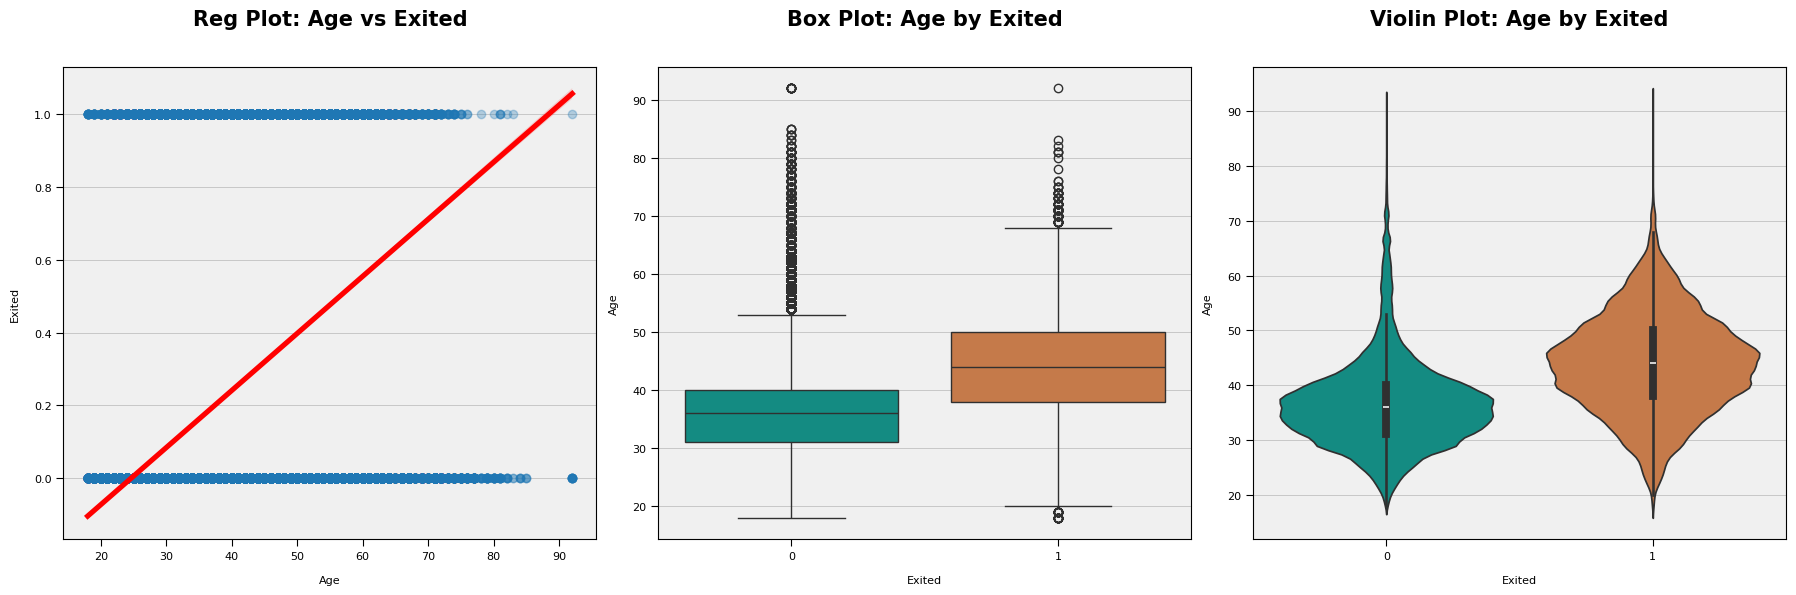

C:\Users\Furkan\AppData\Local\Temp\ipykernel_21580\3759594648.py:9: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.boxplot(data=df, x=df["Exited"], y=df[num], hue=df["Exited"], legend=False, palette=custom_palette, ax=axes[1])
C:\Users\Furkan\AppData\Local\Temp\ipykernel_21580\3759594648.py:13: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.violinplot(data=df, x=df["Exited"], y=df[num], hue=df["Exited"], legend=False, palette=custom_palette, ax=axes[2])


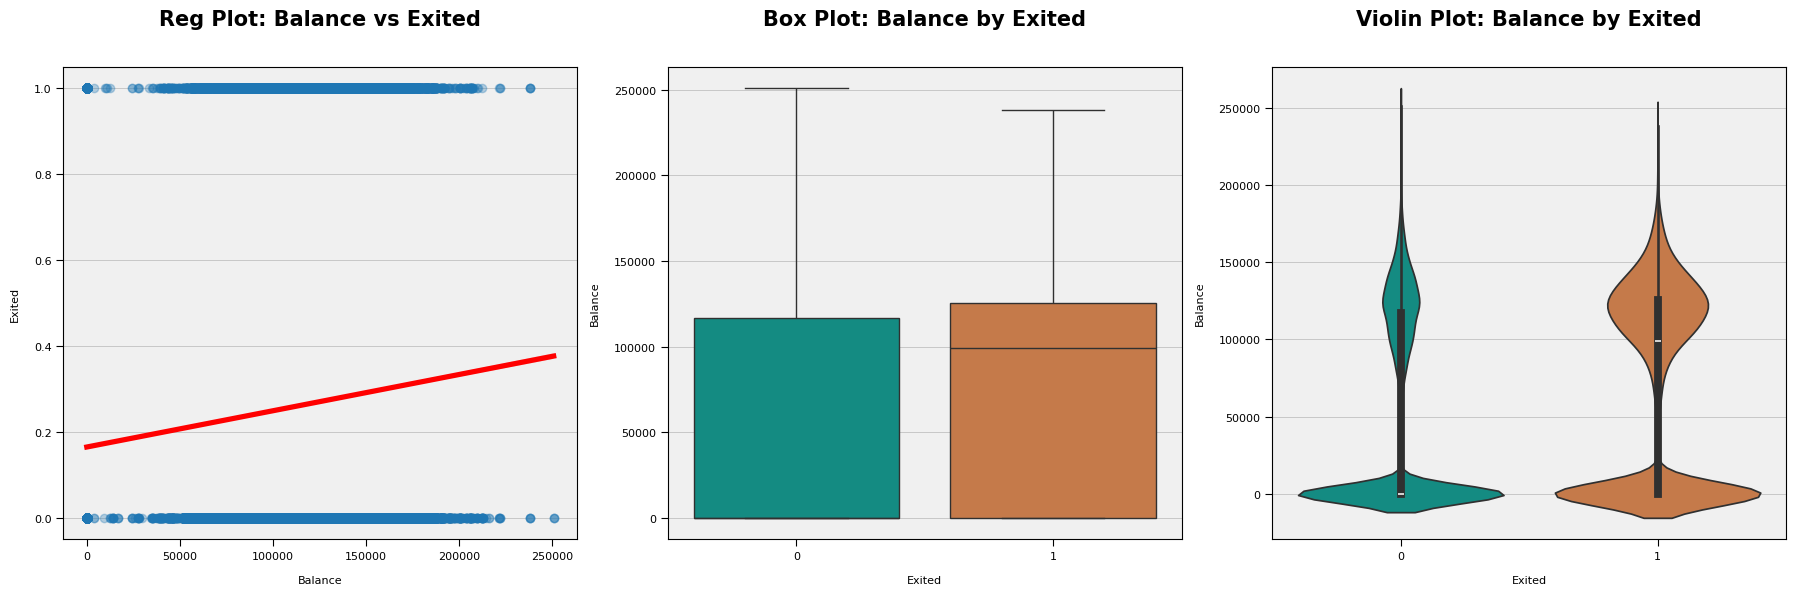

C:\Users\Furkan\AppData\Local\Temp\ipykernel_21580\3759594648.py:9: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.boxplot(data=df, x=df["Exited"], y=df[num], hue=df["Exited"], legend=False, palette=custom_palette, ax=axes[1])
C:\Users\Furkan\AppData\Local\Temp\ipykernel_21580\3759594648.py:13: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.violinplot(data=df, x=df["Exited"], y=df[num], hue=df["Exited"], legend=False, palette=custom_palette, ax=axes[2])


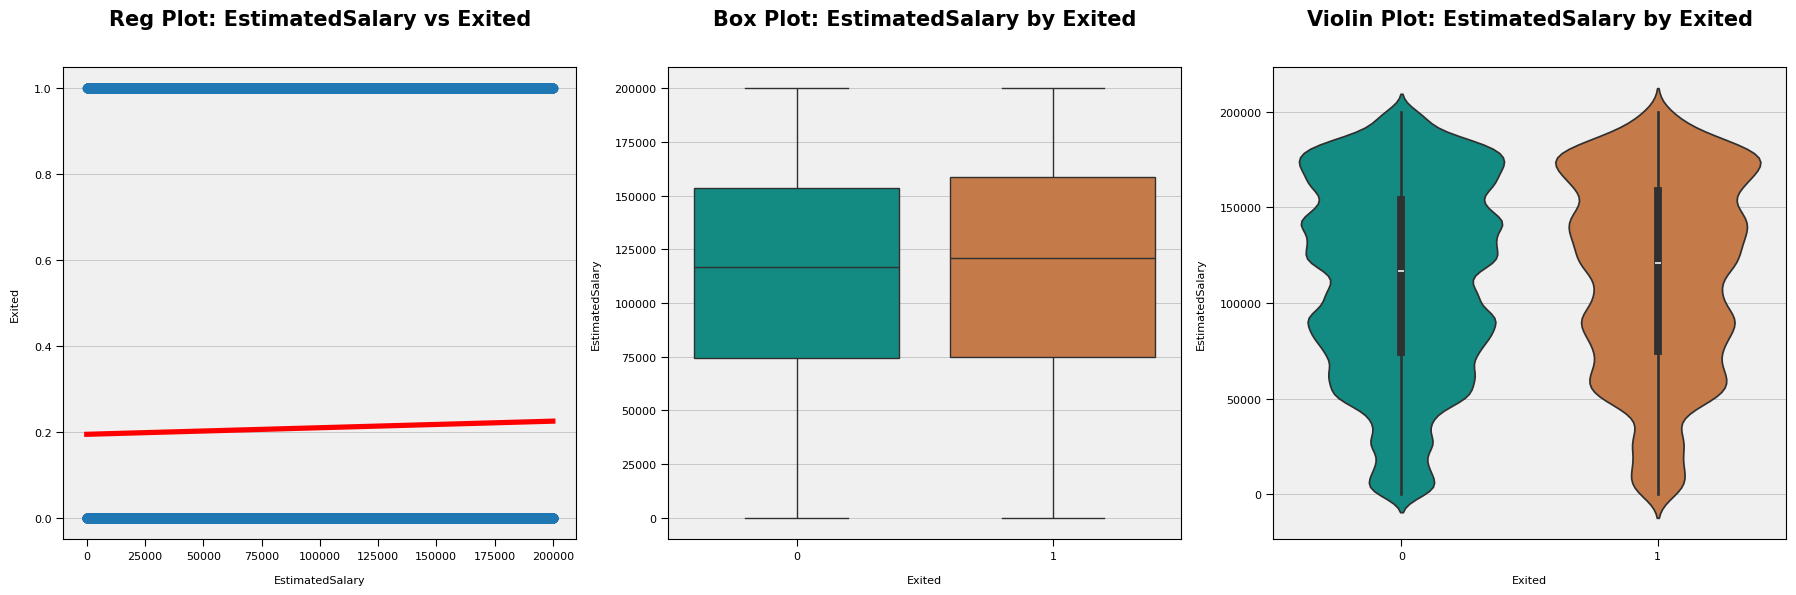

C:\Users\Furkan\AppData\Local\Temp\ipykernel_21580\3759594648.py:9: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.boxplot(data=df, x=df["Exited"], y=df[num], hue=df["Exited"], legend=False, palette=custom_palette, ax=axes[1])
C:\Users\Furkan\AppData\Local\Temp\ipykernel_21580\3759594648.py:13: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.violinplot(data=df, x=df["Exited"], y=df[num], hue=df["Exited"], legend=False, palette=custom_palette, ax=axes[2])


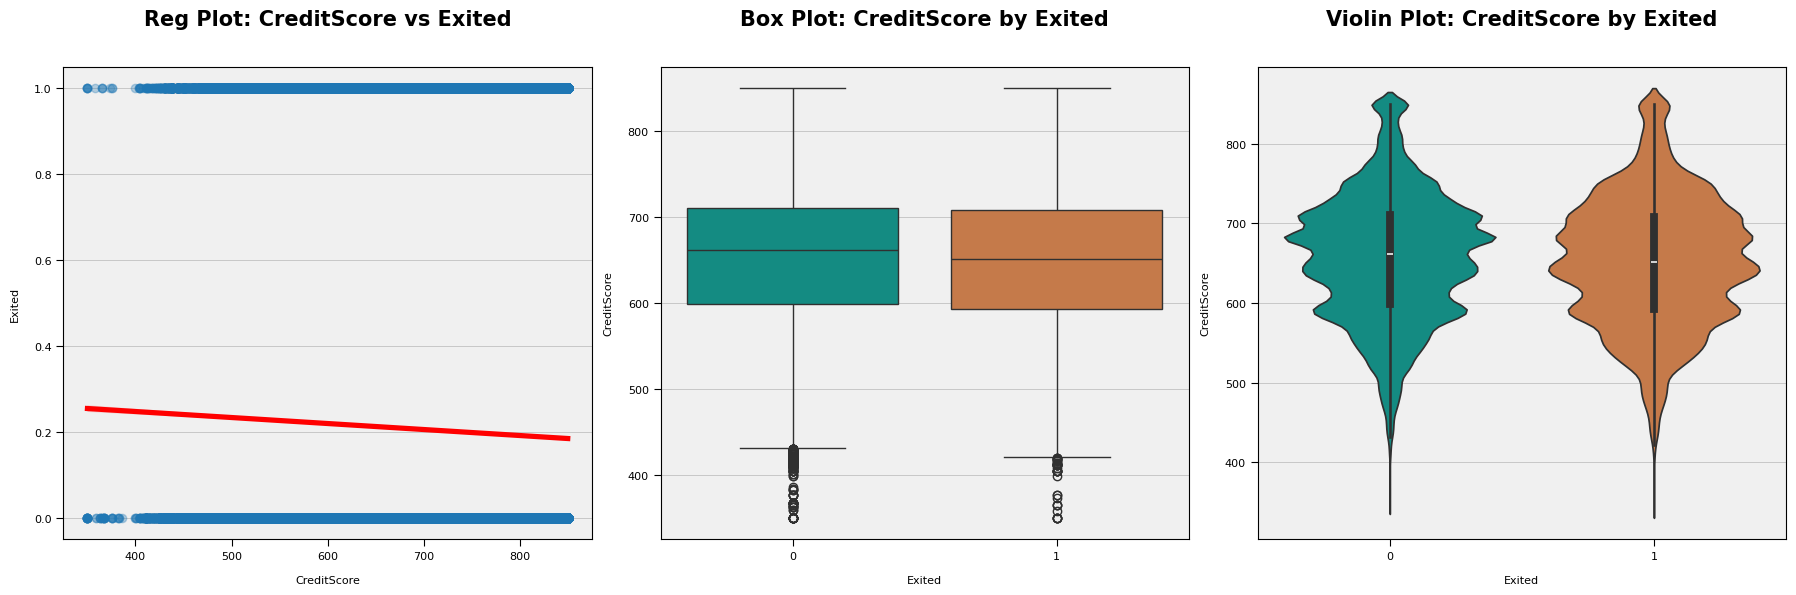

C:\Users\Furkan\AppData\Local\Temp\ipykernel_21580\3759594648.py:9: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.boxplot(data=df, x=df["Exited"], y=df[num], hue=df["Exited"], legend=False, palette=custom_palette, ax=axes[1])
C:\Users\Furkan\AppData\Local\Temp\ipykernel_21580\3759594648.py:13: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.violinplot(data=df, x=df["Exited"], y=df[num], hue=df["Exited"], legend=False, palette=custom_palette, ax=axes[2])


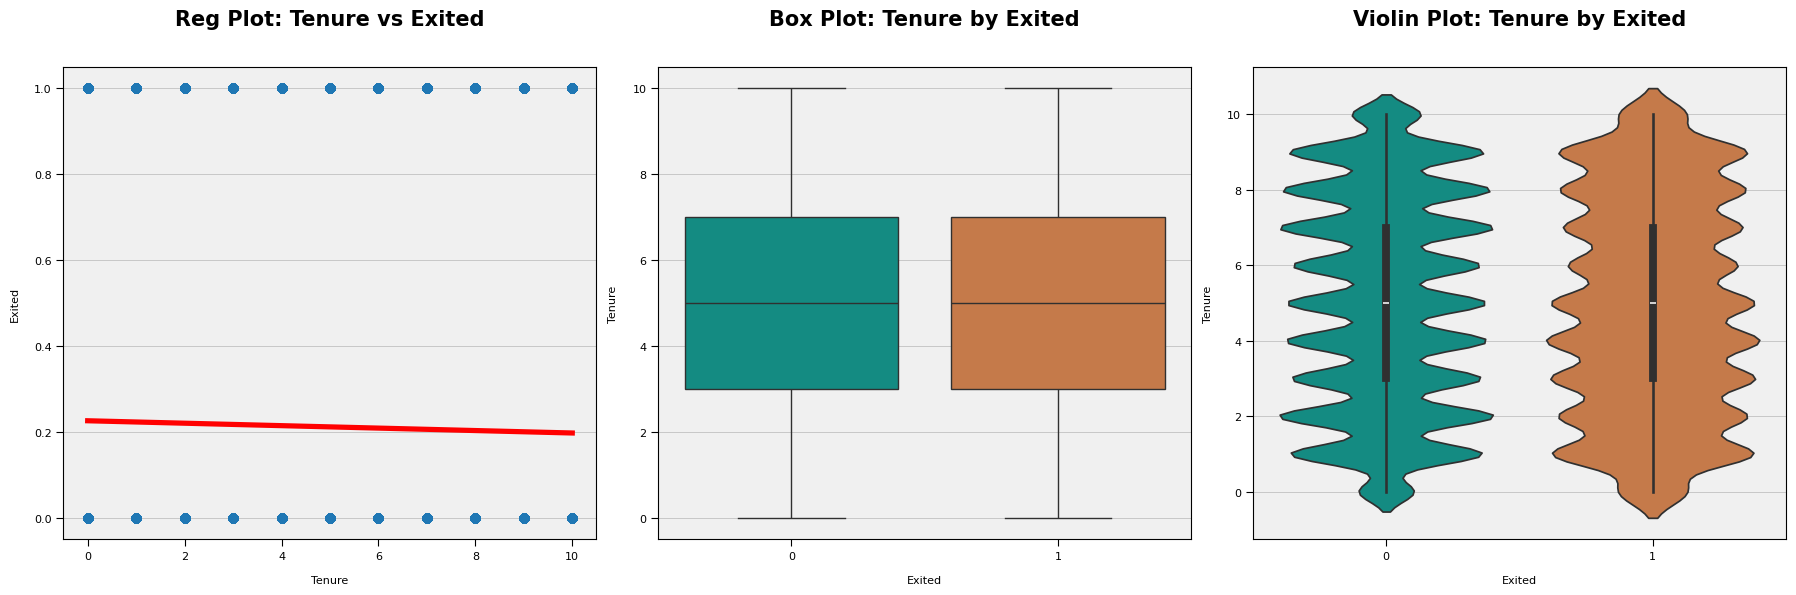

C:\Users\Furkan\AppData\Local\Temp\ipykernel_21580\3759594648.py:9: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.boxplot(data=df, x=df["Exited"], y=df[num], hue=df["Exited"], legend=False, palette=custom_palette, ax=axes[1])
C:\Users\Furkan\AppData\Local\Temp\ipykernel_21580\3759594648.py:13: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.violinplot(data=df, x=df["Exited"], y=df[num], hue=df["Exited"], legend=False, palette=custom_palette, ax=axes[2])


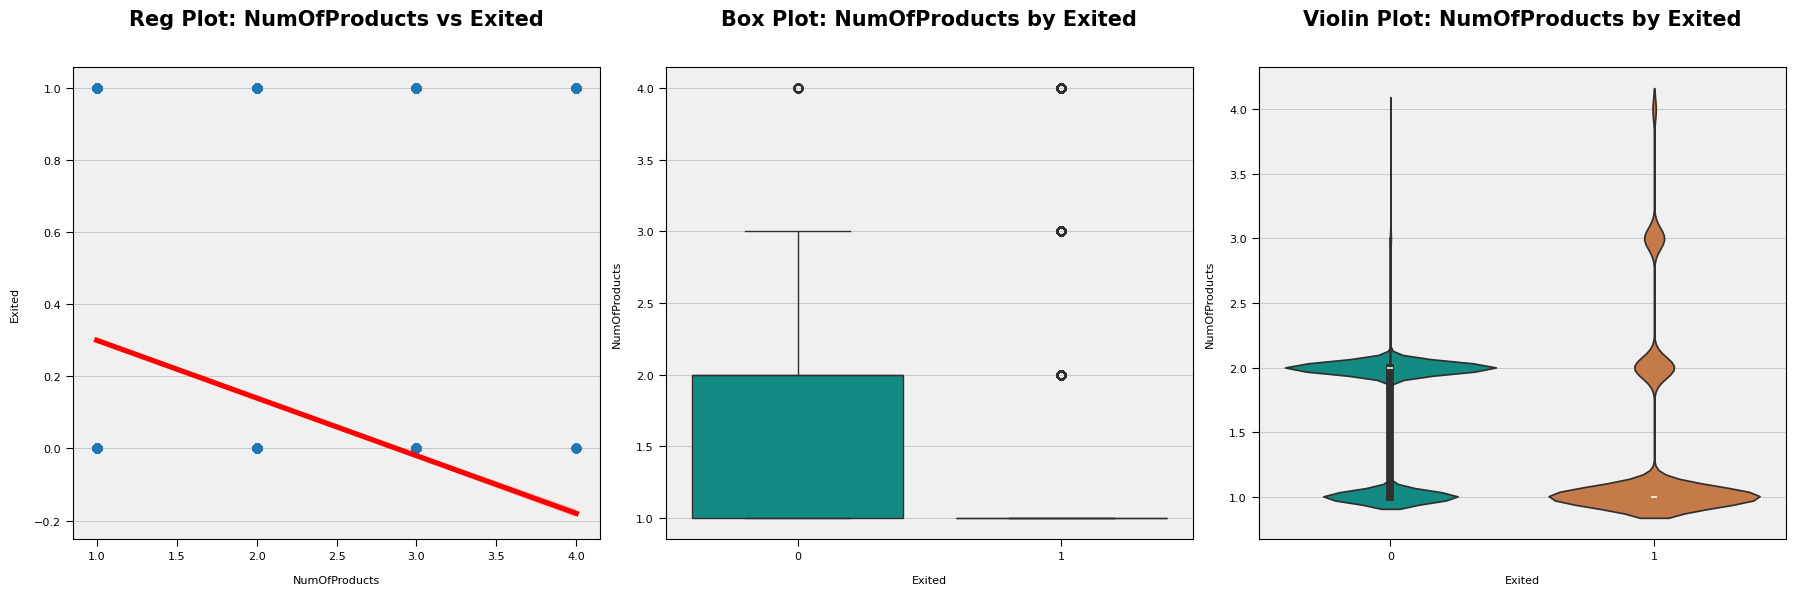

In [50]:
for num in df_numerical:
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns
    
    # Regression plot
    sns.regplot(data=df, x=num, y=df["Exited"], scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'}, ax=axes[0])
    axes[0].set_title(f'Reg Plot: {num} vs Exited')
    
    # Box plot
    sns.boxplot(data=df, x=df["Exited"], y=df[num], hue=df["Exited"], legend=False, palette=custom_palette, ax=axes[1])
    axes[1].set_title(f'Box Plot: {num} by Exited')
    
    # Violin plot
    sns.violinplot(data=df, x=df["Exited"], y=df[num], hue=df["Exited"], legend=False, palette=custom_palette, ax=axes[2])
    axes[2].set_title(f'Violin Plot: {num} by Exited')
    
    plt.tight_layout()  # Adjust layout to avoid overlap
    plt.show()

##### <code style="background:orange;color:black"> **Insights** </code>

Since the target variable is a binary categorical variable, regression plots may not suitable for this scenario. However, as it is seen, regression line provides info about the direction of the relationship if not the strength or the type of the relationship.

* **Age**: Regression line indicates there is a positive association with the target variable. Box plot clearly shows that Exited median is higher. So it indicates that Churned customers are older on average than non-churned customers. As the age increases, churn probability increases too. Older customers are more likely to churn.
* **Balance**: There is a positive association between Balance and Exited. Customers with higher balances are at higher risk of churn. Though IQR is similar between churned and non-churned customers. However, the medians are significantly different due to the dominance of 0s as mentioned previously.
* **EstimatedSalary**: Regression line indicates the positive association but with a less significant degree as it is shown with the box plot. Medians and IQRs are slightly higher for churned customers.
* **CreditScore**: Regression line suggests a negative association. Though, just like the estimated salary, the difference between two groups are small. Churn probability decreases slightly with higher credit score. Customers with lower credit scores are more likely to churn.
* **Tenure**: Since this is a discrete variable, it is not insightful to analyse it with regression, box, and violin plot. But still, regression line indicates negative association with churn. Since medians are almost at the same level, this association is not strong. Overall, higher tenure years  decreases churn posibility.
* **NumberOfProducts**: Just like the tenure, this variable is also discrete. Furthermore, this variable has only four values so the result of the analyses with these plots are not insightful due to this. Tenure and this variable requires additional plots.

##### <code style="background:darkgreen;color:white"> *Additional Visual Analysis* </code>

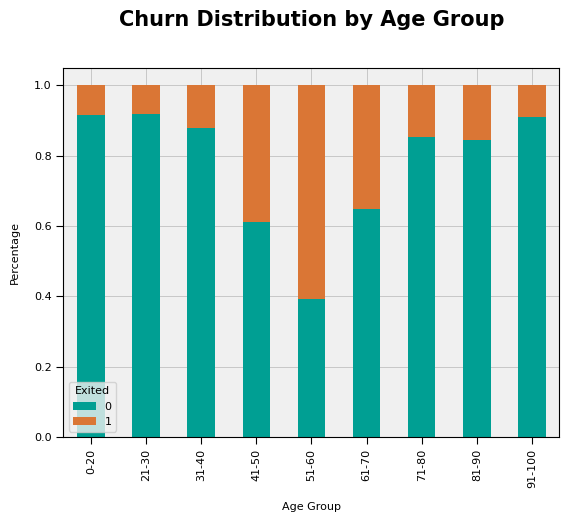

In [51]:
df_age = df_numerical.copy()
df_age["Age_Bins"]=pd.cut(df_age["Age"], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels=["0-20", "21-30", "31-40", "41-50", "51-60", "61-70", "71-80", "81-90", "91-100"])
contingency_table = pd.crosstab(df_age["Age_Bins"], df["Exited"], normalize="index")
contingency_table.plot(kind="bar", stacked=True, color=custom_palette)
plt.title("Churn Distribution by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Percentage")
plt.show()

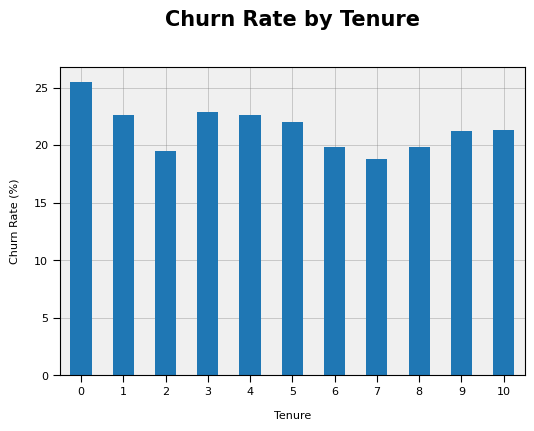

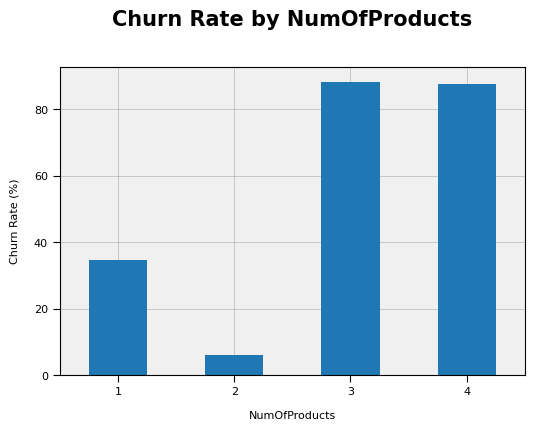

In [52]:
df_numerical2=df_numerical[["Tenure","NumOfProducts"]]
for var in df_numerical2:
    churn_rate = df.groupby(var)["Exited"].mean() * 100
    plt.figure(figsize=(6, 4))
    churn_rate.plot(kind="bar")
    plt.title(f"Churn Rate by {var}")
    plt.ylabel("Churn Rate (%)")
    plt.xlabel(var)
    plt.xticks(rotation=0)
    plt.show()

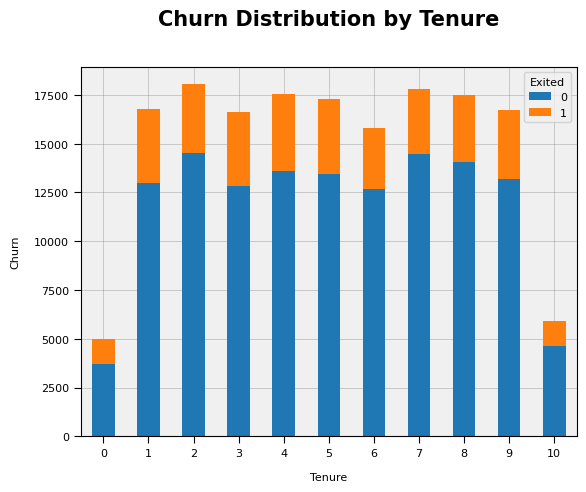

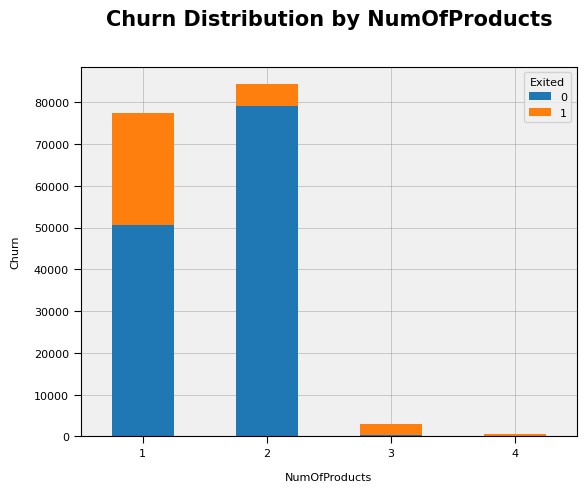

In [53]:
for var in df_numerical2:
    contingency_table=pd.crosstab(df[var],df["Exited"])
    contingency_table.plot(kind="bar", stacked=True)
    plt.title(f"Churn Distribution by {var}")
    plt.xlabel(var)
    plt.ylabel("Churn")
    plt.xticks(rotation=0)
    plt.show()

##### <code style="background:orange;color:black"> **Insights** </code>

* **Tenure**: In the first set of plots, it is clear that there is a slight downward pattern towards to 10 years tenure for churns: as tenure increases, churn slightly decreases. Additional visuals confirms the initial observarations that has been made with other tests. Though, the effect of tenure has very slight effect on churn.

* **NumOfProducts**: In the first set of plots, churn is rate much higher with people who have 3 or more products. The second set of graph provides the same insight; initially, customers who have 1 product, churn rate is higher but customers who have 2 product, churn rate decreases though it starts increase again with customers who have 3 or more products. This patterns can be seen in the plot of the quadratic model.

##### <code style="background:darkgreen;color:white"> *Analysis with Simple Logistic Model* </code>

In [54]:
def logistic_regression_and_interpretation(df, target_var, numeric_var):
    """
    Fits logistic regression models (linear and quadratic) for a numeric variable 
    and interprets the results, including coefficients, p-values, odds ratios, 
    turning point (for quadratic models), and relationship type, and plots the results.

    Parameters:
    - df: DataFrame containing the dataset
    - target_var: Name of the target variable (binary)
    - numeric_var: Name of the numeric variable to analyze
    """

    # Prepare the data
    X = df[numeric_var]
    y = df[target_var]

    # Linear Model
    X_linear = sm.add_constant(X)
    model_linear = sm.Logit(y, X_linear).fit(disp=0)

    # Quadratic Model
    X_squared = X ** 2
    X_combined = sm.add_constant(pd.DataFrame({numeric_var: X, f"{numeric_var}_squared": X_squared}))
    model_quadratic = sm.Logit(y, X_combined).fit(disp=0)

    # Define a function to interpret a fitted model
    def interpret_model(model, variable_name, model_type):
        coef = model.params
        pvalues = model.pvalues

        print("\nModel Interpretation:")
        print("=" * 60)
        for var in coef.index:
            if var == 'const':
                continue
            print(f"\nVariable: {var}")
            print(f"Coefficient: {coef[var]:.6f}")
            print(f"P-value: {pvalues[var]:.4f}")

            significance = "Statistically significant" if pvalues[var] < 0.05 else "Not statistically significant"
            print(significance)

            if pvalues[var] < 0.05:
                odds_ratio = np.exp(coef[var])
                print(f"Odds Ratio: {odds_ratio:.6f}")

                if var == variable_name:
                    direction = "increases" if coef[var] > 0 else "decreases"
                    print(f"As {variable_name} increases, the log-odds of target=1 {direction}.")

        if model_type == 'quadratic' and f"{variable_name}_squared" in coef.index:
            lin_coef = coef[variable_name]
            sq_coef = coef[f"{variable_name}_squared"]
            if sq_coef != 0:
                turning_point = -lin_coef / (2 * sq_coef)
                print(f"\nThe turning point (minimum/maximum) is: {turning_point:.2f}")

                if lin_coef > 0 and sq_coef < 0:
                    print(f"The relationship with {variable_name} is concave (inverted U-shaped), peaking at the turning point.")
                elif lin_coef < 0 and sq_coef > 0:
                    print(f"The relationship with {variable_name} is convex (U-shaped), reaching a minimum at the turning point.")
                else:
                  print("The quadratic relationship is not a simple U or inverted U.")
            else:
              print("The quadratic term's coefficient is zero, so there's no curvature.")

        print(f"\nPseudo R-squared: {model.prsquared:.6f}")

    # Interpret the models
    print(f"Logistic Regression for {numeric_var}:")

    print("\nLinear Model Interpretation:")
    interpret_model(model_linear, numeric_var, 'linear')

    print("\nQuadratic Model Interpretation:")
    interpret_model(model_quadratic, numeric_var, 'quadratic')

    # Plotting
    balance_range = np.linspace(df[numeric_var].min(), df[numeric_var].max(), 100)
    
    # Linear Model Plotting
    X_plot_linear = sm.add_constant(balance_range)
    predicted_probs_linear = model_linear.predict(X_plot_linear)
    
    plt.figure(figsize=(12, 6)) # two plots side by side
    plt.subplot(1, 2, 1) # first plot
    plt.plot(balance_range, predicted_probs_linear, color='blue', linewidth=2, label="Linear Model Predicted Probability")
    sns.rugplot(df[df[target_var] == 0][numeric_var], height=0.1, color="orange", alpha=0.5, label=f"{target_var} = 0")
    sns.rugplot(df[df[target_var] == 1][numeric_var], height=-0.1, color="black", alpha=0.5, label=f"{target_var} = 1")
    plt.xlabel(numeric_var)
    plt.ylabel("Probability of Target=1")
    plt.title(f"{numeric_var} vs. Probability of {target_var}=1 (Linear Model)")
    plt.grid(True)
    plt.legend()
    
    # Quadratic Model Plotting
    X_plot_quadratic = sm.add_constant(pd.DataFrame({numeric_var: balance_range, f"{numeric_var}_squared": balance_range**2}))
    predicted_probs_quadratic = model_quadratic.predict(X_plot_quadratic)
    
    plt.subplot(1, 2, 2) # second plot
    plt.plot(balance_range, predicted_probs_quadratic, color='red', linewidth=2, label="Quadratic Model Predicted Probability")
    sns.rugplot(df[df[target_var] == 0][numeric_var], height=0.1, color="orange", alpha=0.5, label=f"{target_var} = 0")
    sns.rugplot(df[df[target_var] == 1][numeric_var], height=-0.1, color="black", alpha=0.5, label=f"{target_var} = 1")
    plt.xlabel(numeric_var)
    plt.ylabel("Probability of Target=1")
    plt.title(f"{numeric_var} vs. Probability of {target_var}=1 (Quadratic Model)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

Logistic Regression for Age:

Linear Model Interpretation:

Model Interpretation:

Variable: Age
Coefficient: 0.091347
P-value: 0.0000
Statistically significant
Odds Ratio: 1.095649
As Age increases, the log-odds of target=1 increases.

Pseudo R-squared: 0.106569

Quadratic Model Interpretation:

Model Interpretation:

Variable: Age
Coefficient: 0.391435
P-value: 0.0000
Statistically significant
Odds Ratio: 1.479102
As Age increases, the log-odds of target=1 increases.

Variable: Age_squared
Coefficient: -0.003299
P-value: 0.0000
Statistically significant
Odds Ratio: 0.996706

The turning point (minimum/maximum) is: 59.33
The relationship with Age is concave (inverted U-shaped), peaking at the turning point.

Pseudo R-squared: 0.127095


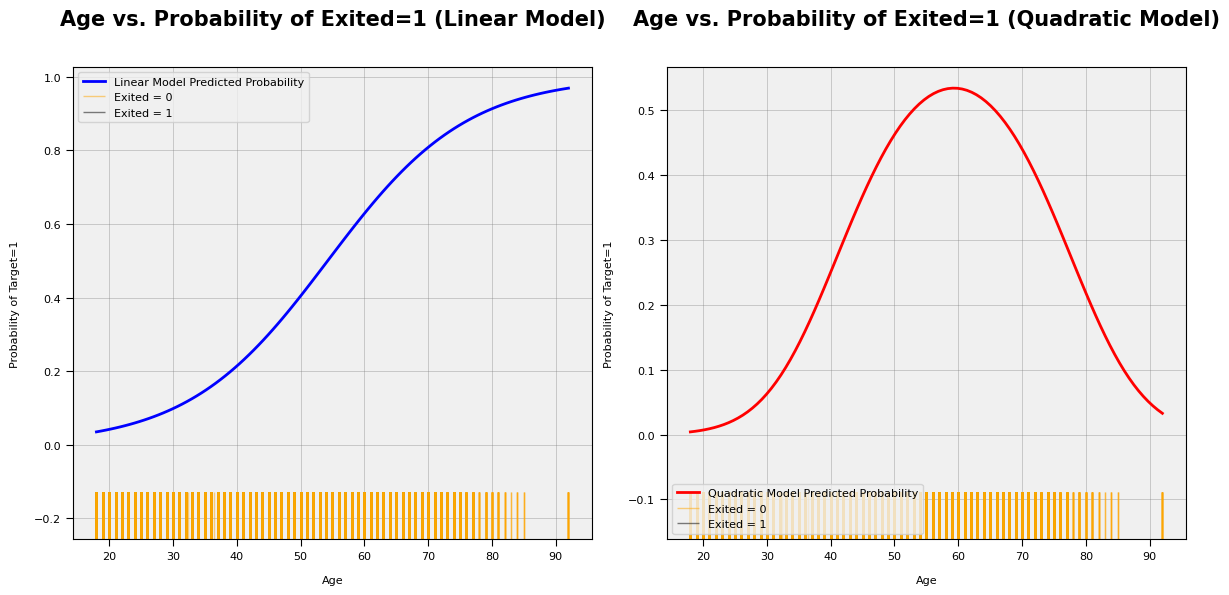

In [55]:
logistic_regression_and_interpretation(df, 'Exited', 'Age')

Logistic Regression for Balance:

Linear Model Interpretation:

Model Interpretation:

Variable: Balance
Coefficient: 0.000005
P-value: 0.0000
Statistically significant
Odds Ratio: 1.000005
As Balance increases, the log-odds of target=1 increases.

Pseudo R-squared: 0.016076

Quadratic Model Interpretation:

Model Interpretation:

Variable: Balance
Coefficient: 0.000012
P-value: 0.0000
Statistically significant
Odds Ratio: 1.000012
As Balance increases, the log-odds of target=1 increases.

Variable: Balance_squared
Coefficient: -0.000000
P-value: 0.0000
Statistically significant
Odds Ratio: 1.000000

The turning point (minimum/maximum) is: 120196.59
The relationship with Balance is concave (inverted U-shaped), peaking at the turning point.

Pseudo R-squared: 0.017766


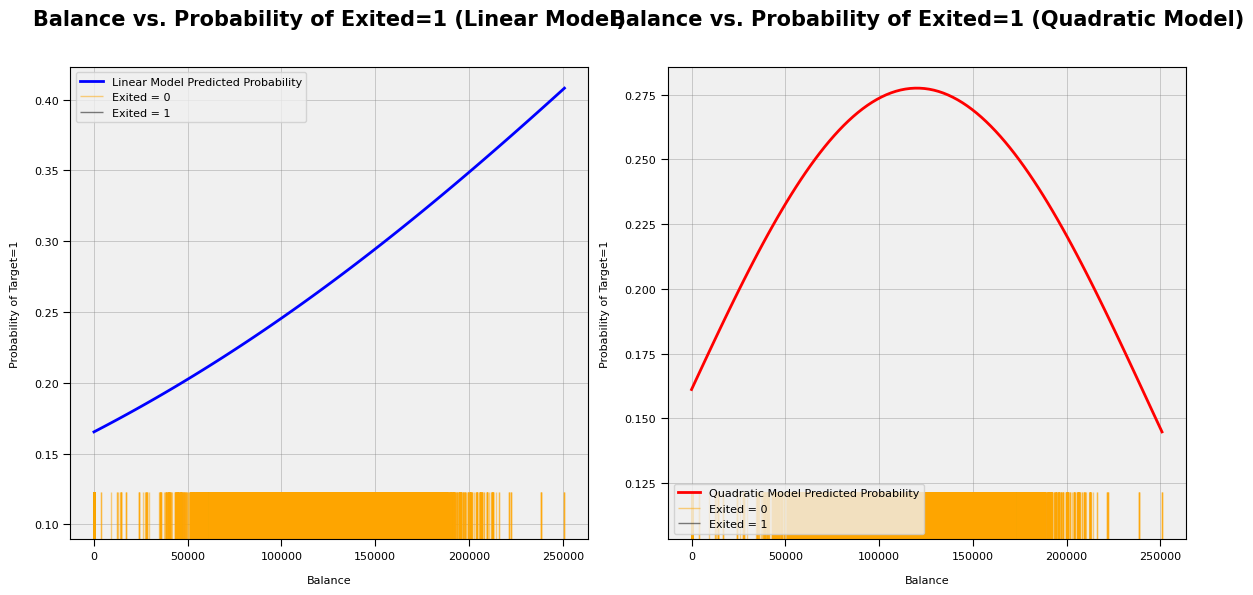

In [56]:
logistic_regression_and_interpretation(df, 'Exited', 'Balance')

Logistic Regression for EstimatedSalary:

Linear Model Interpretation:

Model Interpretation:

Variable: EstimatedSalary
Coefficient: 0.000001
P-value: 0.0000
Statistically significant
Odds Ratio: 1.000001
As EstimatedSalary increases, the log-odds of target=1 increases.

Pseudo R-squared: 0.000344

Quadratic Model Interpretation:

Model Interpretation:

Variable: EstimatedSalary
Coefficient: -0.000001
P-value: 0.0114
Statistically significant
Odds Ratio: 0.999999
As EstimatedSalary increases, the log-odds of target=1 decreases.

Variable: EstimatedSalary_squared
Coefficient: 0.000000
P-value: 0.0000
Statistically significant
Odds Ratio: 1.000000

The turning point (minimum/maximum) is: 60991.07
The relationship with EstimatedSalary is convex (U-shaped), reaching a minimum at the turning point.

Pseudo R-squared: 0.000463


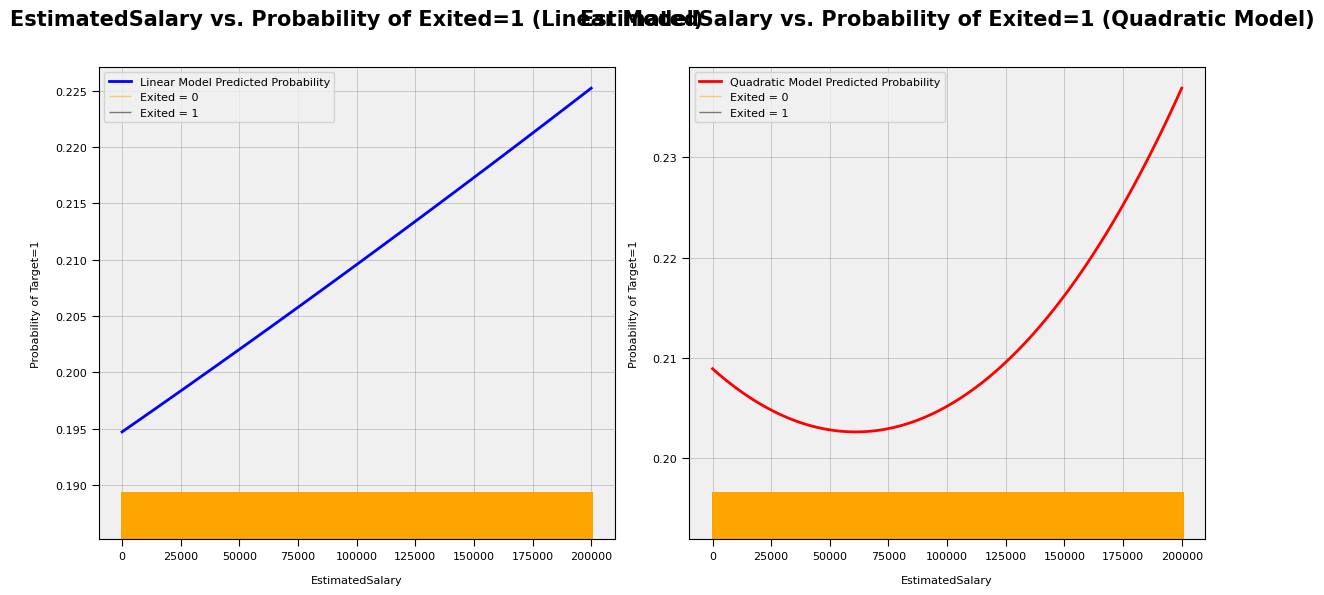

In [57]:
logistic_regression_and_interpretation(df, 'Exited', 'EstimatedSalary')

Logistic Regression for CreditScore:

Linear Model Interpretation:

Model Interpretation:

Variable: CreditScore
Coefficient: -0.000837
P-value: 0.0000
Statistically significant
Odds Ratio: 0.999164
As CreditScore increases, the log-odds of target=1 decreases.

Pseudo R-squared: 0.000726

Quadratic Model Interpretation:

Model Interpretation:

Variable: CreditScore
Coefficient: -0.003948
P-value: 0.0000
Statistically significant
Odds Ratio: 0.996060
As CreditScore increases, the log-odds of target=1 decreases.

Variable: CreditScore_squared
Coefficient: 0.000002
P-value: 0.0003
Statistically significant
Odds Ratio: 1.000002

The turning point (minimum/maximum) is: 826.26
The relationship with CreditScore is convex (U-shaped), reaching a minimum at the turning point.

Pseudo R-squared: 0.000801


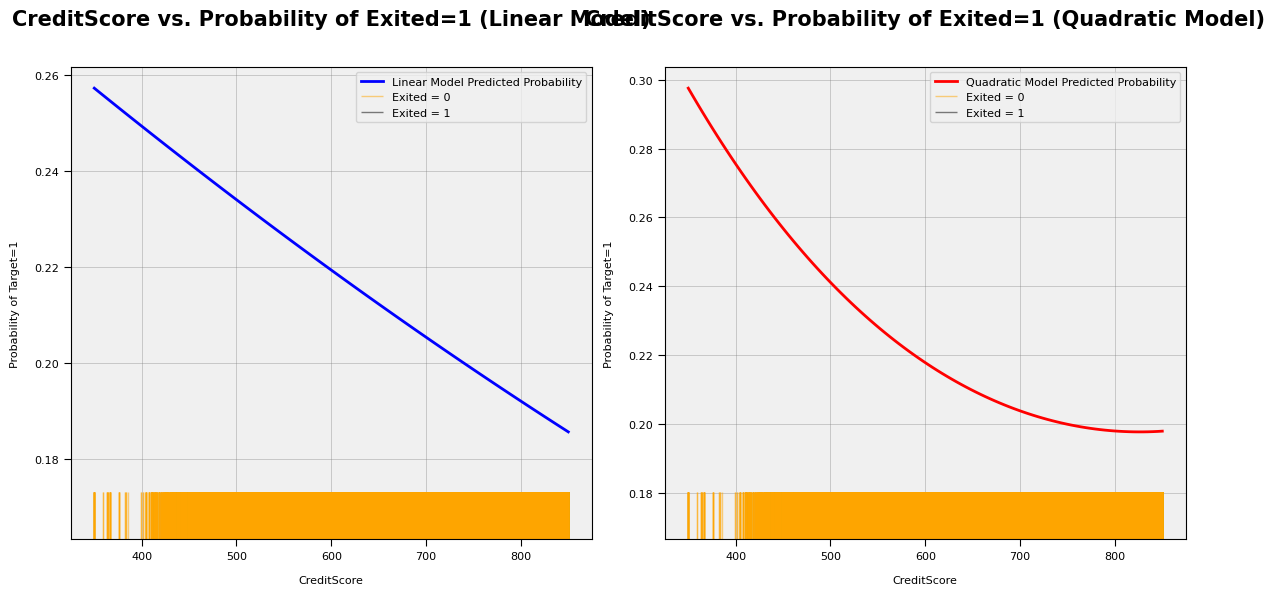

In [58]:
logistic_regression_and_interpretation(df, 'Exited', 'CreditScore')

Logistic Regression for Tenure:

Linear Model Interpretation:

Model Interpretation:

Variable: Tenure
Coefficient: -0.017078
P-value: 0.0000
Statistically significant
Odds Ratio: 0.983067
As Tenure increases, the log-odds of target=1 decreases.

Pseudo R-squared: 0.000371

Quadratic Model Interpretation:

Model Interpretation:

Variable: Tenure
Coefficient: -0.047176
P-value: 0.0000
Statistically significant
Odds Ratio: 0.953920
As Tenure increases, the log-odds of target=1 decreases.

Variable: Tenure_squared
Coefficient: 0.003011
P-value: 0.0003
Statistically significant
Odds Ratio: 1.003016

The turning point (minimum/maximum) is: 7.83
The relationship with Tenure is convex (U-shaped), reaching a minimum at the turning point.

Pseudo R-squared: 0.000448


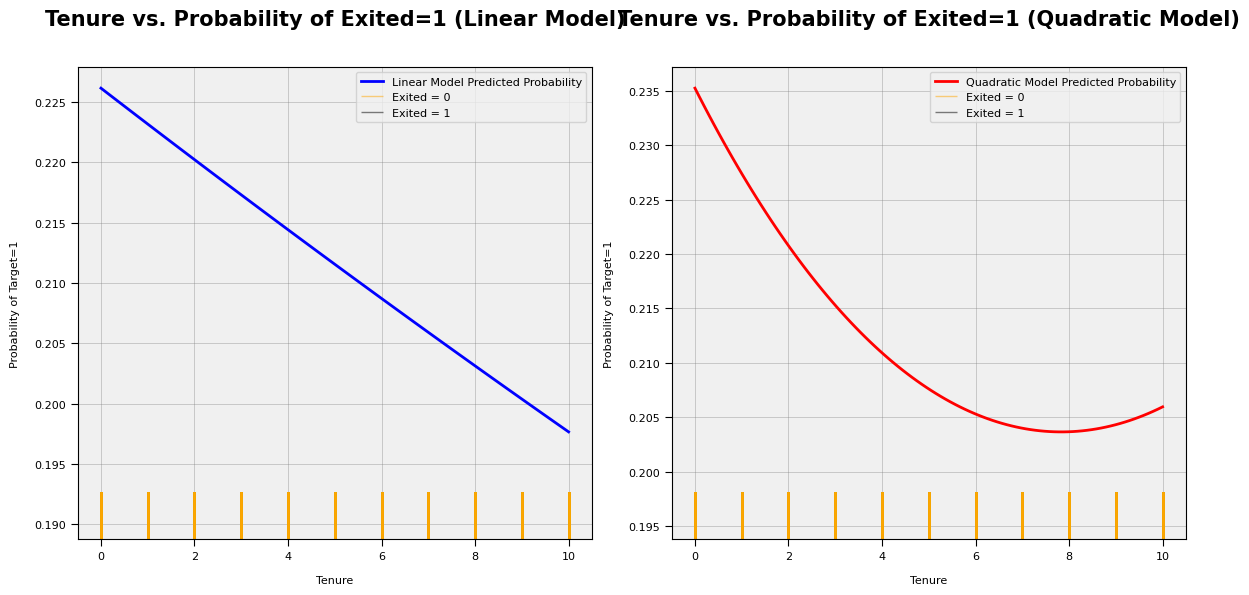

In [59]:
logistic_regression_and_interpretation(df, 'Exited', 'Tenure')

Logistic Regression for NumOfProducts:

Linear Model Interpretation:

Model Interpretation:

Variable: NumOfProducts
Coefficient: -1.061131
P-value: 0.0000
Statistically significant
Odds Ratio: 0.346064
As NumOfProducts increases, the log-odds of target=1 decreases.

Pseudo R-squared: 0.047347

Quadratic Model Interpretation:

Model Interpretation:

Variable: NumOfProducts
Coefficient: -11.531365
P-value: 0.0000
Statistically significant
Odds Ratio: 0.000010
As NumOfProducts increases, the log-odds of target=1 decreases.

Variable: NumOfProducts_squared
Coefficient: 3.152924
P-value: 0.0000
Statistically significant
Odds Ratio: 23.404401

The turning point (minimum/maximum) is: 1.83
The relationship with NumOfProducts is convex (U-shaped), reaching a minimum at the turning point.

Pseudo R-squared: 0.166495


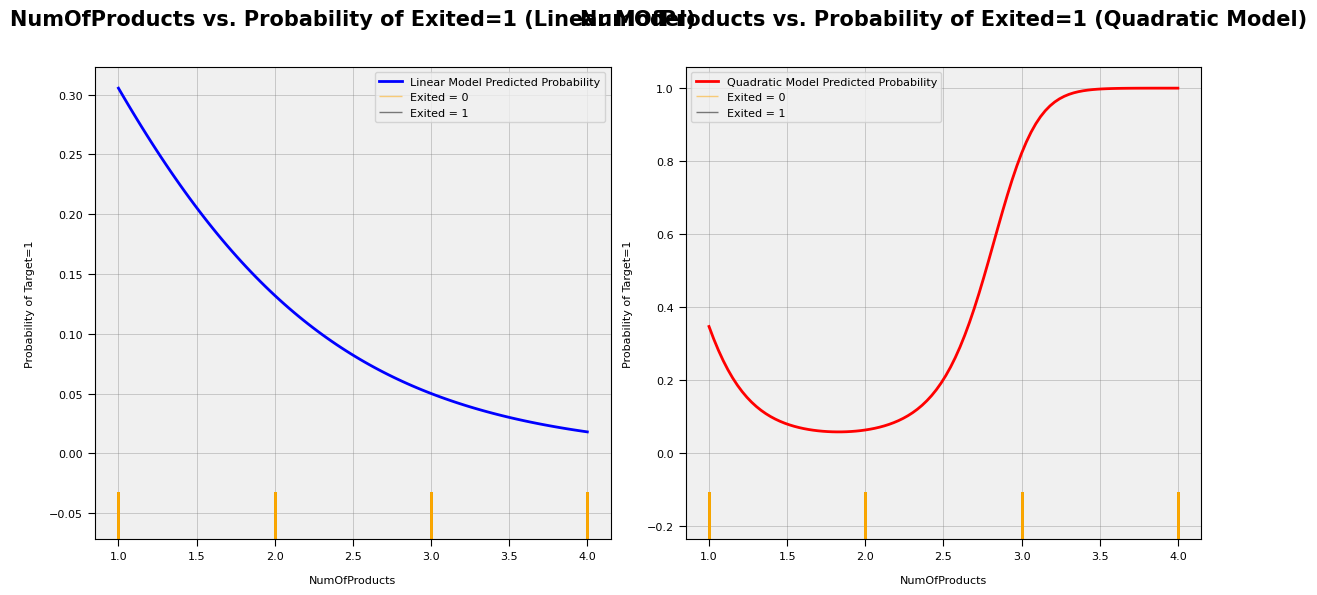

In [60]:
logistic_regression_and_interpretation(df, 'Exited', 'NumOfProducts')

##### <code style="background:orange;color:black"> **Insights** </code>

The test results indicate that the relationships between the target and the independent variables are not perfectly linear. All variables have non-linearity at some degree. Non-linearity is characterized by inconsistent rates of change.

Simple models that developed for analysis and their results were plotted. Overall, quadratic model graphs shows that customers' behaviors are complex. There are minimum and maximum points together with turning points. This models allow us to provide more insights about the relationships.

Second set of graphs shows discrete data points (the means for each bin), the purpose is to visualize the trend across the bins. For the already discrete values, bins were not created (NumOfProducts and Tenure). As seen in the graphs, some intervals show a sharp increase followed by a decrease, it suggests that changes in the predictor affect churn differently at different levels of the predictor variable. However, general upward or downward trend is visible.

Overall, during the model development phase, these findings should be kept in mind and a less sensitive model to complex relationships or a model that can handles these type of relationships should be selected.

* **Age**: Age has the most effect on target variable among the other numeric values. Positive and relatively high coefficient indicates positive and strong relationship. Lower than 0.05 p-value shows statistical significance. Higher than 1 odds ratio indicates a one-unit increase in Age increases the odds of churn. Adding quadratic term increases pseudo r-squared value which means improved model fitness. Both model suggests statistically significant p-values and quadratic model better fits to the data which indicates non-linear relationship. The probability of churn increases with age until around 59 years old, after which it begins to decrease.

* **Balance**: Positive but very small coefficient indicates positive but weak relationship. Lower than 0.05 p-value shows statistical significance. Higher than 1 but very small odds ratio indicates a one-unit increase in Balance increases the probability of churns by a very small percentage. Since the odds ratio is very small, it indicates the strength of the effect is weak. Adding quadratic term increases pseudo r-squared value slightly which means improved model fitness. Both model suggests statistically significant p-values and quadratic model better fits to the data which indicates non-linear relationship. The graph shows as the balance increases, probability of churning also increases until around $120.000 but after that point, probability of churn decreases.

* **EstimatedSalary**: Positive but very small coefficient indicates positive but weak relationship. Lower than 0.05 p-value shows statistical significance. Higher than 1 but very small odds ratio indicates a one-unit increase in estimated salary increases the probability of churns by a very small percentage. Adding quadratic term increases pseudo r-squared value meaning improved fitness in model. Both model suggests statistically significant p-values whichh indicates non-linear relationship. A negative coefficient on the quadratic term signals a change in the direction of the predictor's effect on the outcome. It indicates that the initial negative effect eventually reverses as the expected salary increases. The graph suggests u-shaped non-linear relatioship that reaches a minimum at the turning point (around $60.000 per year).

* **CreditScore**: Negative very small coefficient incdicates posistive very small negative relationship between credit score and churn. Lower than 0.05 p-value shows statistical significance. Lower than 1 but very close to 1 odds ratio indicates a one-unit increase in credit score decreases the probability of churns slightly. Both model suggests statistically significant p-values whichh indicates non-linear relationship. The graph suggests u-shaped non-linear relatioship that reaches a minimum at the turning point (around credit score of 825). Overall, as credit score increases, churn probability decrerases.

* **Tenure**: Negative very small coefficient incdicates posistive very small negative relationship between credit score and churn. Lower than 0.05 p-value shows statistical significance. Lower than 1 but very close to 1 odds ratio indicates a one-unit increase in credit score decreases the probability of churns slightly. Both model suggests statistically significant p-values whichh indicates non-linear relationship. The graph suggests u-shaped non-linear relatioship that reaches a minimum at the turning point (around credit score of 8 years). The more customers spend time in bank, the less likely they are going to exit. 

* **NumberOfProducts**: Just like the tenure, this variable is also discrete. Furthermore, this variable has only four values so the result of the analyses with these plots are not insightful due to this fact. Tenure and this variable requires additional plots.

##### <code style="background:darkgreen;color:white"> *Analysis with Statistical Tests* </code>

In [61]:
# Functions to calculate statistical tests

# Point-Biserial Correlation
def point_biserial_correlation(df, target, variable):
    correlation, p_value = stats.pointbiserialr(df[variable], df[target])
    return correlation, p_value

# Cohen's D
def cohens_d(df, target, variable):
    group1 = df[df[target] == 0][variable]
    group2 = df[df[target] == 1][variable]
    mean1, mean2 = group1.mean(), group2.mean()
    std1, std2 = group1.std(), group2.std()
    pooled_std = np.sqrt(((std1 ** 2) + (std2 ** 2)) / 2)
    cohens_d_value = (mean1 - mean2) / pooled_std
    return cohens_d_value

# T-test
def t_test(df, target, variable):
    group1 = df[df[target] == 0][variable]
    group2 = df[df[target] == 1][variable]
    t_stat, p_value = stats.ttest_ind(group1, group2)
    return t_stat, p_value

# Mann-Whitney U Test
def mann_whitney_u_test(df, target, variable):
    group1 = df[df[target] == 0][variable]
    group2 = df[df[target] == 1][variable]
    u_stat, p_value = stats.mannwhitneyu(group1, group2)
    return u_stat, p_value

# Function to run all tests for all numerical variables
def run_statistical_tests(df, target, numerical_vars):
    results = {}
    
    for var in numerical_vars:
        print(f"\nRunning tests for {var}:")
        
        # Point-Biserial Correlation
        correlation, p_value = point_biserial_correlation(df, target, var)
        print(f"Point-Biserial Correlation: {correlation:.4f}, p-value: {p_value:.4f}")
        
        # Cohen's D
        cohens_d_value = cohens_d(df, target, var)
        print(f"Cohen's D: {cohens_d_value:.4f}")
        
        # T-test
        t_stat, p_value = t_test(df, target, var)
        print(f"T-test: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")
        
        # Mann-Whitney U Test
        u_stat, p_value = mann_whitney_u_test(df, target, var)
        print(f"Mann-Whitney U Test: U-statistic = {u_stat:.4f}, p-value = {p_value:.4f}")
        
        # Store the results
        results[var] = {
            'Point-Biserial Correlation': (correlation, p_value),
            'Cohen\'s D': cohens_d_value,
            'T-test': (t_stat, p_value),
            'Mann-Whitney U Test': (u_stat, p_value)
        }
    
    return results

In [62]:
statistical_test_numeric = df[["Age", "Balance", "EstimatedSalary", "CreditScore"]]

test_results = run_statistical_tests(df, 'Exited', statistical_test_numeric)

print("\nTest Results Summary:")
for var, result in test_results.items():
    print(f"\n{var}:")
    for test_name, test_result in result.items():
        print(f"{test_name}: {test_result}")



Running tests for Age:
Point-Biserial Correlation: 0.3408, p-value: 0.0000
Cohen's D: -0.8615
T-test: t-statistic = -147.2472, p-value = 0.0000
Mann-Whitney U Test: U-statistic = 1133817300.0000, p-value = 0.0000

Running tests for Balance:
Point-Biserial Correlation: 0.1297, p-value: 0.0000
Cohen's D: -0.3197
T-test: t-statistic = -53.1562, p-value = 0.0000
Mann-Whitney U Test: U-statistic = 1899825382.5000, p-value = 0.0000

Running tests for EstimatedSalary:
Point-Biserial Correlation: 0.0188, p-value: 0.0000
Cohen's D: -0.0460
T-test: t-statistic = -7.6496, p-value = 0.0000
Mann-Whitney U Test: U-statistic = 2207620618.0000, p-value = 0.0000

Running tests for CreditScore:
Point-Biserial Correlation: -0.0274, p-value: 0.0000
Cohen's D: 0.0667
T-test: t-statistic = 11.1281, p-value = 0.0000
Mann-Whitney U Test: U-statistic = 2365349854.5000, p-value = 0.0000

Test Results Summary:

Age:
Point-Biserial Correlation: (np.float64(0.34076816340758004), np.float64(0.0))
Cohen's D: -0.861

**Age**
* *Point-Biserial Correlation: 0.3408, p-value: 0.0000.*
A correlation of 0.34 indicates a moderate positive relationship between Age and the likelihood of exit. The p-value of 0.0000 confirms this result is statistically significant.

* *Cohen's D: -0.8615.*
Cohen's D measures the effect size between the two groups (Exited = 0 and Exited = 1). A negative value means the mean Age for non-exited customers (0) is lower than for exited customers (1). An effect size of -0.86 represents a large effect.

* *T-test: t-statistic = -147.2472, p-value = 0.0000.*
The large negative t-statistic and p-value < 0.05 confirm there’s a significant difference in mean Age between customers who exited and those who didn’t.

* *Mann-Whitney U Test: U-statistic = 1133817300.0000, p-value = 0.0000.*
Since Age is continuous, this test indicates a significant difference in the distributions of Age for the two groups. The p-value of 0.0000 confirms this result.


**Balance**
* *Point-Biserial Correlation: 0.3408, p-value: 0.0000.*
A correlation of 0.34 indicates a moderate positive relationship between Age and the likelihood of exit. The p-value of 0.0000 confirms this result is statistically significant.

* *Cohen's D: -0.8615.*
Cohen's D measures the effect size between the two groups (Exited = 0 and Exited = 1). A negative value means the mean Age for non-exited customers (0) is lower than for exited customers (1). An effect size of -0.86 represents a large effect.

* *T-test: t-statistic = -147.2472, p-value = 0.0000.*
The large negative t-statistic and p-value < 0.05 confirm there’s a significant difference in mean Age between customers who exited and those who didn’t.

* *Mann-Whitney U Test: U-statistic = 1133817300.0000, p-value = 0.0000.*
Since Age is continuous, this test indicates a significant difference in the distributions of Age for the two groups. The p-value of 0.0000 confirms this result.

**EstimatedSalary**
* Point-Biserial Correlation: 0.0188, p-value: 0.0000
A correlation of 0.018 is very weak, suggesting that Estimated Salary is almost unrelated to the likelihood of exit.

* Cohen's D: -0.0460
Cohen’s D close to zero indicates no practical difference in Estimated Salary between customers who exited and those who didn’t.

* T-test: t-statistic = -7.6496, p-value = 0.0000
While the t-test is statistically significant, the effect size and correlation suggest that the practical relevance is negligible.

* Mann-Whitney U Test: U-statistic = 2207620618.0000, p-value = 0.0000
Again, despite statistical significance, the actual difference in distribution is minimal.

**CreditScore**
* Point-Biserial Correlation: -0.0274, p-value: 0.0000
A correlation of -0.027 is very weak, suggesting little to no linear relationship between Credit Score and the likelihood of exit.

* Cohen's D: 0.0667
A small positive Cohen’s D indicates a minor difference in Credit Score between the two groups.

* T-test: t-statistic = 11.1281, p-value = 0.0000
Despite the statistically significant p-value, the practical significance is negligible.

* Mann-Whitney U Test: U-statistic = 2365349854.5000, p-value = 0.0000
Again, statistical significance with no practical significance.

In [63]:
statistical_test_numeric2 = df[["Tenure", "NumOfProducts"]]
for var in statistical_test_numeric2:
    contingency_table = pd.crosstab(df[var], df["Exited"])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"{var}: Chi2={chi2:.2f}, P-value={p:.4f}")

Tenure: Chi2=265.46, P-value=0.0000
NumOfProducts: Chi2=29130.48, P-value=0.0000


### <code style="background:white;color:black" > **5.3. Multivariate Analysis** </code>

#### <code style="background:white;color:black" > **5.3.1. Preprocessing** </code>

In [64]:
df.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [65]:
# Encoding the categorical variables
label_encoder = LabelEncoder()
df_encoded = df.copy()
df_encoded.drop(["id", "CustomerId", "Surname"], axis=1, inplace=True)

for col in df_encoded.select_dtypes(include=["object"]):
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col]) # Fit and transform each column

df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  int64  
 2   Gender           165034 non-null  int64  
 3   Age              165034 non-null  float64
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  float64
 8   IsActiveMember   165034 non-null  float64
 9   EstimatedSalary  165034 non-null  float64
 10  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 13.9 MB


In [66]:
df.head()

id  CustomerId         Surname  CreditScore Geography Gender   Age  Tenure  \
0   0    15674932  Okwudilichukwu          668    France   Male  33.0       3   
1   1    15749177   Okwudiliolisa          627    France   Male  33.0       1   
2   2    15694510           Hsueh          678    France   Male  40.0      10   
3   3    15741417             Kao          581    France   Male  34.0       2   
4   4    15766172       Chiemenam          716     Spain   Male  33.0       5   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              2        1.0             0.0        181449.97   
1       0.00              2        1.0             1.0         49503.50   
2       0.00              2        1.0             0.0        184866.69   
3  148882.54              1        1.0             1.0         84560.88   
4       0.00              2        1.0             1.0         15068.83   

   Exited  
0       0  
1       0  
2       0  
3       0  
4       0

#### <code style="background:white;color:black" > **5.3.2. Numerical vs. Numerical** </code>

In [67]:
#Pearson's correlation
numerical_cols=df_encoded[["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary", "Exited"]]
for col1, col2 in combinations(numerical_cols, 2):
    corr = df[[col1, col2]].corr().iloc[0, 1]
    print(f"Correlation between {col1} and {col2}: {corr:.4f}")

Correlation between CreditScore and Age: -0.0089
Correlation between CreditScore and Tenure: 0.0009
Correlation between CreditScore and Balance: 0.0070
Correlation between CreditScore and NumOfProducts: 0.0114
Correlation between CreditScore and EstimatedSalary: -0.0018
Correlation between CreditScore and Exited: -0.0274
Correlation between Age and Tenure: -0.0108
Correlation between Age and Balance: 0.0643
Correlation between Age and NumOfProducts: -0.1022
Correlation between Age and EstimatedSalary: -0.0054
Correlation between Age and Exited: 0.3408
Correlation between Tenure and Balance: -0.0095
Correlation between Tenure and NumOfProducts: 0.0073
Correlation between Tenure and EstimatedSalary: 0.0010
Correlation between Tenure and Exited: -0.0196
Correlation between Balance and NumOfProducts: -0.3610
Correlation between Balance and EstimatedSalary: 0.0086
Correlation between Balance and Exited: 0.1297
Correlation between NumOfProducts and EstimatedSalary: -0.0043
Correlation betwee

##### <code style="background:orange;color:black"> **Insights** </code>

Insights below are results of linear relationships assunption due to the Pearson's correlation. Though, as mentioned earlier, all varaibles shows non-linear characteristics. Therefore, these insights can only explain some degrees of the relationships. More inormation can be found at section 5.2.2. Bivariate Analysis.

* **Age**:
    - Weak positive correlation with "Balance" (0.0643): Slightly older customers tend to have slightly higher balances.
    - Weak negative correlation with "NumOfProducts" (-0.1022): Older customers tend to have slightly fewer products.
    - Weak positive correlation with "Exited" (0.3408): This is one of the more notable correlations. It suggests that older customers are slightly more likely to churn.

* **Balance**:
    - Weak negative correlation with "NumOfProducts" (-0.3610): This is the strongest correlation in the matrix. Customers with higher balances tend to have fewer products. This is often the case in banking, as customers with large balances may consolidate their finances into fewer accounts.
    - Weak positive correlation with "Exited" (0.1297): Customers with higher balances are slightly more likely to churn.

* **NumOfProducts**:

    - Weak negative correlation with "Exited" (-0.2146): Customers with more products are less likely to churn.


* **CreditScore**: Has very weak correlations with all other variables, including "Exited." This suggests that a customer's credit score has little to no linear relationship with their age, tenure, balance, number of products, estimated salary, or likelihood of churning.

* **EstimatedSalary**: Has very weak correlations with all other variables, including "Exited." This suggests that estimated salary has little to no linear relationship with the other variables or churn.

* **Tenure**: Has very weak correlations with all other variables, including "Exited." This indicates that how long a customer has been with the bank has little linear relationship with the other variables or their likelihood of churning.

* **Summary of Key Findings:**

    - The strongest relationship is the negative correlation between "Balance" and "NumOfProducts."
    - "Age," "Balance," and "NumOfProducts" have weak correlations with "Exited" (churn), suggesting they might be useful predictors in the model. Older customers and customers with higher balances are slightly more likely to churn, while customers with more products are less likely to churn.
    - "CreditScore," "Tenure," and "EstimatedSalary" show very weak or no linear relationships with churn.


#### <code style="background:white;color:black" > **5.3.3. Categorical vs. Categorical** </code>

In [68]:
def cramers_v(x, y):

    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    min_dim = min(confusion_matrix.shape) - 1

    if min_dim == 0 or n == 0:
        return np.nan #To avoid division by zero
    
    v = np.sqrt((chi2 / n) / min_dim)
    return v

def cramers_v_matrix(df_encoded, columns_to_include=None):

    if columns_to_include is None:
        categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    else:
        categorical_cols = columns_to_include

    cramers_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

    for col1 in categorical_cols:
        for col2 in categorical_cols:
            cramers_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])
    return cramers_matrix

# Calculate Cramer's V for specific columns
selected_columns = ["Gender", "Geography", "HasCrCard", "IsActiveMember", "Exited"]
cramers_matrix_selected = cramers_v_matrix(df, columns_to_include=selected_columns)
print("\nCramer's V for selected columns")
print(cramers_matrix_selected)



Cramer's V for selected columns
                  Gender Geography HasCrCard IsActiveMember    Exited
Gender          0.999988  0.039613  0.006404        0.03371  0.146427
Geography       0.039613       1.0  0.016766       0.036735  0.211161
HasCrCard       0.006404  0.016766  0.999984        0.02102  0.022124
IsActiveMember   0.03371  0.036735   0.02102       0.999988  0.210222
Exited          0.146427  0.211161  0.022124       0.210222  0.999982


##### <code style="background:orange;color:black"> **Insights** </code>

* Gender-Exited (0.146427): A weak association. This suggests a slight difference in churn rates between genders.

* Geography-Exited (0.211161): A weak association, but stronger than the association between Gender and Exited. This suggests that geographical location has a slightly more noticeable influence on churn.

* HasCrCard-Exited (0.022124): A very weak association. Having a credit card has almost no bearing on churn.

* IsActiveMember-Exited (0.210222): A weak association, similar in strength to Geography-Exited. This indicates that active members are less likely to churn.

* Gender-Geography (0.039613): There is a weak association between Gender and Geography. This suggests that the distribution of genders is roughly the same across different geographical locations in the dataset.

* Gender-HasCrCard (0.006404): There is a weak (almost negligible) association between Gender and whether a customer has a credit card. This means that having a credit card is almost equally likely for both genders.

* Gender-IsActiveMember (0.03371): There is a weak association between Gender and whether a customer is an active member. This suggests that activity levels are similar between genders.

* Geography-HasCrCard (0.016766): There is a weak association between Geography and having a credit card. This suggests that credit card ownership is fairly consistent across different geographical locations.

* Geography-IsActiveMember (0.036735): There is a weak association between Geography and being an active member. This suggests that activity levels are similar across different geographical locations.

* HasCrCard-IsActiveMember (0.02102): There is a weak association between having a credit card and being an active member. This suggests that credit card ownership does not strongly influence membership activity.

#### <code style="background:white;color:black" > **5.3.4. Numerical vs. Categorical** </code>


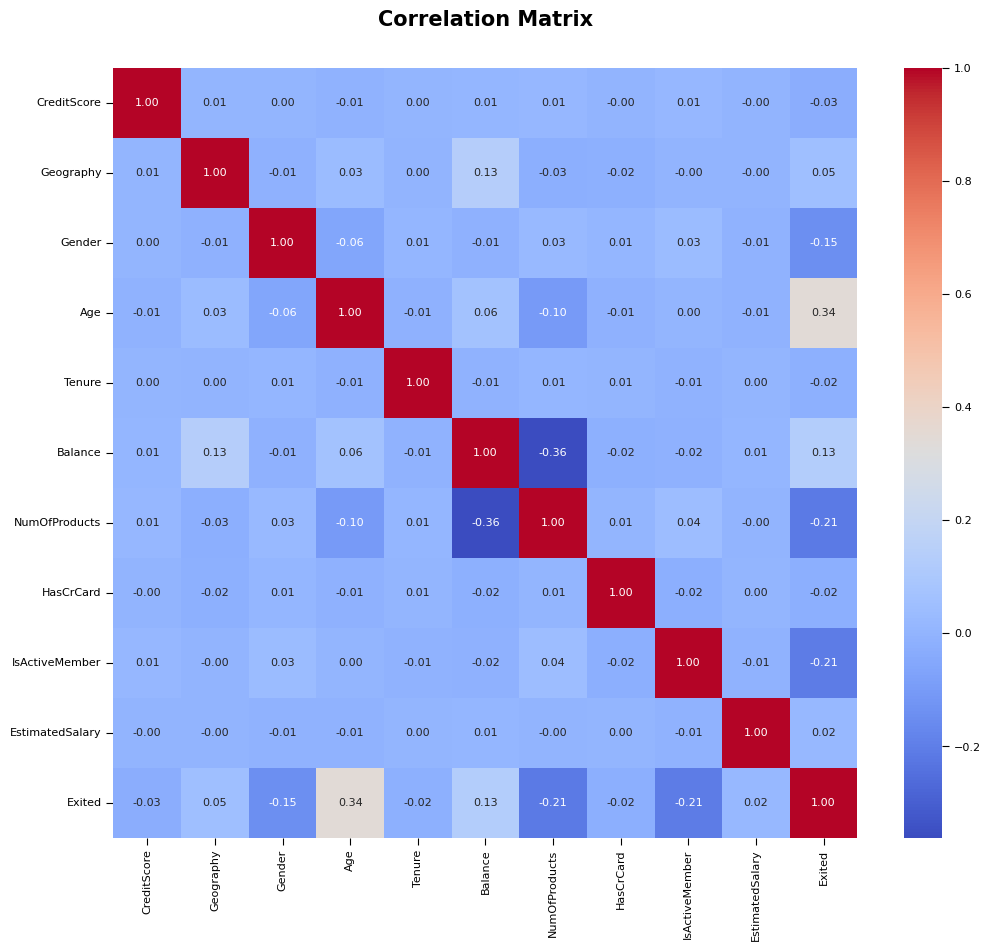

In [69]:
# Plotting the correlation matrix
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap="coolwarm", ax=ax)
plt.title("Correlation Matrix")
plt.show()

##### <code style="background:orange;color:black"> **Insights** </code>

* **Weak Correlations Overall**:
     Most of the correlations are very close to zero, indicating very weak or no linear relationships between the variables. This aligns with the Cramer's V results, which also showed weak associations between the categorical variables.

**Notable Correlations:**

- **Balance-NumOfProducts (-0.361033)**: This shows a weak negative correlation. Customers with higher balances tend to have fewer products. This makes intuitive sense, as someone with a large balance might not need multiple basic accounts.
Age-Exited (0.340768): This shows a weak positive correlation. Older customers are slightly more likely to churn.
- **NumOfProducts-Exited (-0.214554)**: This indicates a weak negative correlation. Customers with more products are less likely to churn.
- **IsActiveMember-Exited (-0.210237)**: This shows a weak negative correlation. Active members are less likely to churn.
**Correlations with Categorical Variables**: It should be reminded that when we calculate Pearson correlations with label-encoded categorical variables, wer are assuming a linear relationship. The results should be interpreted cautiously.



1. Age has a positive correlation (0.341) with Exited. Older customers are more likely to exit.
2. Balance has a moderate positive correlation (0.130) with Exited. Customers with higher balances may be more likely to churn.
3. NumOfProducts (-0.215) and IsActiveMember (-0.210) show a negative correlation with Exited. Fewer products and inactive membership may increase the likelihood of exit.
4. Also, there are visible correlations between independent variables such as NumofProducts and Balance which have a strong negative correlation (-0.361) that may indicate multicollinearity.
5. HasCrCard (-0.022) and EstimatedSalary (0.019) show minimal correlation with Exited, indicating they may have less impact.


In [70]:
# Multicollienarity check with Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(df_encoded[["CreditScore", "Age", "Balance", "Tenure", "HasCrCard", "IsActiveMember", "NumOfProducts", "EstimatedSalary", "Geography"]])
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)


          Variable         VIF
0            const  113.574136
1      CreditScore    1.000574
2              Age    1.012606
3          Balance    1.172468
4           Tenure    1.000268
5        HasCrCard    1.001167
6   IsActiveMember    1.002397
7    NumOfProducts    1.160957
8  EstimatedSalary    1.000223
9        Geography    1.020179


VIF calculation indicates that the variables have VIF values relatively close to 1. This suggests that there is little to no multicollinearity among these predictor variables.

In [71]:
df_encoded.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

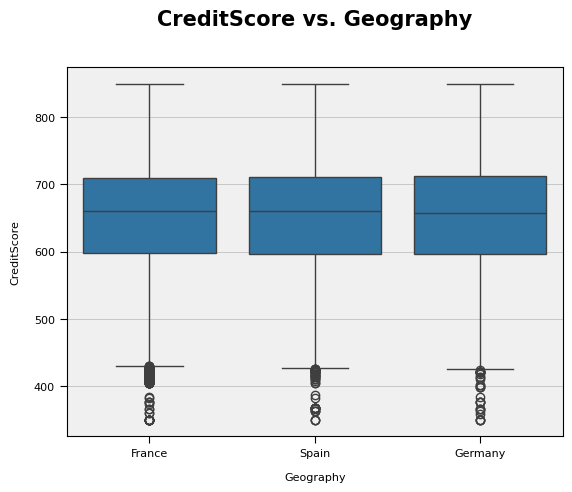

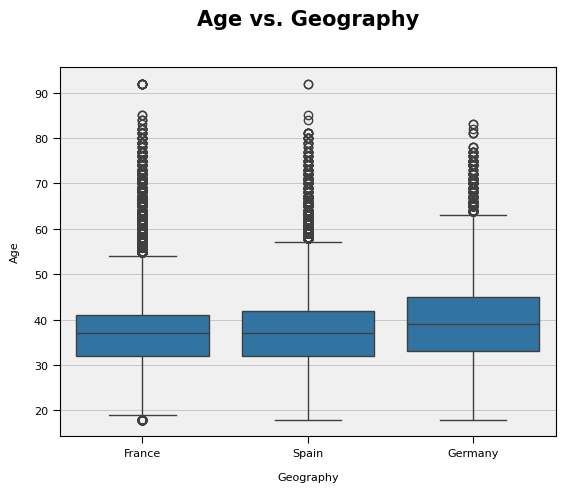

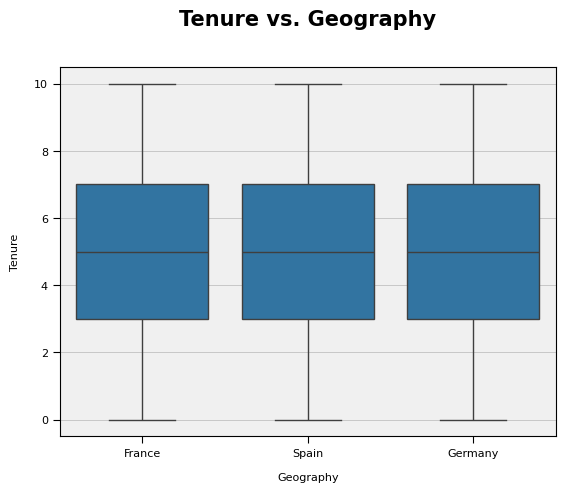

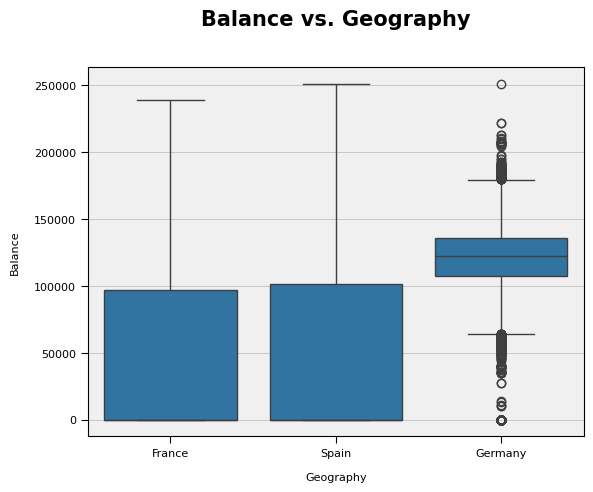

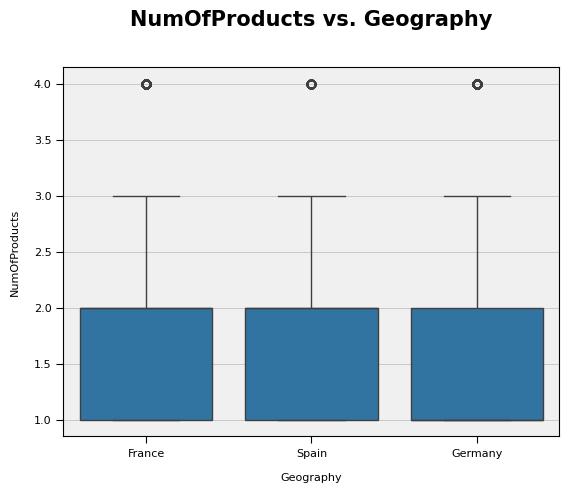

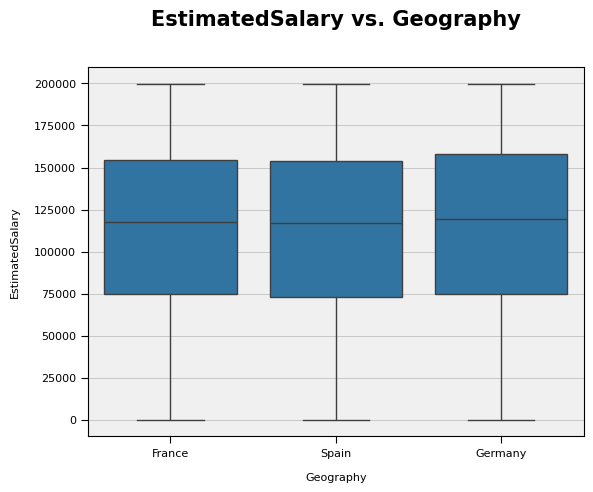

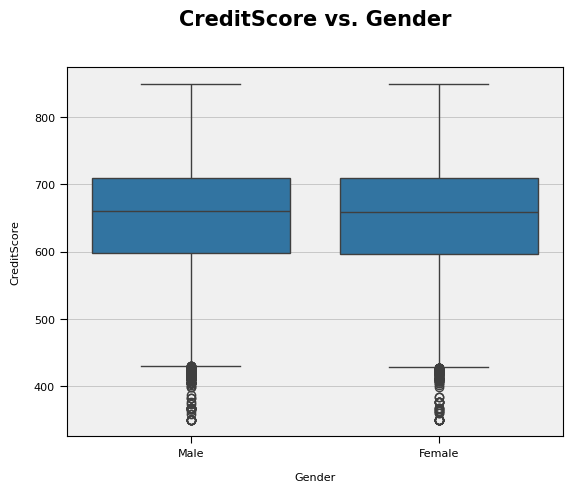

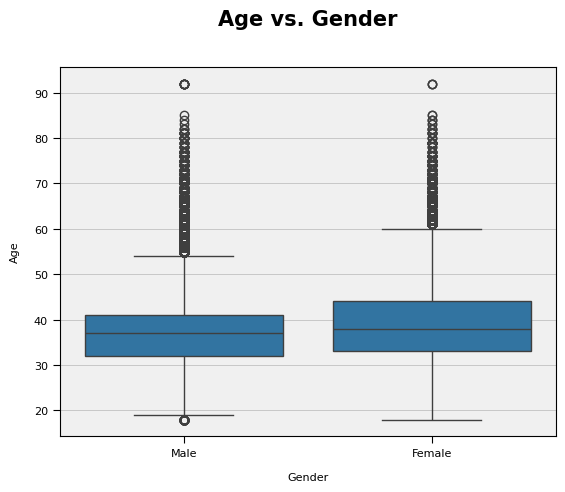

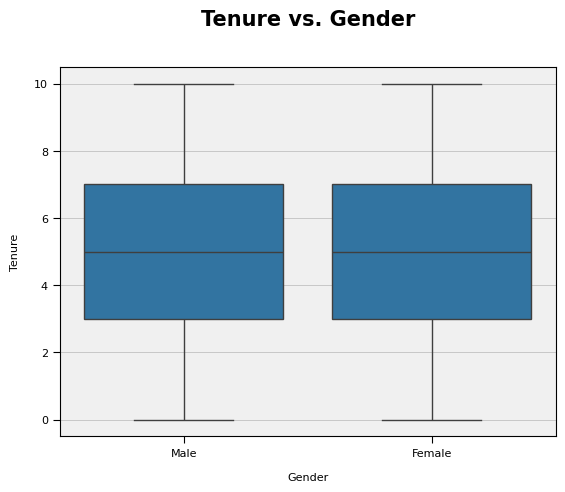

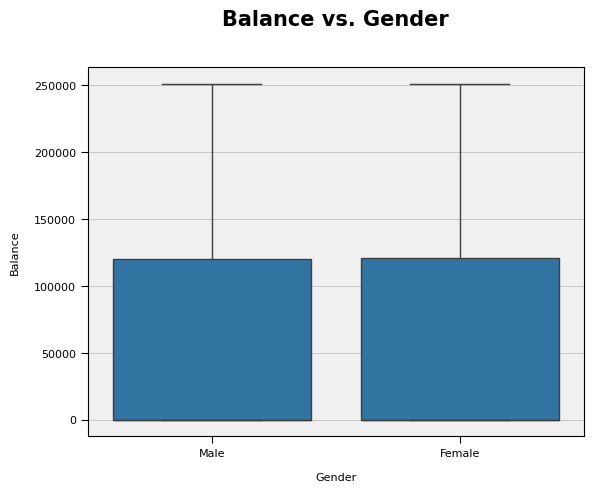

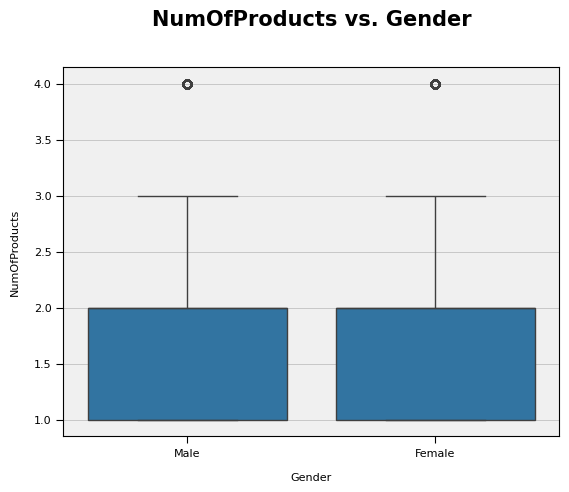

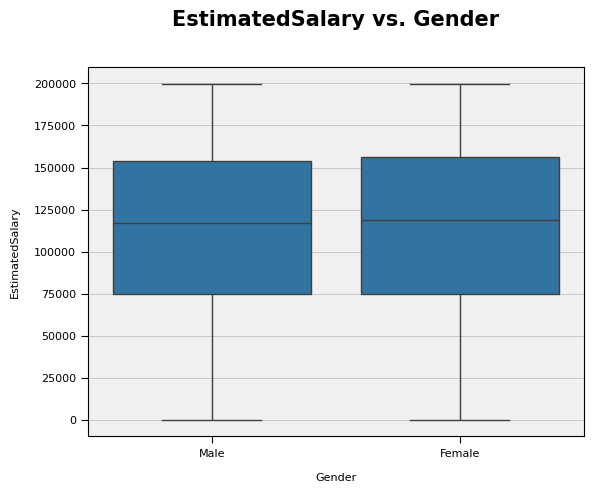

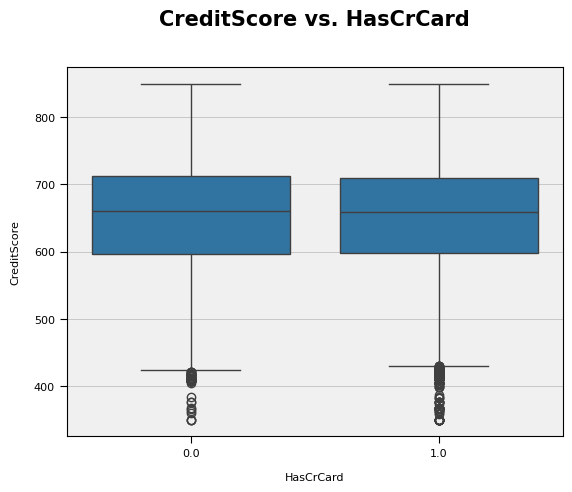

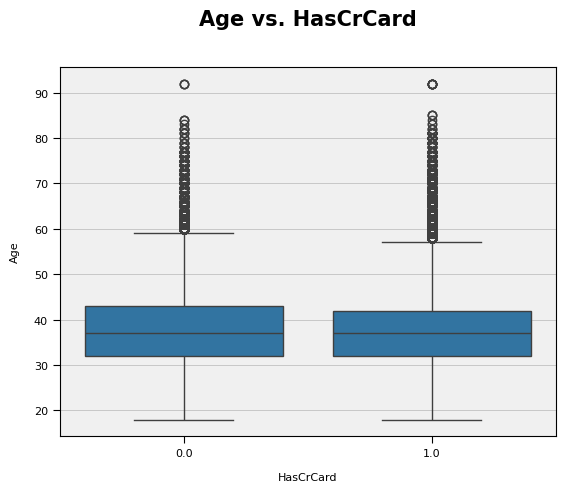

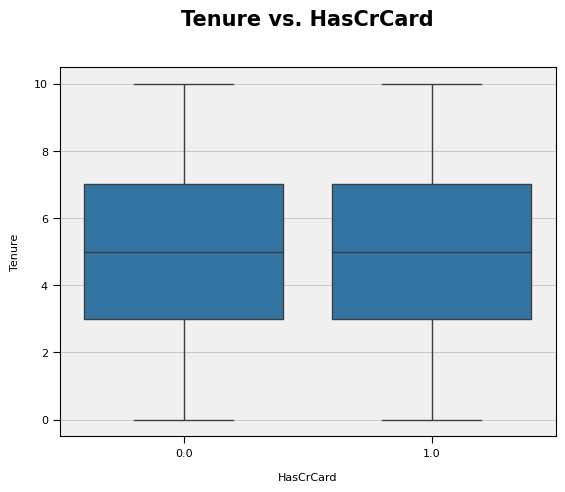

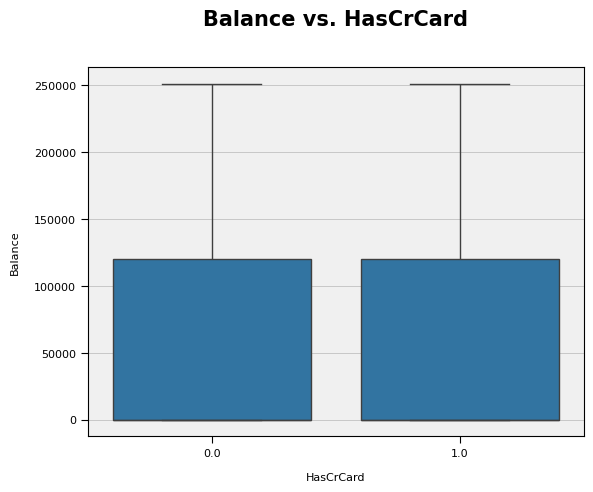

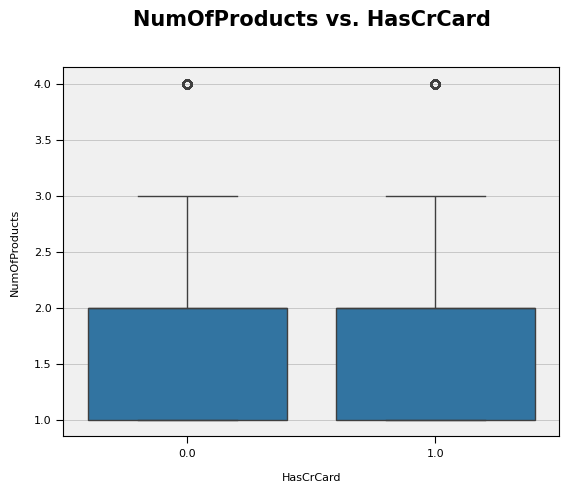

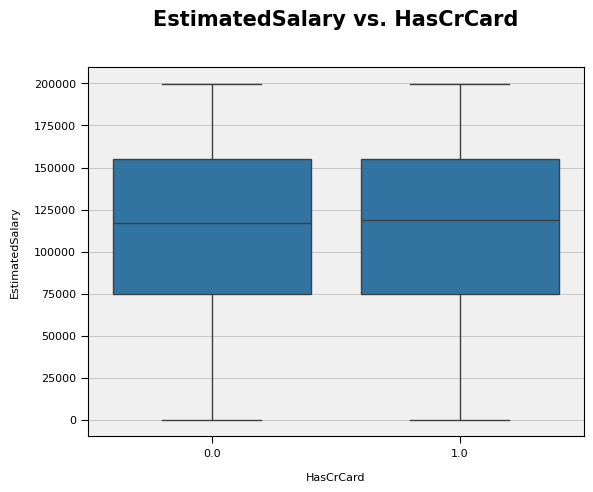

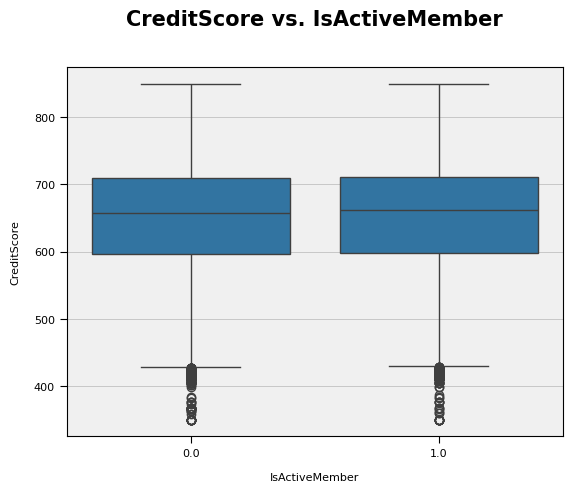

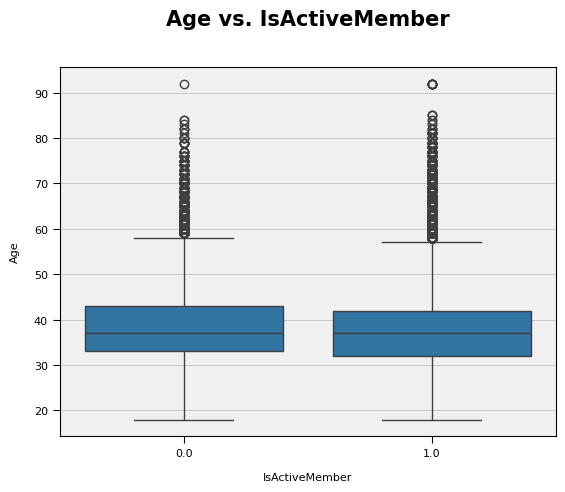

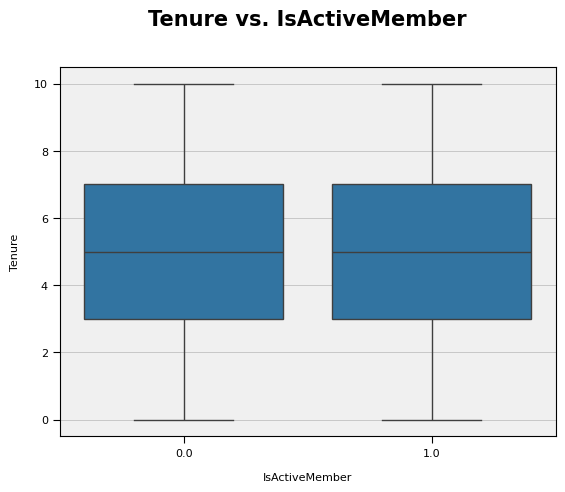

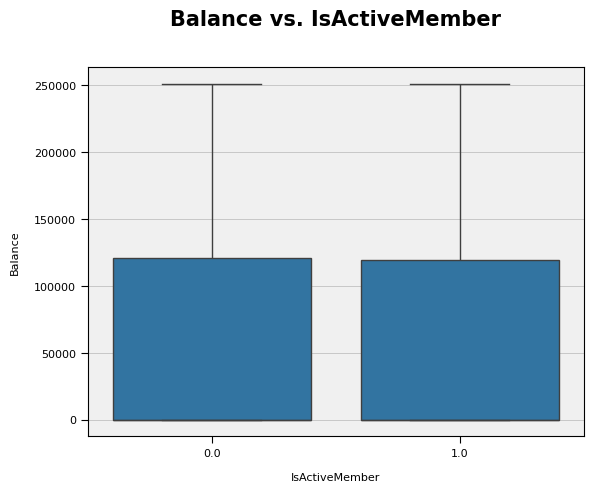

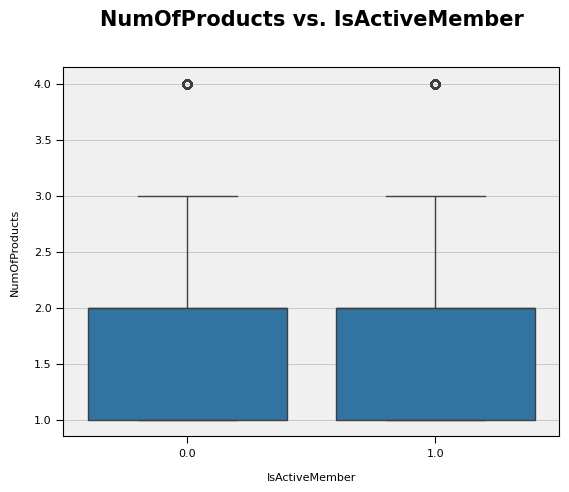

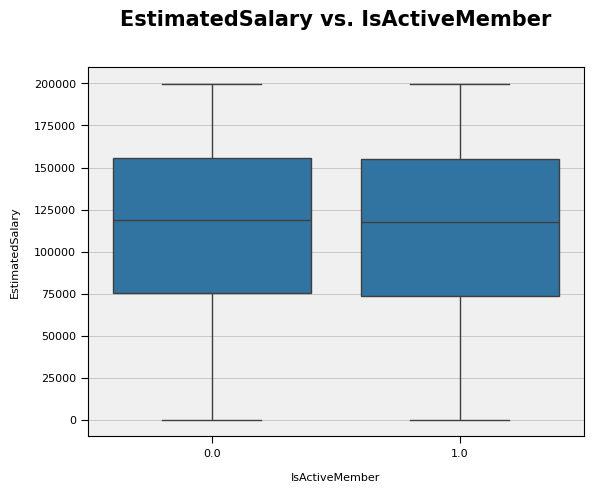

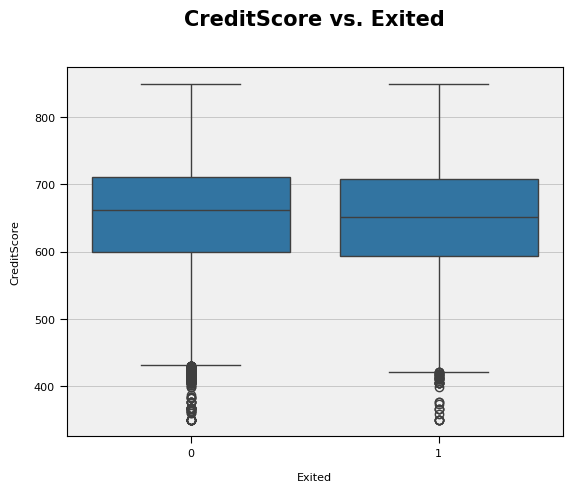

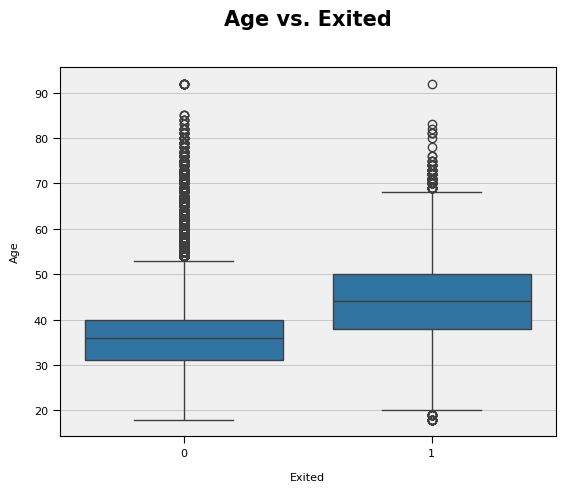

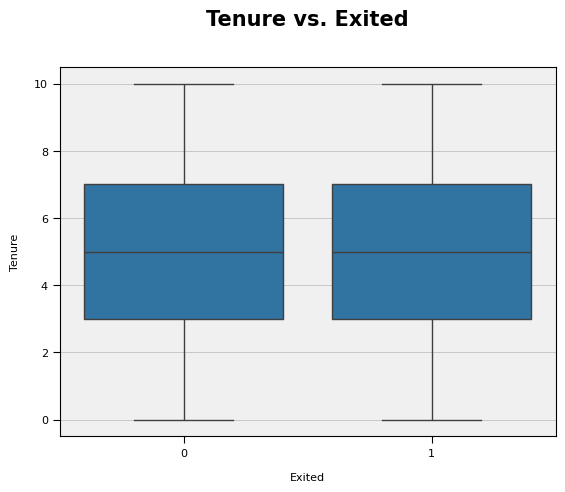

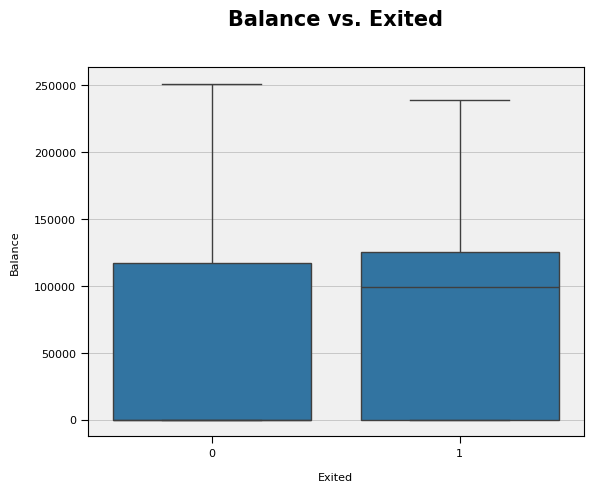

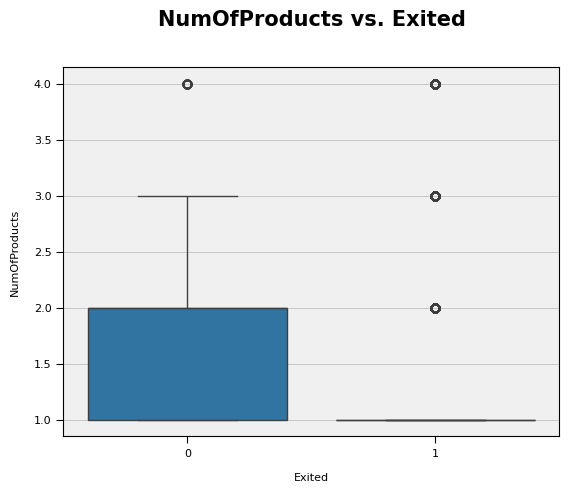

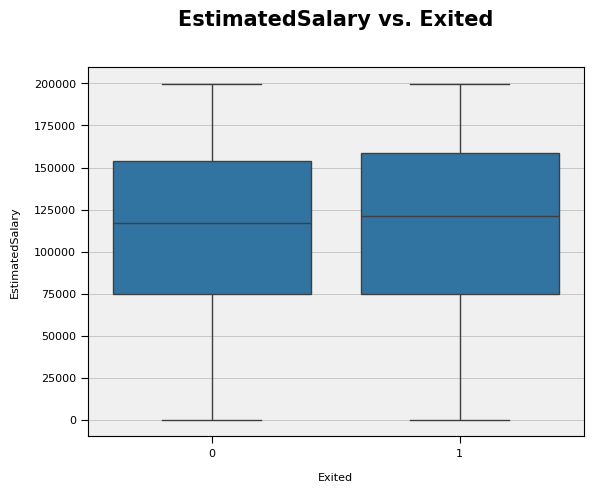

In [72]:
categorical_cols=df_encoded[["Geography", "Gender","HasCrCard","IsActiveMember", "Exited"]]
numerical_cols=df_encoded[["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"]]

for cat in categorical_cols:
    for num in numerical_cols:
        sns.boxplot(x=cat, y=num, data=df)
        plt.title(f"{num} vs. {cat}")
        plt.show()


## <code style="background:white;color:black"> **6. TREE-BASED MODEL DEVELOPMENT TO UNCOVER DECISION RULES & MAKE PREDICTIONS** </code>

### <code style="background:white;color:black" > **6.1. Scikit-learn DecisionTreeClassifier** </code>


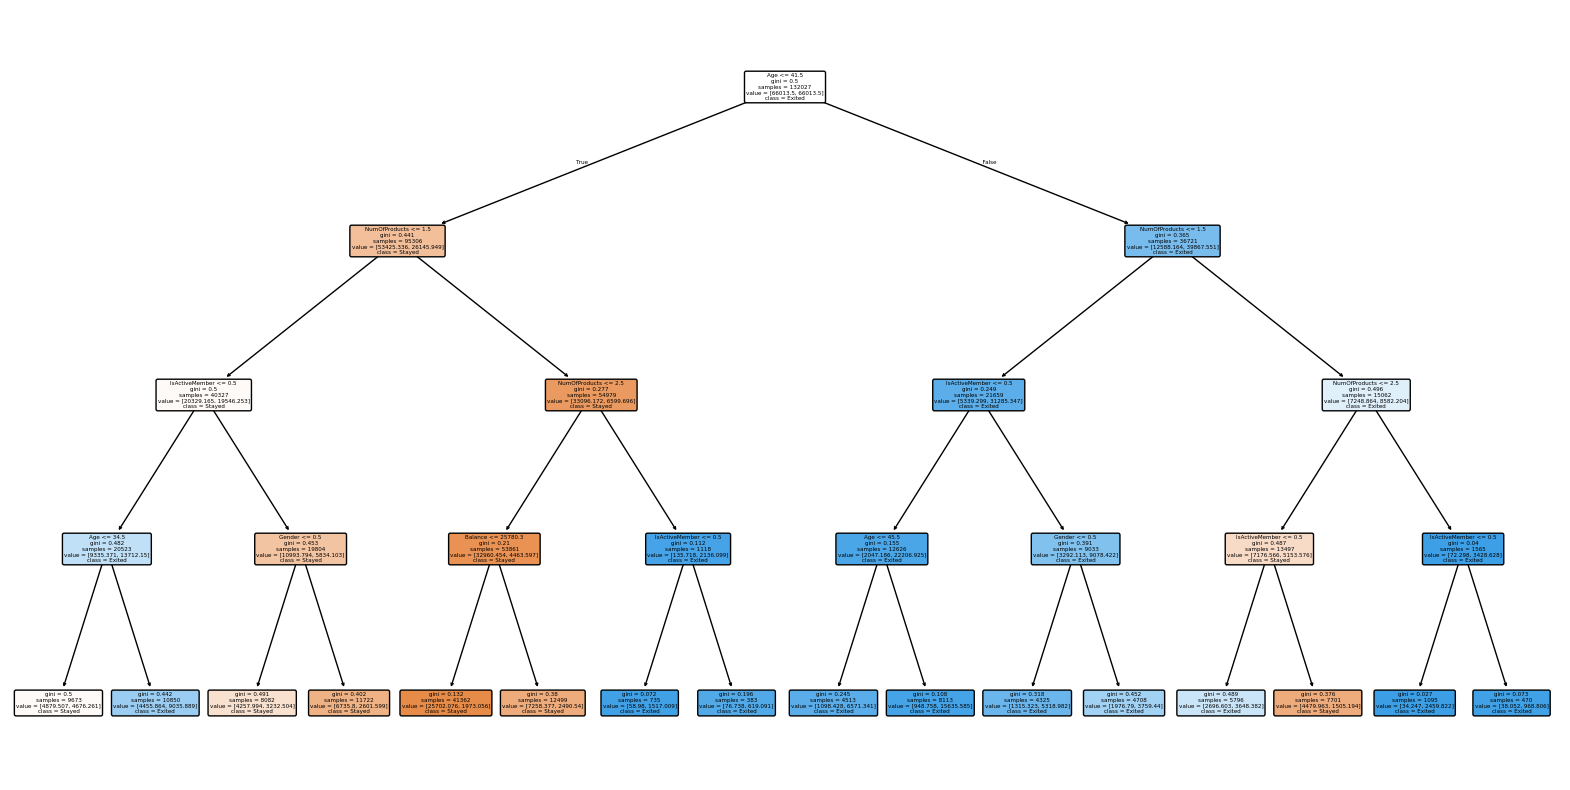

In [73]:

X = df_encoded.drop("Exited", axis=1)
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


tree_model_v1 = DecisionTreeClassifier(class_weight="balanced", max_depth=4, random_state=42)
tree_model_v1.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(tree_model_v1, feature_names=X.columns, class_names=['Stayed', 'Exited'], filled=True, rounded=True)
plt.show()


In [74]:
param_grid = {
    "max_depth": [3, 4, 5, 6, 7, 8, 9, 10],
    "criterion": ["gini", "entropy"],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "class_weight": ["balanced", None]    
}

scoring_metric = "roc_auc"

# Stratified K-Fold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid Search with StratifiedKFold and F1-score
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42),
                           param_grid,
                           cv=cv,
                           scoring=scoring_metric,
                           n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))


Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 10}
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     26023
           1       0.73      0.55      0.63      6984

    accuracy                           0.86     33007
   macro avg       0.81      0.75      0.77     33007
weighted avg       0.85      0.86      0.85     33007



In [75]:
y_pred = tree_model_v1.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7976489835489442
ROC AUC Score: 0.7785423505658203
              precision    recall  f1-score   support

           0       0.92      0.81      0.86     26023
           1       0.52      0.75      0.61      6984

    accuracy                           0.80     33007
   macro avg       0.72      0.78      0.74     33007
weighted avg       0.84      0.80      0.81     33007



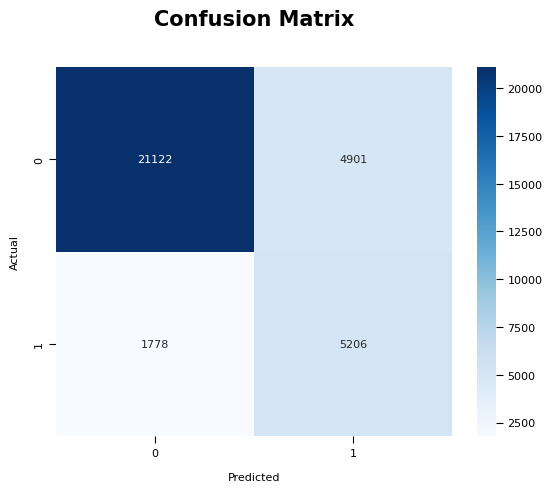

In [76]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [77]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 79.76%


In [78]:
rules_text = export_text(tree_model_v1, feature_names=list(X.columns))
print(rules_text)

|--- Age <= 41.50
|   |--- NumOfProducts <= 1.50
|   |   |--- IsActiveMember <= 0.50
|   |   |   |--- Age <= 34.50
|   |   |   |   |--- class: 0
|   |   |   |--- Age >  34.50
|   |   |   |   |--- class: 1
|   |   |--- IsActiveMember >  0.50
|   |   |   |--- Gender <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- Gender >  0.50
|   |   |   |   |--- class: 0
|   |--- NumOfProducts >  1.50
|   |   |--- NumOfProducts <= 2.50
|   |   |   |--- Balance <= 25780.30
|   |   |   |   |--- class: 0
|   |   |   |--- Balance >  25780.30
|   |   |   |   |--- class: 0
|   |   |--- NumOfProducts >  2.50
|   |   |   |--- IsActiveMember <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- IsActiveMember >  0.50
|   |   |   |   |--- class: 1
|--- Age >  41.50
|   |--- NumOfProducts <= 1.50
|   |   |--- IsActiveMember <= 0.50
|   |   |   |--- Age <= 45.50
|   |   |   |   |--- class: 1
|   |   |   |--- Age >  45.50
|   |   |   |   |--- class: 1
|   |   |--- IsActiveMember >  0.50
|   |   |   |--- Ge

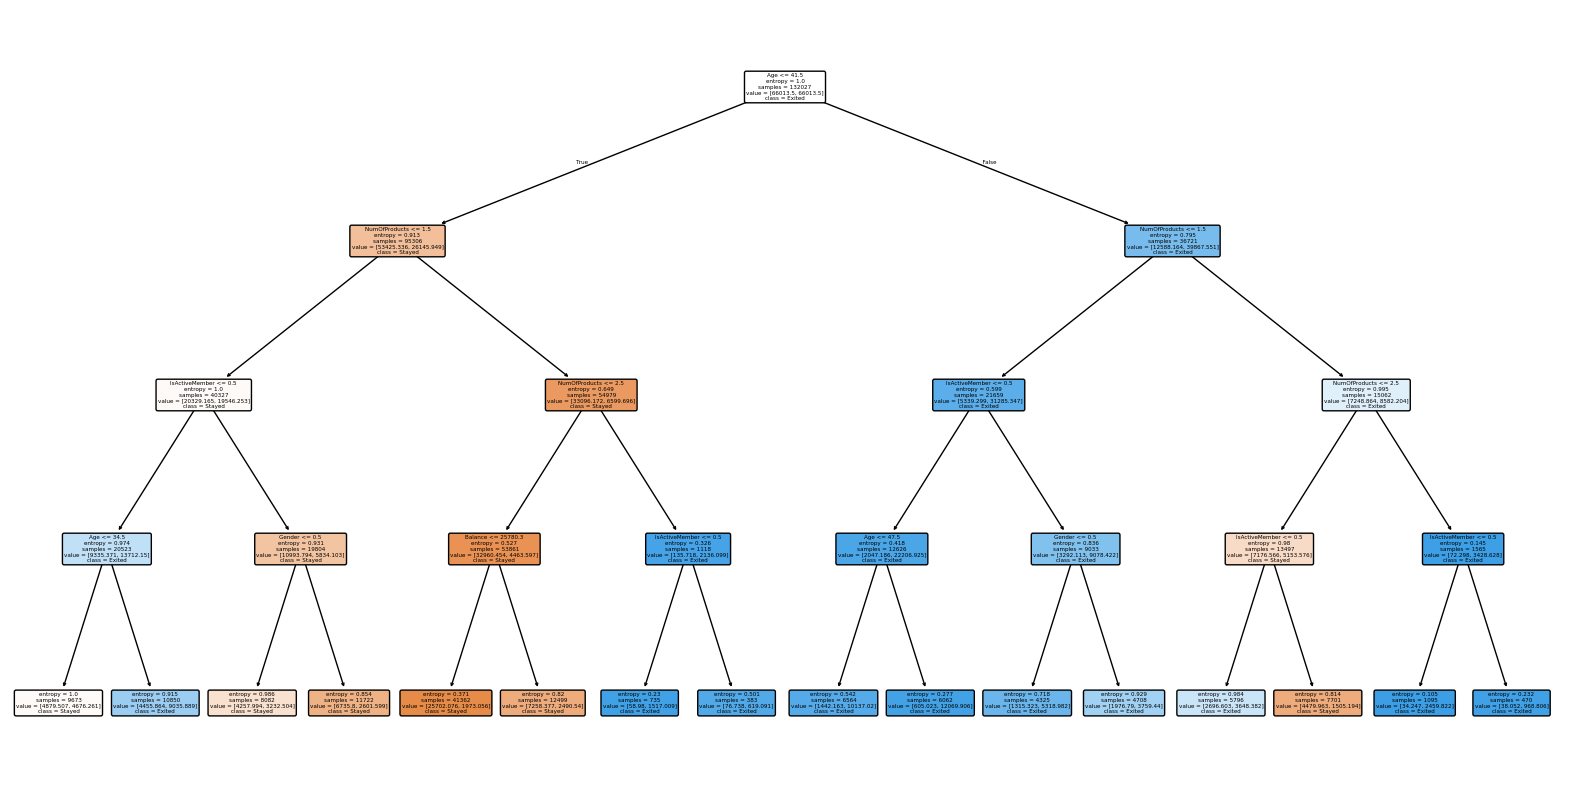

Accuracy: 0.7976489835489442
ROC AUC Score: 0.7785423505658203
              precision    recall  f1-score   support

           0       0.92      0.81      0.86     26023
           1       0.52      0.75      0.61      6984

    accuracy                           0.80     33007
   macro avg       0.72      0.78      0.74     33007
weighted avg       0.84      0.80      0.81     33007



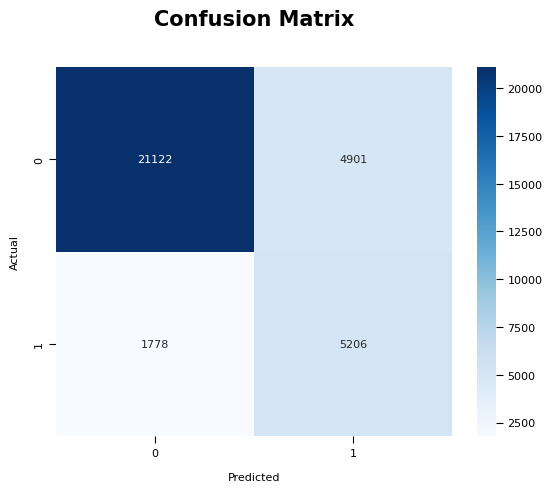

In [79]:


tree_model_v2 = DecisionTreeClassifier(class_weight="balanced", 
                                       max_depth=4, 
                                       random_state=42,
                                       criterion="entropy",
                                        min_samples_leaf=4,
                                        min_samples_split=10
                                       )

tree_model_v2.fit(X_train, y_train)


plt.figure(figsize=(20, 10))
plot_tree(tree_model_v2, feature_names=X.columns, class_names=['Stayed', 'Exited'], filled=True, rounded=True)
plt.show()

y_pred = tree_model_v2.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##### <code style="background:orange;color:black"> **Insights** </code>

**General Insights Across All Customers**

- **Balance and Product Count**: Customers with 2 products are generally more likely to stay, especially if they are active. This suggests that increasing product usage (cross-selling or upselling) and encouraging customers to be more active could reduce churn. Currently, there are more customers with 2 products than only 1 or more. Since the churn rate for customers with only 2 proudcts higher than the rest, it is signinifant to make investments in this
- **Age and Activity**: Younger customers (≤ 41.50) who are not active and have fewer products are more likely to churn, especially if their age exceeds 34. For these customers, a strategy to boost activity or re-engage them may be necessary.
- **Age**: Older customers (Age > 41.50) with fewer products might need more attention, especially in terms of increasing their activity level or targeting them with product offerings that resonate with their specific needs (e.g., retirement planning, higher interest savings accounts).

    **Prioritizing Action Based on the Insights**

- **Focus on Inactive Customers** : Inactive members with fewer products (especially those over 34 years old) are more likely to churn. Offering re-engagement strategies, such as personalized offers or loyalty programs, can reduce the churn rate.
- **Enhance Product Offerings for Active Customers**: Customers with multiple products, especially if they are active, have a low churn probability. Loyalty rewards or premium benefits can increase their lifetime value and further reduce churn.
- **Target Specific Customer Segments with High Churn Risk**: Customers over 34 years old with fewer products and low activity should be targeted with reactivation campaigns. Similarly, older customers with low credit scores are at higher risk and should be offered targeted services to help them improve their credit and engagement.

### <code style="background:white;color:black" > **6.2. GMB Based Predictor** </code>


For better prediction of churn, a XGMBoost model developed. DecisionTree is used for providing insights about the rules that leads to churn. This new model will also be used for unsupervised clustering for customer segmentation.

Accuracy: 0.8130112500252469
Precision: 0.5394021739130435
Recall: 0.7958190148911798
F1 Score: 0.6429893567792688
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.82      0.87     39035
           1       0.54      0.80      0.64     10476

    accuracy                           0.81     49511
   macro avg       0.74      0.81      0.76     49511
weighted avg       0.85      0.81      0.82     49511

ROC AUC Score: 0.8882581792717621


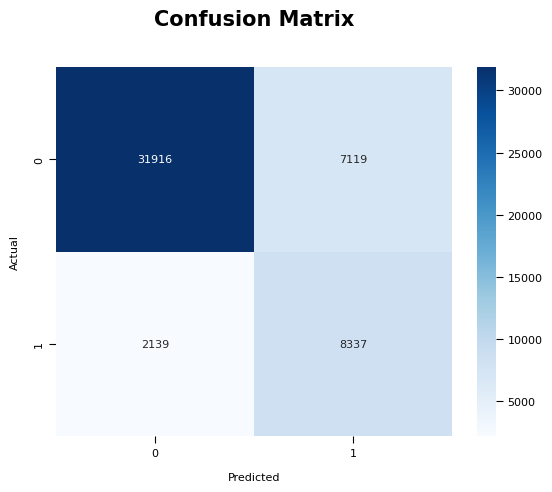

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

xgb_model_v1 = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight, 
                                 random_state=42,
                                 n_estimators=100,
                                 learning_rate=0.1,
                                 max_depth=4,
                                 subsample=0.8,
                                 colsample_bytree=0.8)

xgb_model_v1.fit(X_train, y_train)
y_pred = xgb_model_v1.predict(X_test)
y_pred_prob = xgb_model_v1.predict_proba(X_test)[:, 1]  # Probability predictions for ROC AUC

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_prob))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Since the current version of Scikit-learn isn't compatible with XGBoost, we can use XGBoost's built-in hyperparameter tuning using xgboost.cv and GridSearch-like loops

In [81]:
# # Apply SMOTE to balance the training set
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# dtrain = DMatrix(X_train, label=y_train)
# dtest = DMatrix(X_test, label=y_test)

# # Define parameter grid
# # Define the grid of hyperparameters to search
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.05, 0.1, 0.2],
#     'max_depth': [3, 4, 5],
#     'subsample': [0.8, 0.9],
#     'colsample_bytree': [0.7, 0.8, 1.0],
#     'gamma': [0, 0.1, 0.3],  # Minimum loss reduction to make a further partition
#     'reg_alpha': [0, 0.1, 1.0],  # L1 regularization term on weights
#     'reg_lambda': [1.0, 1.5, 2.0]  # L2 regularization term on weights
# }

# best_f1 = 0
# best_params = None

# # Manual grid search for the best hyperparameters
# for n_estimators in param_grid['n_estimators']:
#     for learning_rate in param_grid['learning_rate']:
#         for max_depth in param_grid['max_depth']:
#             for subsample in param_grid['subsample']:
#                 for colsample_bytree in param_grid['colsample_bytree']:
#                     for gamma in param_grid['gamma']:
#                         for reg_alpha in param_grid['reg_alpha']:
#                             for reg_lambda in param_grid['reg_lambda']:
#                                 params = {
#                                     'objective': 'binary:logistic',
#                                     'learning_rate': learning_rate,
#                                     'max_depth': max_depth,
#                                     'subsample': subsample,
#                                     'colsample_bytree': colsample_bytree,
#                                     'gamma': gamma,
#                                     'reg_alpha': reg_alpha,
#                                     'reg_lambda': reg_lambda,
#                                     'eval_metric': 'auc'
#                                 }
#                                 model = xgb.XGBClassifier(**params, n_estimators=n_estimators, random_state=42)
#                                 model.fit(X_train_resampled, y_train_resampled)
#                                 y_pred = model.predict(X_test)
#                                 f1 = f1_score(y_test, y_pred)
#                                 if f1 > best_f1:
#                                     best_f1 = f1
#                                     best_params = params.copy()
#                                     best_params['n_estimators'] = n_estimators

# print("Best F1 Score:", best_f1)
# print("Best Parameters:", best_params)

Best F1 Score: 0.6521204089360091
Best Parameters: {'objective': 'binary:logistic', 'learning_rate': 0.05, 'max_depth': 5, 'subsample': 0.8, 'colsample_bytree': 0.7, 'gamma': 0, 'reg_alpha': 0.1, 'reg_lambda': 1.0, 'eval_metric': 'auc', 'n_estimators': 100}

Final Accuracy: 0.8515481408171921
Final Precision: 0.6480674497915877
Final Recall: 0.653016418480336
Final F1 Score: 0.650532521871434
Final Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.91     39035
           1       0.65      0.65      0.65     10476

    accuracy                           0.85     49511
   macro avg       0.78      0.78      0.78     49511
weighted avg       0.85      0.85      0.85     49511

Final ROC AUC Score: 0.88174102426069


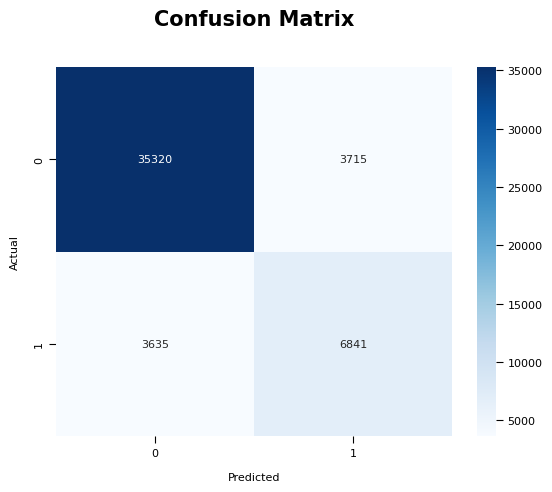

In [82]:
xgb_model_v2 = xgb.XGBClassifier(
    objective='binary:logistic',
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.7,
    gamma=0.15,
    reg_alpha=0.1,
    reg_lambda=1.0,
    eval_metric='auc',
    n_estimators=100,
)
smote=SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

xgb_model_v2.fit(X_train_resampled, y_train_resampled)

final_y_pred = xgb_model_v2.predict(X_test)
final_y_pred_prob = xgb_model_v2.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Final Accuracy:", accuracy_score(y_test, final_y_pred))
print("Final Precision:", precision_score(y_test, final_y_pred))
print("Final Recall:", recall_score(y_test, final_y_pred))
print("Final F1 Score:", f1_score(y_test, final_y_pred))
print("Final Classification Report:\n", classification_report(y_test, final_y_pred))
print("Final ROC AUC Score:", roc_auc_score(y_test, final_y_pred_prob))

cm = confusion_matrix(y_test, final_y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Evaluation Summary**
- Accuracy (0.8515): Indicates that 85.15% of predictions were correct. While this is a useful overall measure, it can be misleading with imbalanced datasets.
- Precision (0.6481): For churned customers (positive class), 64.81% of predicted churn cases were actual churns.
- Recall (0.6530): The model correctly identified 65.30% of actual churns. This is critical if identifying all churns is a priority.
- F1 Score (0.6505): A balance between precision and recall, showing the overall effectiveness for the minority class.
- ROC AUC Score (0.8817): A strong score indicating good model discrimination between churn and non-churn.

**Strengths**
- Balanced Trade-off: Precision and recall are closely aligned, indicating a balanced performance in classifying churn.
- Improved AUC: The high AUC suggests the model effectively separates classes at various thresholds.


In [83]:
bst = xgb_model_v2.get_booster()

for importance_type in ('weight', 'gain', 'cover', 'total_gain', 'total_cover'):
    print('%s: ' % importance_type, bst.get_score(importance_type=importance_type))

node_params = {'shape': 'box',
               'style': 'filled, rounded',
               'fillcolor': '#78cbe'}

leaf_params = {'shape': 'box',
               'style': 'filled',
               'fillcolor': '#e48038'}

xgb.to_graphviz(xgb_model_v2, num_trees=0, size="10,10",
                condition_node_params=node_params,
                leaf_node_params=leaf_params)


weight:  {'CreditScore': 137.0, 'Geography': 239.0, 'Gender': 209.0, 'Age': 704.0, 'Tenure': 125.0, 'Balance': 302.0, 'NumOfProducts': 245.0, 'HasCrCard': 270.0, 'IsActiveMember': 328.0, 'EstimatedSalary': 122.0}
gain:  {'CreditScore': 9.343853950500488, 'Geography': 181.54608154296875, 'Gender': 393.3630065917969, 'Age': 434.953125, 'Tenure': 41.4255485534668, 'Balance': 99.33563995361328, 'NumOfProducts': 1516.296630859375, 'HasCrCard': 345.2500305175781, 'IsActiveMember': 986.40234375, 'EstimatedSalary': 7.266967296600342}
cover:  {'CreditScore': 774.9796752929688, 'Geography': 3835.020751953125, 'Gender': 4684.29638671875, 'Age': 4457.91650390625, 'Tenure': 2844.702880859375, 'Balance': 2392.29052734375, 'NumOfProducts': 7557.5048828125, 'HasCrCard': 3588.64501953125, 'IsActiveMember': 6257.130859375, 'EstimatedSalary': 513.3153076171875}
total_gain:  {'CreditScore': 1280.1080322265625, 'Geography': 43389.51171875, 'Gender': 82212.8671875, 'Age': 306207.0, 'Tenure': 5178.193359375,

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

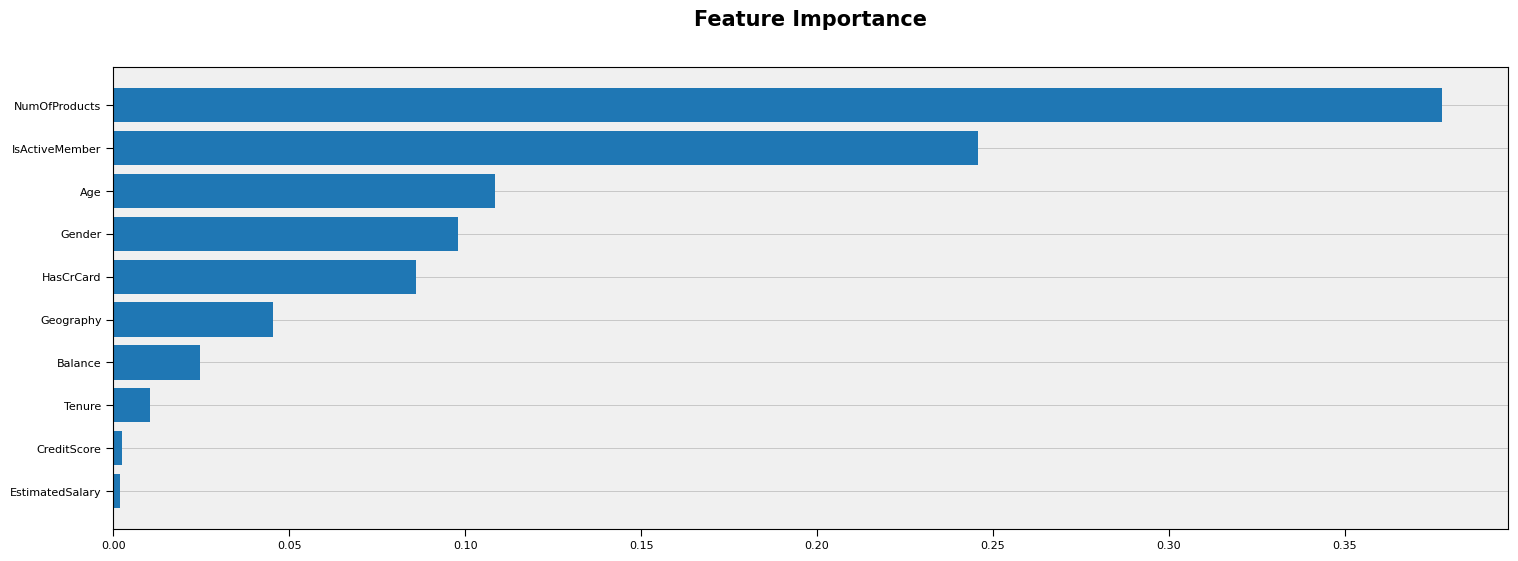

In [84]:
importances = xgb_model_v2.feature_importances_
# Visualize the importance  
sorted_idx = np.argsort(importances)
fig = plt.figure(figsize=(18, 6))
plt.barh(range(len(sorted_idx)), importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')
plt.show()

In [85]:
df_viz = df.copy()
df_viz.to_csv("data/raw-data/processed-data/bank-data-processed.csv", index=False)

In [86]:
df_prediction = pd.read_csv("data/raw-data/test-data.csv")
df_prediction.head()

id  CustomerId    Surname  CreditScore Geography  Gender   Age  Tenure  \
0  165034    15773898   Lucchese          586    France  Female  23.0       2   
1  165035    15782418       Nott          683    France  Female  46.0       2   
2  165036    15807120         K?          656    France  Female  34.0       7   
3  165037    15808905  O'Donnell          681    France    Male  36.0       8   
4  165038    15607314    Higgins          752   Germany    Male  38.0      10   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
0       0.00              2        0.0             1.0        160976.75  
1       0.00              1        1.0             0.0         72549.27  
2       0.00              2        1.0             0.0        138882.09  
3       0.00              1        1.0             0.0        113931.57  
4  121263.62              1        1.0             0.0        139431.00

In [87]:
X_new = df_prediction.copy()

X_new.drop(["id", "CustomerId", "Surname"], axis=1, inplace=True)

for col in X_new.select_dtypes(include=["object"]):
    X_new[col] = label_encoder.fit_transform(X_new[col]) # Fit and transform each column

X_new.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      110023 non-null  int64  
 1   Geography        110023 non-null  int64  
 2   Gender           110023 non-null  int64  
 3   Age              110023 non-null  float64
 4   Tenure           110023 non-null  int64  
 5   Balance          110023 non-null  float64
 6   NumOfProducts    110023 non-null  int64  
 7   HasCrCard        110023 non-null  float64
 8   IsActiveMember   110023 non-null  float64
 9   EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 8.4 MB


In [88]:
joblib.dump(xgb_model_v2, "models/xgb_model_v2.pkl")

['models/xgb_model_v2.pkl']

In [89]:
model = joblib.load("models/xgb_model_v2.pkl")

In [90]:
churn_predictions = model.predict(X_new)

# Predict churn probabilities
churn_probabilities = model.predict_proba(X_new)[:, 1]  # Probabilities for churn class

# Add predictions to the dataframe
df_prediction['Churn_Predicted'] = churn_predictions
df_prediction['Churn_Probability'] = churn_probabilities


In [91]:
df_prediction.head()

id  CustomerId    Surname  CreditScore Geography  Gender   Age  Tenure  \
0  165034    15773898   Lucchese          586    France  Female  23.0       2   
1  165035    15782418       Nott          683    France  Female  46.0       2   
2  165036    15807120         K?          656    France  Female  34.0       7   
3  165037    15808905  O'Donnell          681    France    Male  36.0       8   
4  165038    15607314    Higgins          752   Germany    Male  38.0      10   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              2        0.0             1.0        160976.75   
1       0.00              1        1.0             0.0         72549.27   
2       0.00              2        1.0             0.0        138882.09   
3       0.00              1        1.0             0.0        113931.57   
4  121263.62              1        1.0             0.0        139431.00   

   Churn_Predicted  Churn_Probability  
0                0           0.041323  
1                1           0.915308  
2                0           0.082940  
3                0           0.329121  
4                0           0.397862

In [161]:
# One-hot encoding the data to conduct K-Means clustering analysis
df_onehot = df.copy()
df_onehot.drop(["id", "CustomerId", "Surname"], axis=1, inplace=True)
df_onehot = pd.get_dummies(df_onehot, columns=["Geography","Gender","NumOfProducts"], drop_first=True)



Final Accuracy: 0.840336898233708
Final Precision: 0.6044612384202828
Final Recall: 0.7100515463917526
Final F1 Score: 0.6530155385830919
Final Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90     26023
           1       0.60      0.71      0.65      6984

    accuracy                           0.84     33007
   macro avg       0.76      0.79      0.77     33007
weighted avg       0.85      0.84      0.84     33007

Final ROC AUC Score: 0.8824200155743802


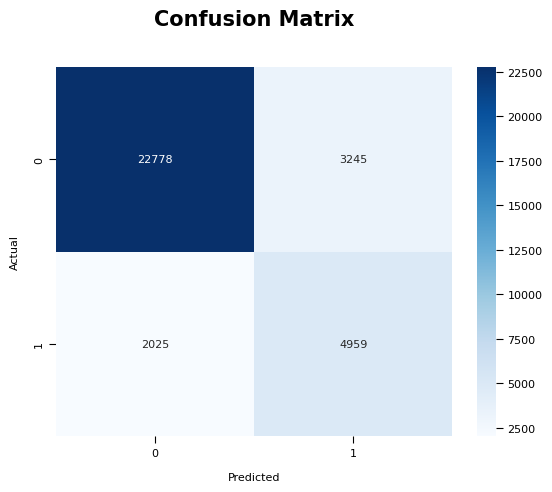

In [166]:
X = df_onehot.drop("Exited", axis=1)
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

xgb_model_v3 = xgb.XGBClassifier(
    scale_pos_weight=1.5,
    objective='binary:logistic',
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.7,
    gamma=1.0,
    reg_alpha=0.1,
    reg_lambda=10.0,
    eval_metric="auc",
    n_estimators=100,
)

smote=SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

xgb_model_v3.fit(X_train_resampled, y_train_resampled)

v3_y_pred = xgb_model_v3.predict(X_test)
v3_y_pred_prob = xgb_model_v3.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Final Accuracy:", accuracy_score(y_test, v3_y_pred))
print("Final Precision:", precision_score(y_test, v3_y_pred))
print("Final Recall:", recall_score(y_test, v3_y_pred))
print("Final F1 Score:", f1_score(y_test, v3_y_pred))
print("Final Classification Report:\n", classification_report(y_test, v3_y_pred))
print("Final ROC AUC Score:", roc_auc_score(y_test, v3_y_pred_prob))

cm = confusion_matrix(y_test, v3_y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

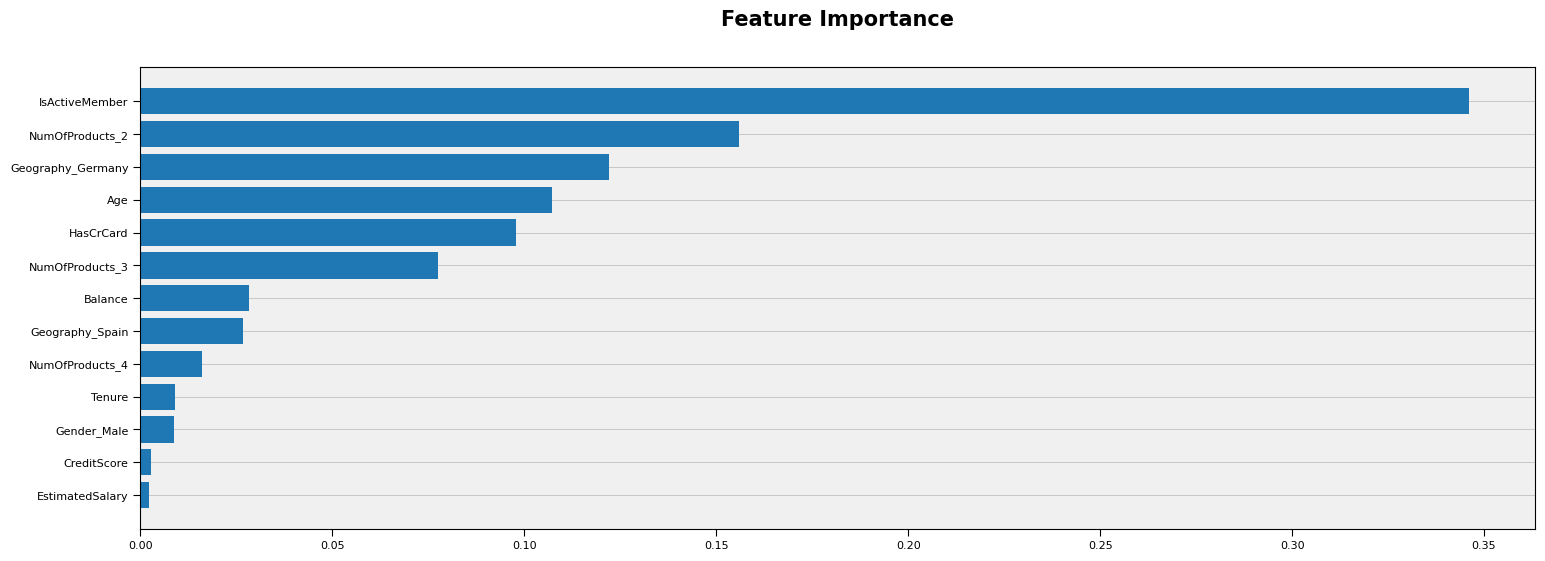

In [202]:
importances = xgb_model_v3.feature_importances_
# Visualize the importance  
sorted_idx = np.argsort(importances)
fig = plt.figure(figsize=(18, 6))
plt.barh(range(len(sorted_idx)), importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')
plt.show()

In [169]:
df_past = pd.read_csv("data/raw-data/processed-data/bank-data-processed.csv")
df_past = df_past.drop({"id", "CustomerId", "Surname", "Exited"}, axis=1)
df_past = pd.get_dummies(df_past, columns=["Geography", "Gender", "NumOfProducts"], drop_first=True)



In [ ]:
churn_probabilities_past = xgb_model_v3.predict_proba(df_past)[:, 1] # churn probabilities for each customer
df_past["Churn_Probability"] = churn_probabilities_past

In [ ]:
scaler = StandardScaler()
df_past_scaled = scaler.fit_transform(df_past)

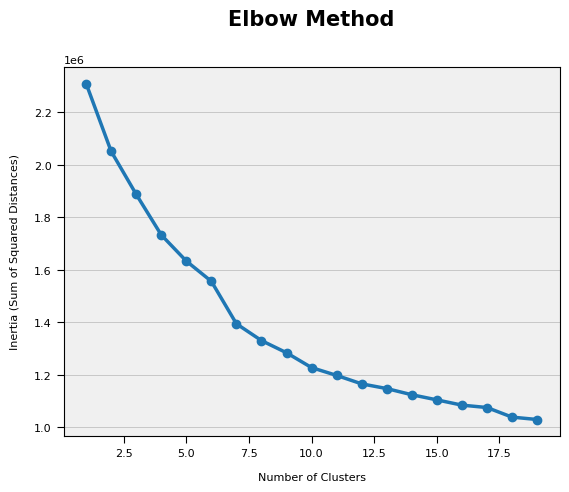

In [153]:
# Fit KMeans for a range of cluster numbers
inertias = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_past_scaled)
    inertias.append(kmeans.inertia_)

# Plot the inertia values
plt.plot(range(1, 20), inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method')
plt.show()


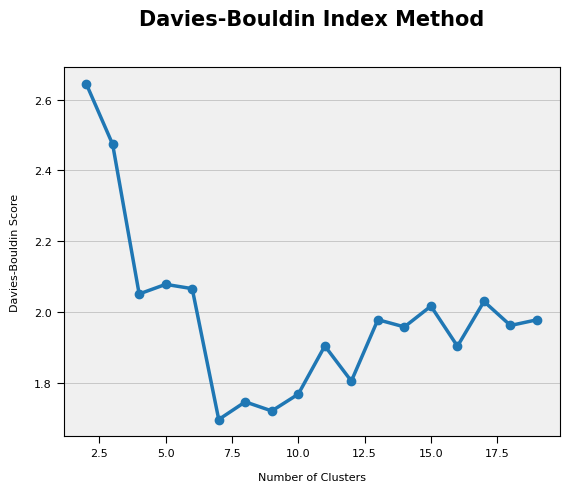

In [157]:
db_scores = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, max_iter=300, init="k-means++", n_init=10, random_state=42)
    kmeans.fit(df_past_scaled)
    db_scores.append(davies_bouldin_score(df_past_scaled, kmeans.labels_))

# Plot Davies-Bouldin scores
plt.plot(range(2, 20), db_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Score')
plt.title('Davies-Bouldin Index Method')
plt.show()


In [176]:
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans_labels = kmeans.fit_predict(df_past_scaled)

df_past["KMeans_Cluster"] = kmeans_labels

gmm = GaussianMixture(n_components=7, random_state=42)
gmm_labels = gmm.fit_predict(df_past_scaled)

df_past["GMM_Cluster"] = gmm_labels

In [179]:
# Compare the clustering results

ch_kmeans = calinski_harabasz_score(df_past_scaled, kmeans_labels)
ch_gmm = calinski_harabasz_score(df_past_scaled, gmm_labels)

dbi_kmeans = davies_bouldin_score(df_past_scaled, kmeans_labels)
dbi_gmm = davies_bouldin_score(df_past_scaled, gmm_labels)

print("Calinski-Harabasz Index (K-Means):", ch_kmeans)
print("Calinski-Harabasz Index (GMM):", ch_gmm)
print("---------------")
print("Davies-Bouldin Index (K-Means):", dbi_kmeans)
print("Davies-Bouldin Index (GMM):", dbi_gmm)




Calinski-Harabasz Index (K-Means): 17122.35776598888
Calinski-Harabasz Index (GMM): 16934.13752454432
---------------
Davies-Bouldin Index (K-Means): 1.8988993280978994
Davies-Bouldin Index (GMM): 1.8181798767948636


In [205]:
df_onehot

CreditScore   Age  Tenure    Balance  HasCrCard  IsActiveMember  \
0               668  33.0       3       0.00        1.0             0.0   
1               627  33.0       1       0.00        1.0             1.0   
2               678  40.0      10       0.00        1.0             0.0   
3               581  34.0       2  148882.54        1.0             1.0   
4               716  33.0       5       0.00        1.0             1.0   
...             ...   ...     ...        ...        ...             ...   
165029          667  33.0       2       0.00        1.0             1.0   
165030          792  35.0       3       0.00        0.0             0.0   
165031          565  31.0       5       0.00        1.0             1.0   
165032          554  30.0       7  161533.00        0.0             1.0   
165033          850  31.0       1       0.00        1.0             0.0   

        EstimatedSalary  Exited  Geography_Germany  Geography_Spain  \
0             181449.97       0              False            False   
1              49503.50       0              False            False   
2             184866.69       0              False            False   
3              84560.88       0              False            False   
4              15068.83       0              False             True   
...                 ...     ...                ...              ...   
165029        131834.75       0              False             True   
165030        131834.45       0              False            False   
165031        127429.56       0              False            False   
165032         71173.03       0              False             True   
165033         61581.79       1              False            False   

        Gender_Male  NumOfProducts_2  NumOfProducts_3  NumOfProducts_4  
0              True             True            False            False  
1              True             True            False            False  
2              True             True            False            False  
3              True            False            False            False  
4              True             True            False            False  
...             ...              ...              ...              ...  
165029        False            False            False            False  
165030         True            False            False            False  
165031         True            False            False            False  
165032        False            False            False            False  
165033         True            False            False            False  

[165034 rows x 14 columns]

In [181]:
df_past

CreditScore   Age  Tenure    Balance  HasCrCard  IsActiveMember  \
0               668  33.0       3       0.00        1.0             0.0   
1               627  33.0       1       0.00        1.0             1.0   
2               678  40.0      10       0.00        1.0             0.0   
3               581  34.0       2  148882.54        1.0             1.0   
4               716  33.0       5       0.00        1.0             1.0   
...             ...   ...     ...        ...        ...             ...   
165029          667  33.0       2       0.00        1.0             1.0   
165030          792  35.0       3       0.00        0.0             0.0   
165031          565  31.0       5       0.00        1.0             1.0   
165032          554  30.0       7  161533.00        0.0             1.0   
165033          850  31.0       1       0.00        1.0             0.0   

        EstimatedSalary  Geography_Germany  Geography_Spain  Gender_Male  \
0             181449.97              False            False         True   
1              49503.50              False            False         True   
2             184866.69              False            False         True   
3              84560.88              False            False         True   
4              15068.83              False             True         True   
...                 ...                ...              ...          ...   
165029        131834.75              False             True        False   
165030        131834.45              False            False         True   
165031        127429.56              False            False         True   
165032         71173.03              False             True        False   
165033         61581.79              False            False         True   

        NumOfProducts_2  NumOfProducts_3  NumOfProducts_4  Churn_Probability  \
0                  True            False            False           0.095702   
1                  True            False            False           0.028620   
2                  True            False            False           0.092817   
3                 False            False            False           0.050670   
4                  True            False            False           0.039302   
...                 ...              ...              ...                ...   
165029            False            False            False           0.280106   
165030            False            False            False           0.453358   
165031            False            False            False           0.156271   
165032            False            False            False           0.130348   
165033            False            False            False           0.339409   

        KMeans_Cluster  GMM_Cluster  
0                    3            3  
1                    3            3  
2                    3            3  
3                    4            3  
4                    0            0  
...                ...          ...  
165029               0            0  
165030               3            3  
165031               3            3  
165032               4            0  
165033               1            4  

[165034 rows x 16 columns]

In [199]:
kmeans_cluster_means = df_past.groupby("KMeans_Cluster").mean()
kmeans_cluster_means

CreditScore        Age    Tenure        Balance  HasCrCard  \
KMeans_Cluster                                                               
0                657.141421  37.711983  5.062484   15375.202894   0.747309   
1                654.735358  38.812284  4.993536    7421.211228   0.760515   
2                656.879418  39.575086  4.979463  121443.992873   0.750682   
3                656.354752  36.137523  5.079706    7680.525217   0.769671   
4                657.526238  37.929052  4.991478  125797.204870   0.740661   
5                653.745263  44.461053  5.086316   83263.135642   0.684211   
6                654.621631  43.549067  4.948514   64438.112554   0.739461   

                IsActiveMember  EstimatedSalary  Geography_Germany  \
KMeans_Cluster                                                       
0                     0.513931    111041.486720           0.000000   
1                     0.465892    112567.814171           0.000577   
2                     0.468116    113878.605740           1.000000   
3                     0.544537    112002.788849           0.000940   
4                     0.513263    113145.214758           0.000000   
5                     0.341053    114157.335011           0.431579   
6                     0.320318    113181.530318           0.343124   

                Geography_Spain  Gender_Male  NumOfProducts_2  \
KMeans_Cluster                                                  
0                      1.000000     0.567653         0.700919   
1                      0.000000     0.100322         0.630697   
2                      0.000000     0.528976         0.382132   
3                      0.000000     1.000000         0.826521   
4                      0.242744     0.597360         0.040302   
5                      0.155789     0.418947         0.000000   
6                      0.208362     0.449551         0.000000   

                NumOfProducts_3  NumOfProducts_4  Churn_Probability  \
KMeans_Cluster                                                        
0                           0.0              0.0           0.260841   
1                           0.0              0.0           0.315208   
2                           0.0              0.0           0.519643   
3                           0.0              0.0           0.145429   
4                           0.0              0.0           0.274889   
5                           0.0              1.0           0.916737   
6                           1.0              0.0           0.946524   

                GMM_Cluster  
KMeans_Cluster               
0                  0.000000  
1                  2.108363  
2                  2.000000  
3                  2.968963  
4                  2.576088  
5                  5.000000  
6                  6.000000

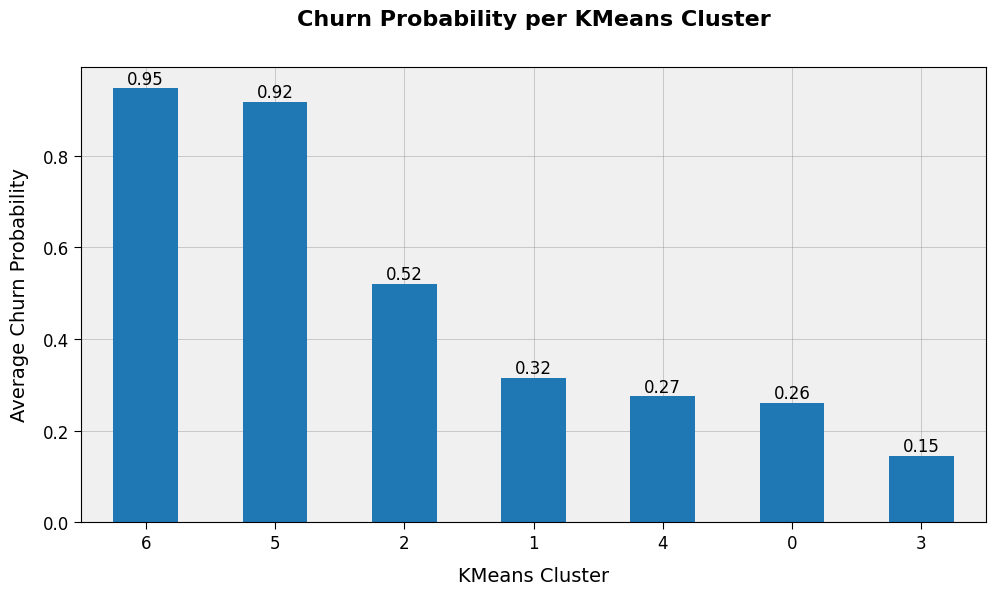

In [228]:
kmeans_churn_rate = df_past.groupby('KMeans_Cluster')['Churn_Probability'].mean()
kmeans_churn_rate = kmeans_churn_rate.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
kmeans_churn_rate.plot(kind="bar")
plt.title('Churn Probability per KMeans Cluster', fontsize=16)
plt.xlabel('KMeans Cluster', fontsize=14)
plt.ylabel('Average Churn Probability', fontsize=14)


# Annotate values on the bars
for i, value in enumerate(kmeans_churn_rate.values):
    plt.text(i, value + 0.01, f'{value:.2f}', ha='center', fontsize=12)

plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [206]:
df_past["Exited"] = df_onehot["Exited"]

<Figure size 1000x600 with 0 Axes>

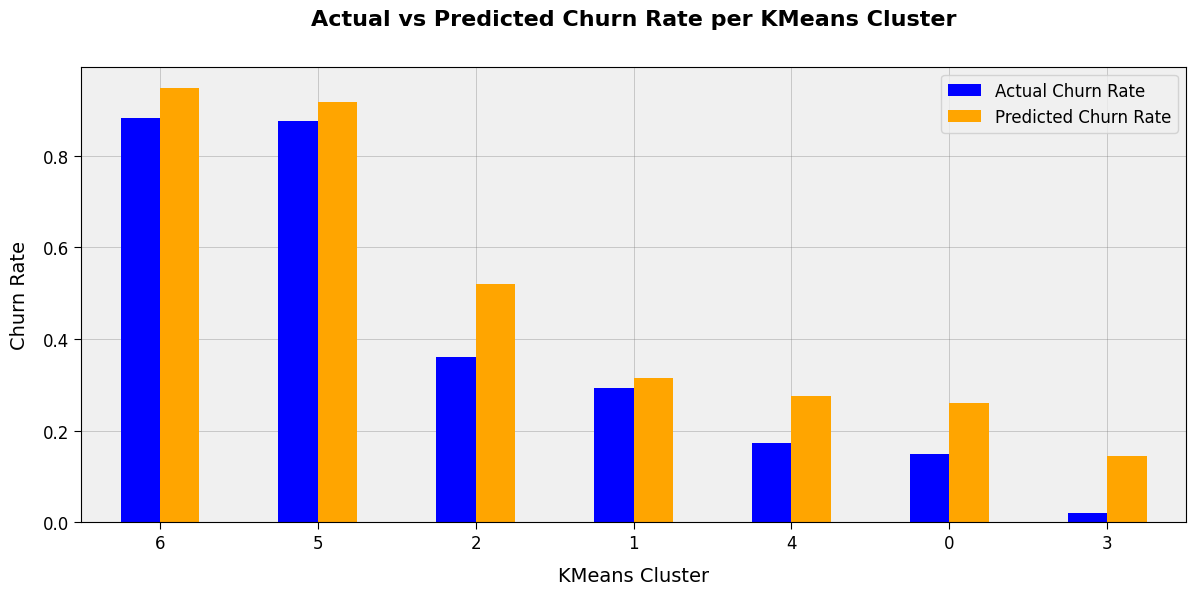

In [223]:
actual_churn_rate = df_past.groupby('KMeans_Cluster')['Exited'].mean()
predicted_churn_rate = df_past.groupby('KMeans_Cluster')['Churn_Probability'].mean()

comparison = pd.DataFrame({
    'Actual Churn Rate': actual_churn_rate,
    'Predicted Churn Rate': predicted_churn_rate
})

comparison = comparison.sort_values(by='Predicted Churn Rate', ascending=False)

plt.figure(figsize=(10, 6))
comparison.plot(kind='bar', figsize=(12, 6), color=['blue', 'orange'])

plt.title('Actual vs Predicted Churn Rate per KMeans Cluster', fontsize=16)
plt.xlabel('KMeans Cluster', fontsize=14)
plt.ylabel('Churn Rate', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [201]:
gmm_cluster_means = df_past.groupby("GMM_Cluster").mean()
gmm_cluster_means

CreditScore        Age    Tenure        Balance  HasCrCard  \
GMM_Cluster                                                               
0             657.106484  37.818391  5.042436   39829.059615   0.742655   
1             657.413843  36.882614  5.027940   15086.545296   0.759786   
2             656.890984  39.567589  4.979137  121251.328493   0.750569   
3             657.068057  36.319360  5.058484   37165.565693   0.768460   
4             652.932627  40.603889  4.968021   58961.355357   0.744080   
5             653.745263  44.461053  5.086316   83263.135642   0.684211   
6             654.621631  43.549067  4.948514   64438.112554   0.739461   

             IsActiveMember  EstimatedSalary  Geography_Germany  \
GMM_Cluster                                                       
0                  0.514746    111547.926927           0.000000   
1                  0.518891    112284.955707           0.000000   
2                  0.468121    113849.179813           1.000000   
3                  0.547776    112167.423955           0.000000   
4                  0.417070    113316.678178           0.000000   
5                  0.341053    114157.335011           0.431579   
6                  0.320318    113181.530318           0.343124   

             Geography_Spain  Gender_Male  NumOfProducts_2  NumOfProducts_3  \
GMM_Cluster                                                                   
0                   1.000000     0.574094         0.552060              0.0   
1                   0.000000     0.045267         1.000000              0.0   
2                   0.000000     0.529155         0.383112              0.0   
3                   0.000000     1.000000         0.627488              0.0   
4                   0.000000     0.217761         0.000000              0.0   
5                   0.155789     0.418947         0.000000              0.0   
6                   0.208362     0.449551         0.000000              1.0   

             NumOfProducts_4  Churn_Probability  KMeans_Cluster  
GMM_Cluster                                                      
0                        0.0           0.270788        0.852882  
1                        0.0           0.125911        1.146777  
2                        0.0           0.519098        2.000449  
3                        0.0           0.161609        3.254849  
4                        0.0           0.494070        2.417070  
5                        1.0           0.916737        5.000000  
6                        0.0           0.946524        6.000000

In [230]:
kmeans_cluster_means

CreditScore        Age    Tenure        Balance  HasCrCard  \
KMeans_Cluster                                                               
0                657.141421  37.711983  5.062484   15375.202894   0.747309   
1                654.735358  38.812284  4.993536    7421.211228   0.760515   
2                656.879418  39.575086  4.979463  121443.992873   0.750682   
3                656.354752  36.137523  5.079706    7680.525217   0.769671   
4                657.526238  37.929052  4.991478  125797.204870   0.740661   
5                653.745263  44.461053  5.086316   83263.135642   0.684211   
6                654.621631  43.549067  4.948514   64438.112554   0.739461   

                IsActiveMember  EstimatedSalary  Geography_Germany  \
KMeans_Cluster                                                       
0                     0.513931    111041.486720           0.000000   
1                     0.465892    112567.814171           0.000577   
2                     0.468116    113878.605740           1.000000   
3                     0.544537    112002.788849           0.000940   
4                     0.513263    113145.214758           0.000000   
5                     0.341053    114157.335011           0.431579   
6                     0.320318    113181.530318           0.343124   

                Geography_Spain  Gender_Male  NumOfProducts_2  \
KMeans_Cluster                                                  
0                      1.000000     0.567653         0.700919   
1                      0.000000     0.100322         0.630697   
2                      0.000000     0.528976         0.382132   
3                      0.000000     1.000000         0.826521   
4                      0.242744     0.597360         0.040302   
5                      0.155789     0.418947         0.000000   
6                      0.208362     0.449551         0.000000   

                NumOfProducts_3  NumOfProducts_4  Churn_Probability  \
KMeans_Cluster                                                        
0                           0.0              0.0           0.260841   
1                           0.0              0.0           0.315208   
2                           0.0              0.0           0.519643   
3                           0.0              0.0           0.145429   
4                           0.0              0.0           0.274889   
5                           0.0              1.0           0.916737   
6                           1.0              0.0           0.946524   

                GMM_Cluster  
KMeans_Cluster               
0                  0.000000  
1                  2.108363  
2                  2.000000  
3                  2.968963  
4                  2.576088  
5                  5.000000  
6                  6.000000

##### <code style="background:orange;color:black"> **Insights** </code>

**Cluster 1 – "Established Spanish Loyalists"**
- CreditScore: Average (~657)
- Age: Relatively younger (37.7 years)
- Balance: Very low (~€15,375)
- HasCrCard: High percentage (~74.7%)
- IsActiveMember: Moderate (~51.4%)
- Churn Probability: Low (~26%)
- Geography: Primarily Spain (100%)
- Gender: Balanced (~56% male)
- Characteristics: Younger customers who are relatively engaged but have low balances. 
- Interpretation: This group represents a stable customer base with average churn. They might be considered a "baseline" for comparison with other clusters. They have high CreditScores and substantial Balances, indicating financial stability. Their long Tenure signifies strong loyalty. They likely have 2 products. Low Churn_Probability confirms their commitment. Efforts to maintain engagement and financial activity could sustain retention. Focus on relationship management and personalized service for this group. Offer exclusive benefits and loyalty programs to further solidify their bond with the bank.


**Cluster 1 – "Females at Risk"**
- CreditScore: Average (~654.7)
- Age: Slightly older (38.8 years)
- Balance: Very low (~€7,421)
- HasCrCard: High percentage (~76.1%)
- IsActiveMember: Relatively low (~46.6%)
- Churn Probability: Moderate (~31.5%)
- Geography: Mostly not in Germany or Spain
- Gender: Predominantly female (~10% male)
- Characteristics: Low-Balance, Inactive Female Customers with a moderate churn risk.
- Interpretation: This cluster consists of moslty female customers with lower CreditScores, Balances, and EstimatedSalaries. Their high Churn_Probability makes them a priority for retention efforts. This cluster represents a high risk of churn and warrants attention. Implement targeted retention programs for younger customers. Offer incentives for increasing engagement and financial ties. Offer incentives to increase engagement, especially with high-value products


**Cluster 2 – "Lowest-Churn Male Mavericks"**
- CreditScore: Average (~656.8)
- Age: Slightly older (39.6 years)
- Balance: Very high (~121,443)
- HasCrCard: High (~75%)
- IsActiveMember: Low (~46.8%)
- Churn Probability: High (~52%)
- Geography: Exclusively Germany
- Gender: Balanced (~52.8% male)
- Characteristics: High-Balance German Customers with High Churn Risk
- Interpretation: Surprisingly, this group has the lowest churn rate despite low balances. Customers in this cluster are more likely to stay due to higher engagement and product usage. This suggests that other factors, such as gender-specific targeting or product satisfaction, might be contributing to their loyalty.


**Cluster 3 – "Moderate-Churn Inactive Isolates"**
- Churn Rate: 20.81%
- Credit Score: 656
- Age: ~38 years
- Tenure: 5 years
- Balance: Low (~7,450)
- Geography: Minimal Germany representation
- Gender: 100% Female
- Number of Products: 2
- Active Membership: 49%
- Credit Card Holders: 76%
- Churn Likelihood: Medium
- Characteristics: Low balances, almost exclusively female, less active.
- Interpretation: This cluster consists entirely of female customers with low balances and average engagement. This group has a moderate churn rate, likely influenced by both low balances and inactivity. They might benefit from targeted engagement efforts to increase activity and product usage.


**Cluster 4 – "Low-Churn High-Balance Minimalists"**
- Churn Rate: 17.36%
- Credit Score: 658
- Age: ~38 years
- Tenure: ~5 years
- Balance: Very High (~124,142)
- Geography: Mostly Spain
- Gender: 60% Male
- Number of Products: Primarily 1
- Active Membership: 51%
- Credit Card Holders: 75%
- Churn Likelihood: Low
- Characteristics: High balances, primarily use one product.
- Interpretation: Customers here maintain high balances with minimal product usage. This group has a relatively low churn rate, likely due to high balances. However, their single product usage presents an opportunity for cross-selling or upselling to increase engagement and potentially reduce churn further. Offering product bundles may boost engagement.

**Cluster 5 – "Older, Moderate Balance, Less Engaged"**
- Churn Rate: 88.25%
- Credit Score: 655
- Age: ~44 years
- Tenure: 5 years
- Balance: ~64,438
- Geography: Mixed (Germany and Spain)
- Gender: 45% Male
- Number of Products: Primarily 1
- Active Membership: 32% (lowest)
- Credit Card Holders: 74%
- Churn Likelihood: High
- Characteristics: Older, uses multiple products, least active, below-average credit score.
- Interpretation: This group has the highest churn rate by far. Their older age, lower credit score, and lower activity levels might be contributing factors. They might require tailored retention strategies or product offerings to address their specific needs and concerns.


## <code style="background:white;color:black"> **7. CLUSTER ANALYSIS** </code>

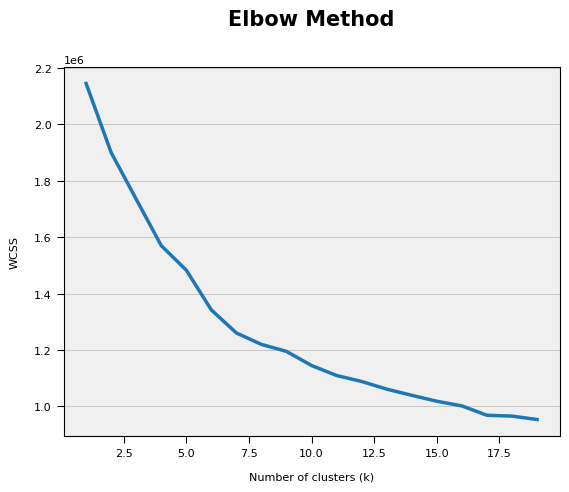

In [182]:
# Elbow method to indentify the optimal number of clusters
X=df_onehot.drop("Exited", axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Calculate WCSS for different values of k
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

#Plot the Elbow Method graph
plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()


In [183]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X_scaled)
X['Cluster'] = kmeans.labels_



In [184]:
cluster_means = X.groupby('Cluster').mean()
print(cluster_means)

         CreditScore        Age    Tenure        Balance  HasCrCard  \
Cluster                                                               
0         657.061776  37.823094  5.042562   39580.570890   0.742883   
1         656.864385  39.605070  4.980580  121394.501273   0.750216   
2         655.434469  36.923252  5.064251    5642.245755   0.767196   
3         655.732318  38.024267  5.006288    7449.498636   0.762873   
4         657.718080  37.936912  4.998085  124141.719245   0.745050   
5         654.621631  43.549067  4.948514   64438.112554   0.739461   

         IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
Cluster                                                                        
0              0.514403    111535.182018           0.000000         1.000000   
1              0.466833    113899.803699           1.000000         0.000000   
2              0.520102    112120.973433           0.000615         0.000000   
3              0.490807    1124

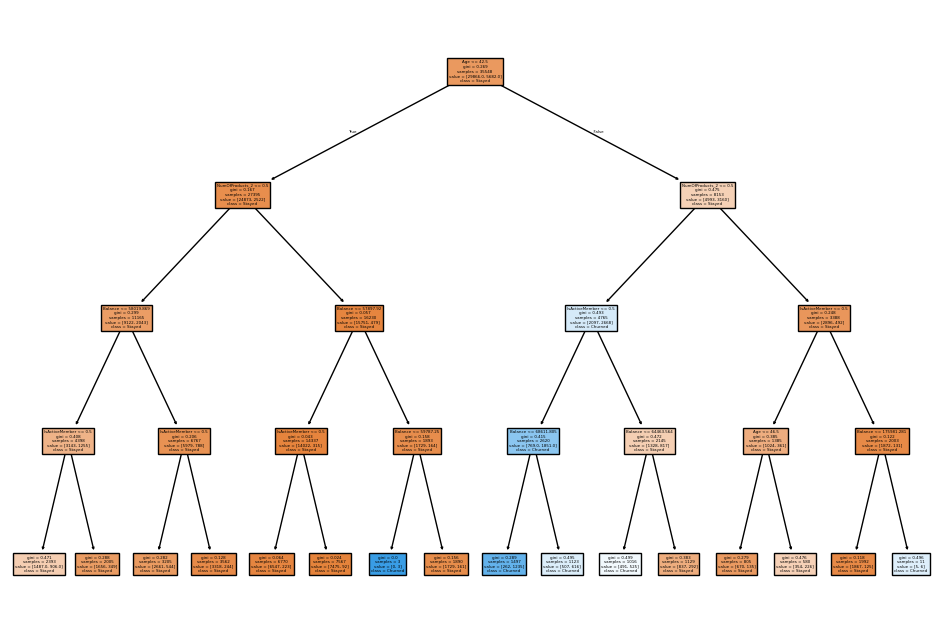

|--- Age <= 42.50
|   |--- NumOfProducts_2 <= 0.50
|   |   |--- Balance <= 58019.87
|   |   |   |--- IsActiveMember <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- IsActiveMember >  0.50
|   |   |   |   |--- class: 0
|   |   |--- Balance >  58019.87
|   |   |   |--- IsActiveMember <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- IsActiveMember >  0.50
|   |   |   |   |--- class: 0
|   |--- NumOfProducts_2 >  0.50
|   |   |--- Balance <= 57897.92
|   |   |   |--- IsActiveMember <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- IsActiveMember >  0.50
|   |   |   |   |--- class: 0
|   |   |--- Balance >  57897.92
|   |   |   |--- Balance <= 59787.25
|   |   |   |   |--- class: 1
|   |   |   |--- Balance >  59787.25
|   |   |   |   |--- class: 0
|--- Age >  42.50
|   |--- NumOfProducts_2 <= 0.50
|   |   |--- IsActiveMember <= 0.50
|   |   |   |--- Balance <= 68611.80
|   |   |   |   |--- class: 1
|   |   |   |--- Balance >  68611.80
|   |   |   |   |--- class: 1
|   |   |

In [185]:
X = df_onehot.copy()
X['Cluster'] = kmeans.labels_

# Fit a decision tree model for one cluster (e.g., Cluster 1)
cluster_1_data = X[X['Cluster'] == 0]
X_cluster_1 = cluster_1_data.drop(columns=['Exited', 'Cluster'])
y_cluster_1 = cluster_1_data['Exited']

# Fit a decision tree model
tree_model = DecisionTreeClassifier(max_depth=4)
tree_model.fit(X_cluster_1, y_cluster_1)

# Visualize the tree
plt.figure(figsize=(12, 8))
plot_tree(tree_model, feature_names=X_cluster_1.columns, class_names=['Stayed', 'Churned'], filled=True)
plt.show()

# Extract the rules
rules_text = export_text(tree_model, feature_names=list(X_cluster_1.columns))
print(rules_text)


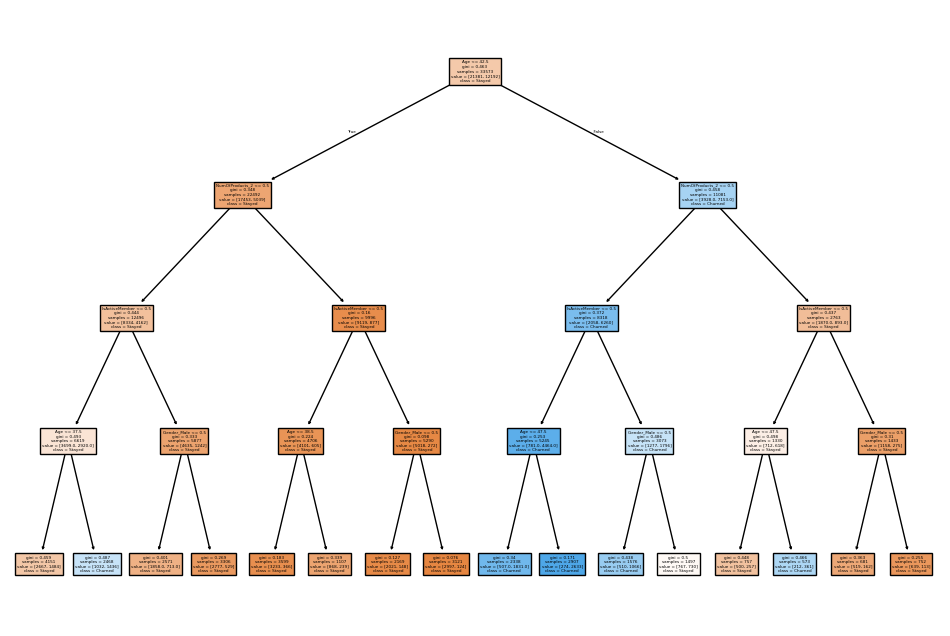

|--- Age <= 42.50
|   |--- NumOfProducts_2 <= 0.50
|   |   |--- IsActiveMember <= 0.50
|   |   |   |--- Age <= 37.50
|   |   |   |   |--- class: 0
|   |   |   |--- Age >  37.50
|   |   |   |   |--- class: 1
|   |   |--- IsActiveMember >  0.50
|   |   |   |--- Gender_Male <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- Gender_Male >  0.50
|   |   |   |   |--- class: 0
|   |--- NumOfProducts_2 >  0.50
|   |   |--- IsActiveMember <= 0.50
|   |   |   |--- Age <= 38.50
|   |   |   |   |--- class: 0
|   |   |   |--- Age >  38.50
|   |   |   |   |--- class: 0
|   |   |--- IsActiveMember >  0.50
|   |   |   |--- Gender_Male <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- Gender_Male >  0.50
|   |   |   |   |--- class: 0
|--- Age >  42.50
|   |--- NumOfProducts_2 <= 0.50
|   |   |--- IsActiveMember <= 0.50
|   |   |   |--- Age <= 47.50
|   |   |   |   |--- class: 1
|   |   |   |--- Age >  47.50
|   |   |   |   |--- class: 1
|   |   |--- IsActiveMember >  0.50
|   |   |   |--- Gend

In [186]:
# Fit a decision tree model for one cluster (e.g., Cluster 1)
cluster_1_data = X[X['Cluster'] == 1]
X_cluster_1 = cluster_1_data.drop(columns=['Exited', 'Cluster'])
y_cluster_1 = cluster_1_data['Exited']

# Fit a decision tree model
tree_model = DecisionTreeClassifier(max_depth=4)
tree_model.fit(X_cluster_1, y_cluster_1)

# Visualize the tree
plt.figure(figsize=(12, 8))
plot_tree(tree_model, feature_names=X_cluster_1.columns, class_names=['Stayed', 'Churned'], filled=True)
plt.show()

# Extract the rules
rules_text = export_text(tree_model, feature_names=list(X_cluster_1.columns))
print(rules_text)


Analysis for Cluster 2:

Numerical Features:
        CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  39050.000000  39050.000000  39050.000000   39050.000000   39050.000000   
mean     655.434469     36.923252      5.064251    5642.245755       1.759974   
std       78.251707      8.241587      2.775545   23980.892794       0.427104   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      597.000000     32.000000      3.000000       0.000000       2.000000   
50%      660.000000     36.000000      5.000000       0.000000       2.000000   
75%      709.000000     40.000000      7.000000       0.000000       2.000000   
max      850.000000     92.000000     10.000000  139561.460000       2.000000   

       EstimatedSalary  
count     39050.000000  
mean     112120.973433  
std       50096.270833  
min          90.070000  
25%       74850.970000  
50%      117832.835000  
75%      153330.460000  
max      199992.480000  

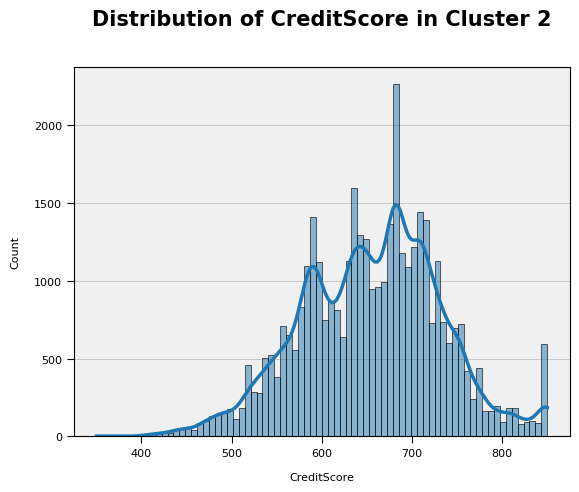

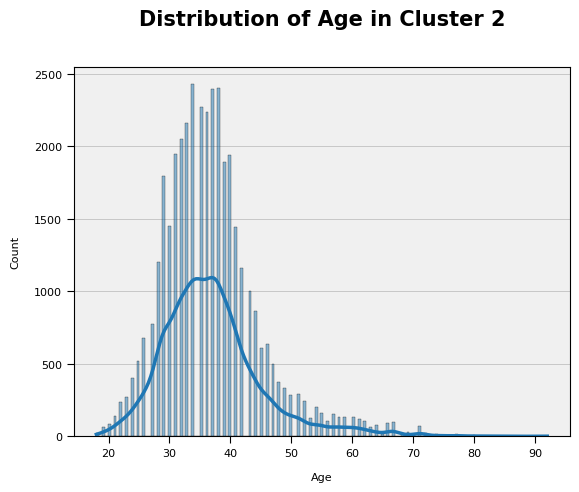

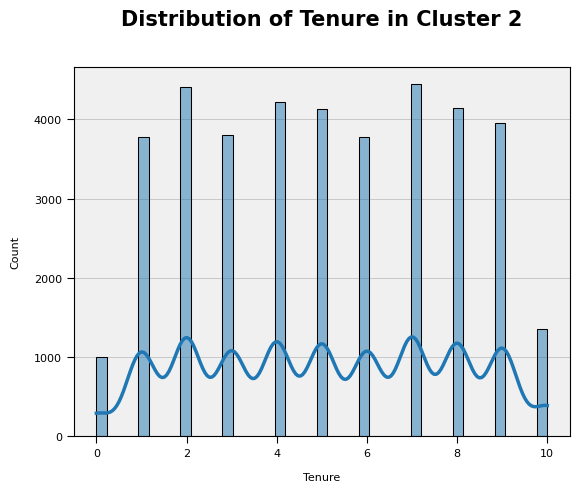

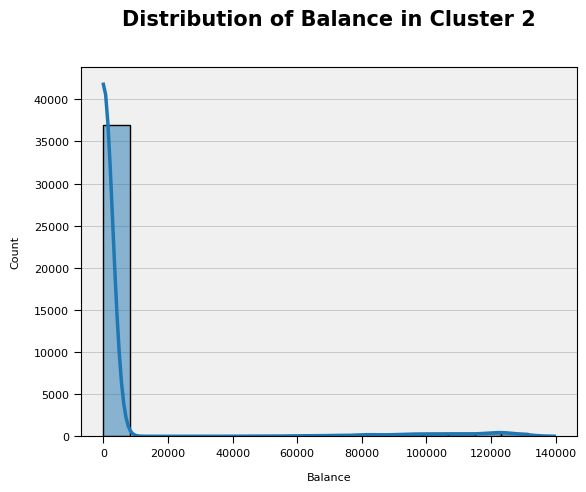

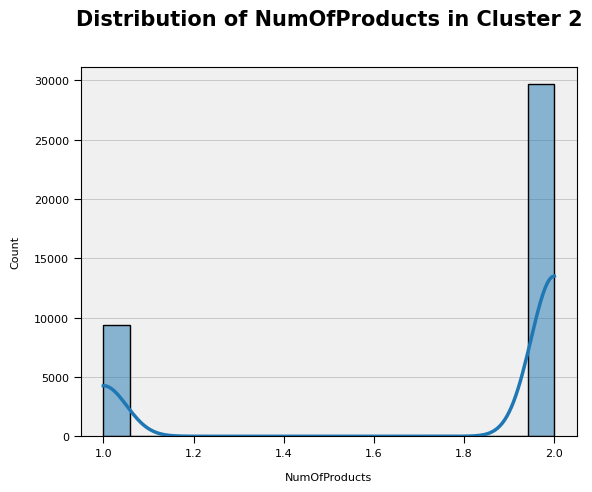

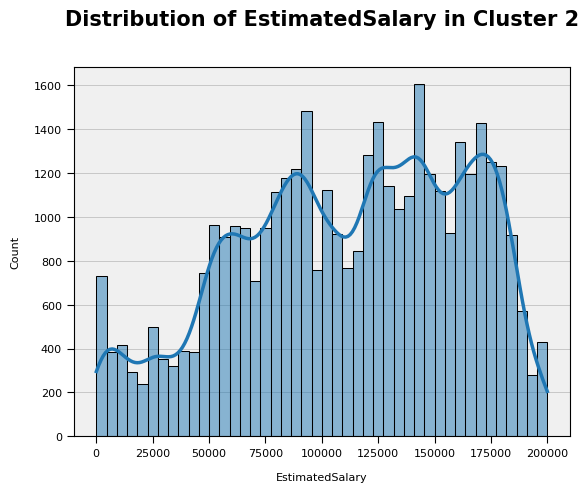


Categorical Features:

Geography:
Geography
France     0.999385
Germany    0.000615
Name: proportion, dtype: float64


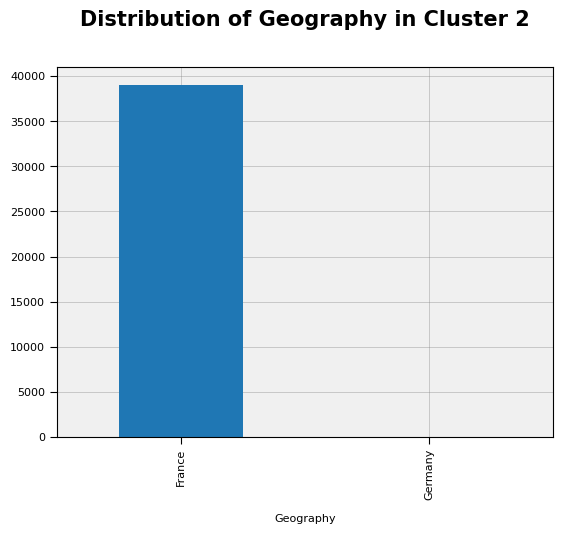


Gender:
Gender
Male    1.0
Name: proportion, dtype: float64


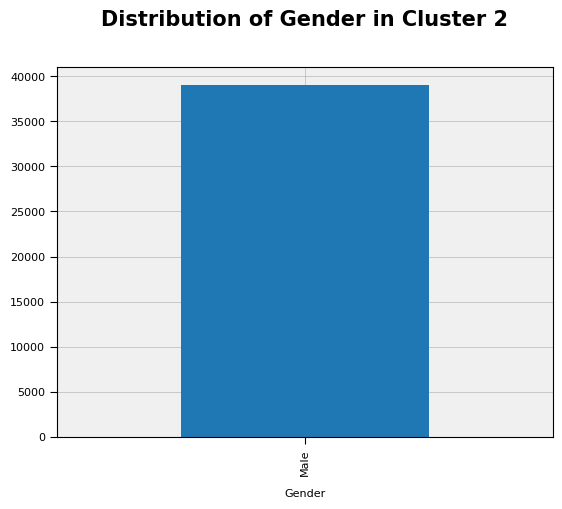


HasCrCard:
HasCrCard
1.0    0.767196
0.0    0.232804
Name: proportion, dtype: float64


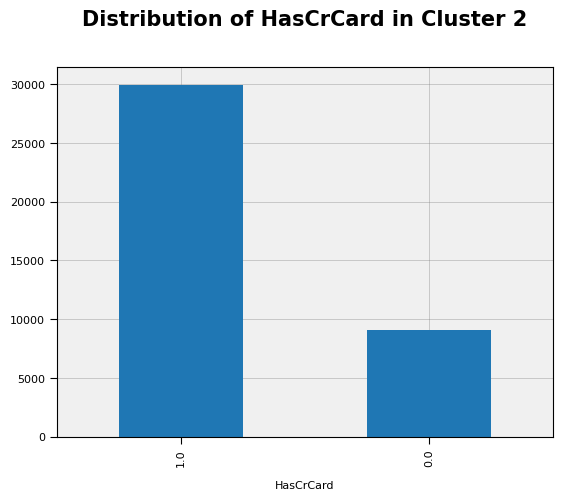


IsActiveMember:
IsActiveMember
1.0    0.520102
0.0    0.479898
Name: proportion, dtype: float64


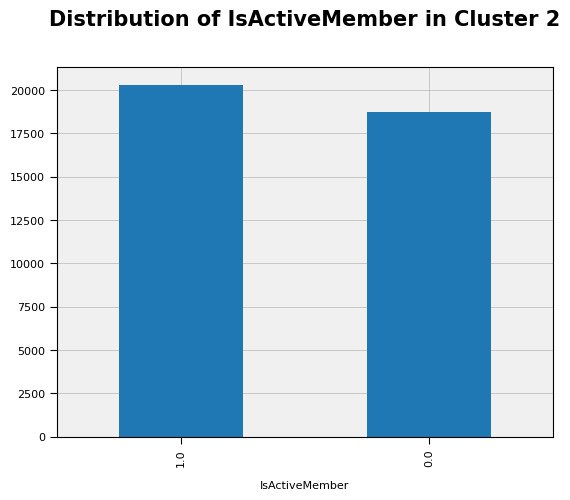

-----------------------------------

Analysis for Cluster 4:

Numerical Features:
        CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  24546.000000  24546.000000  24546.000000   24546.000000   24546.000000   
mean     657.718080     37.936912      4.998085  124141.719245       1.084861   
std       81.325661      8.917009      2.819532   27347.238299       0.334128   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      598.000000     32.000000      3.000000  105604.700000       1.000000   
50%      661.000000     37.000000      5.000000  124975.305000       1.000000   
75%      711.000000     42.000000      7.000000  141787.802500       1.000000   
max      850.000000     92.000000     10.000000  238387.560000       4.000000   

       EstimatedSalary  
count     24546.000000  
mean     113051.659908  
std       49582.933077  
min          11.580000  
25%       74838.640000  
50%      117832.885000  
75%      1548

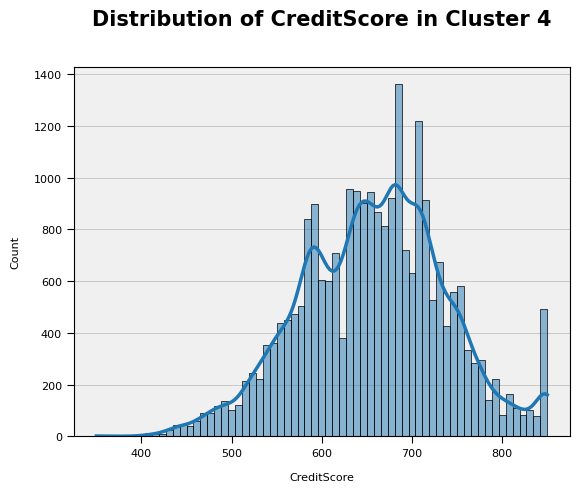

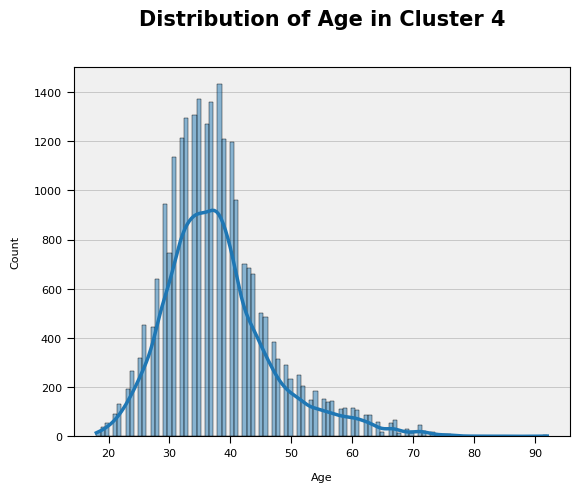

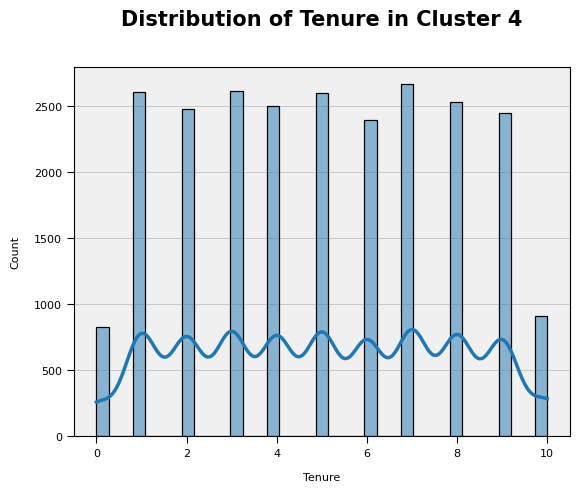

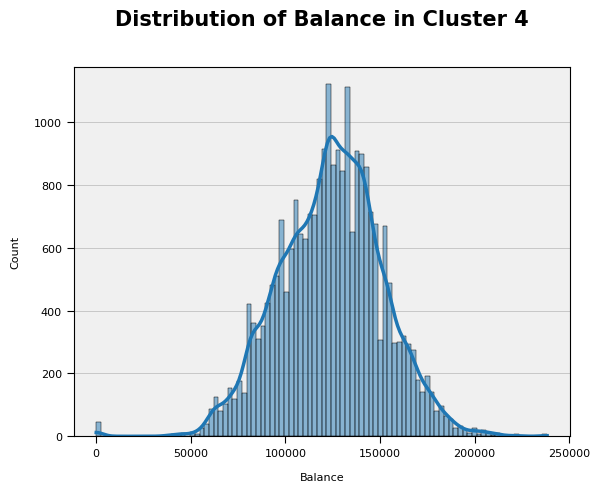

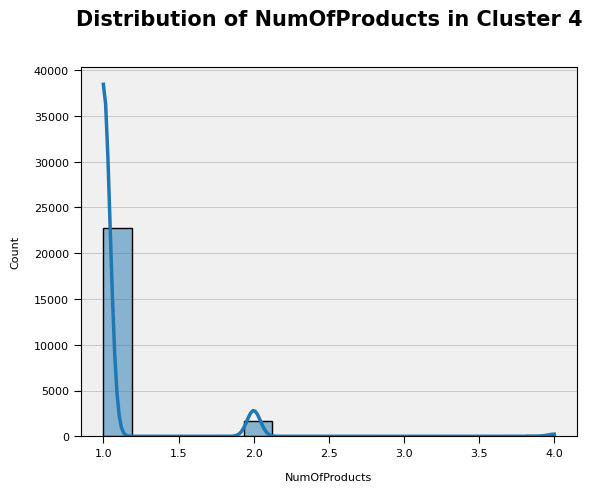

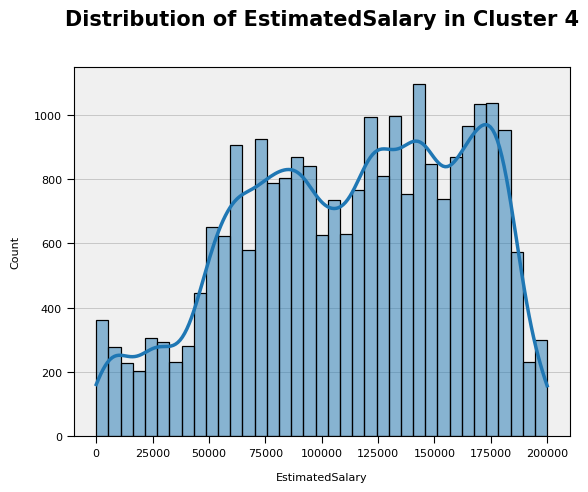


Categorical Features:

Geography:
Geography
France    0.997474
Spain     0.002526
Name: proportion, dtype: float64


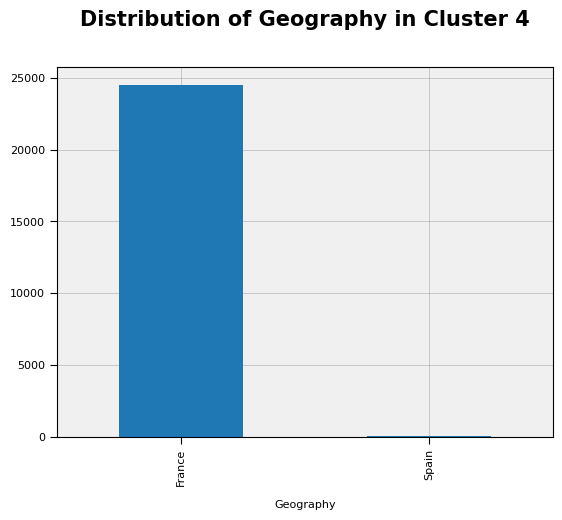


Gender:
Gender
Male      0.597409
Female    0.402591
Name: proportion, dtype: float64


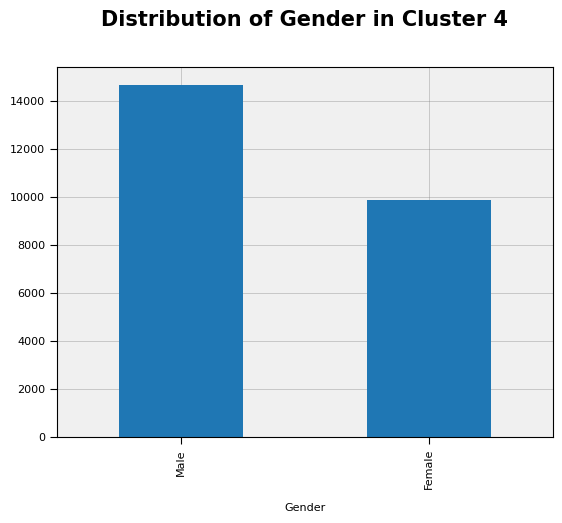


HasCrCard:
HasCrCard
1.0    0.74505
0.0    0.25495
Name: proportion, dtype: float64


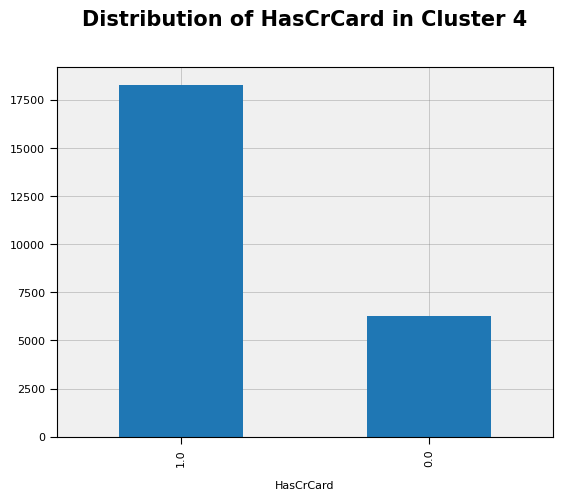


IsActiveMember:
IsActiveMember
1.0    0.509737
0.0    0.490263
Name: proportion, dtype: float64


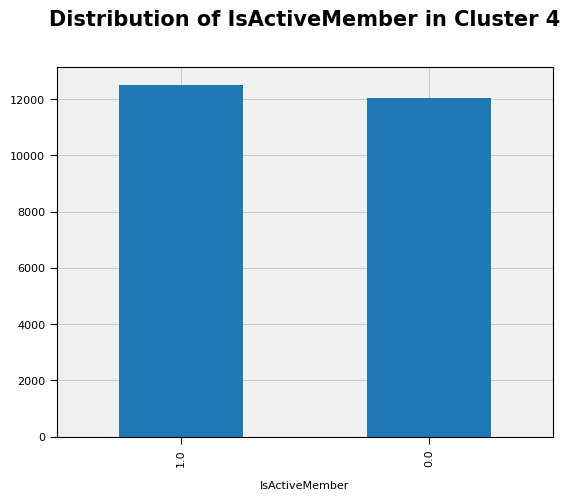

-----------------------------------

Analysis for Cluster 0:

Numerical Features:
        CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  35548.000000  35548.000000  35548.000000   35548.000000   35548.000000   
mean     657.061776     37.823094      5.042562   39580.570890       1.557443   
std       80.903749      8.864497      2.805631   58744.883343       0.507787   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      597.750000     32.000000      3.000000       0.000000       1.000000   
50%      660.000000     37.000000      5.000000       0.000000       2.000000   
75%      711.000000     42.000000      7.000000  101198.010000       2.000000   
max      850.000000     92.000000     10.000000  209767.310000       4.000000   

       EstimatedSalary  
count     35548.000000  
mean     111535.182018  
std       50805.380536  
min          11.580000  
25%       72993.715000  
50%      116848.685000  
75%      1535

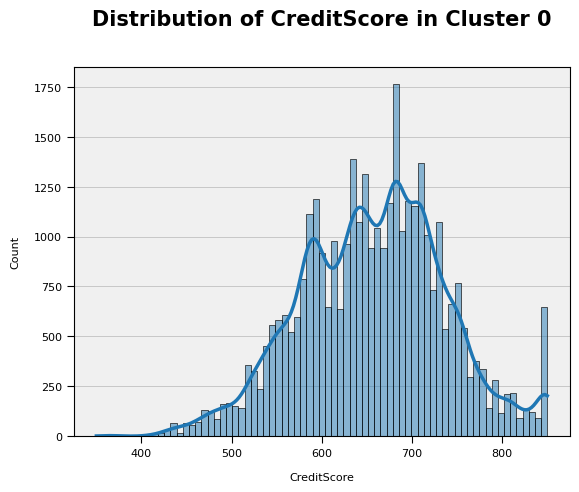

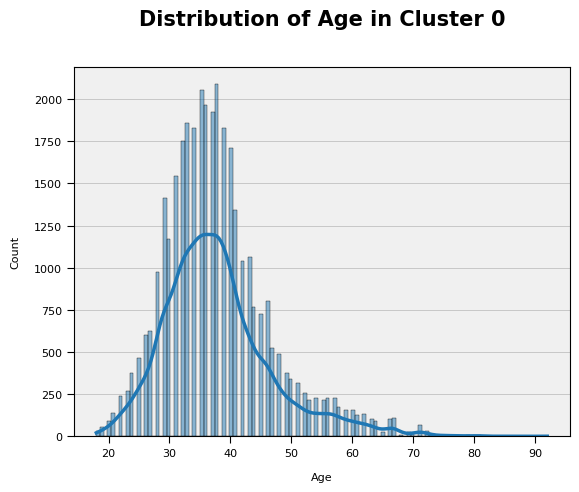

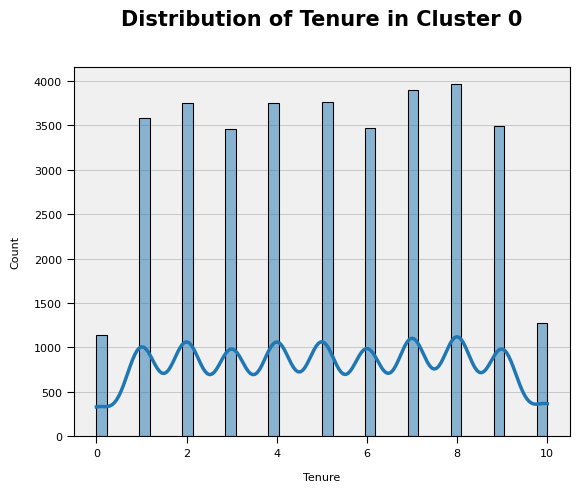

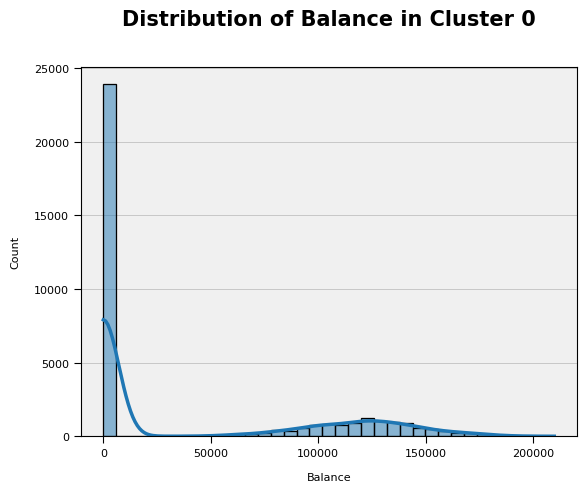

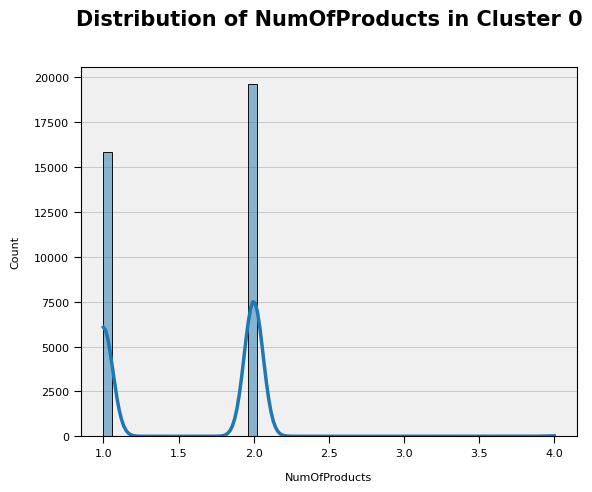

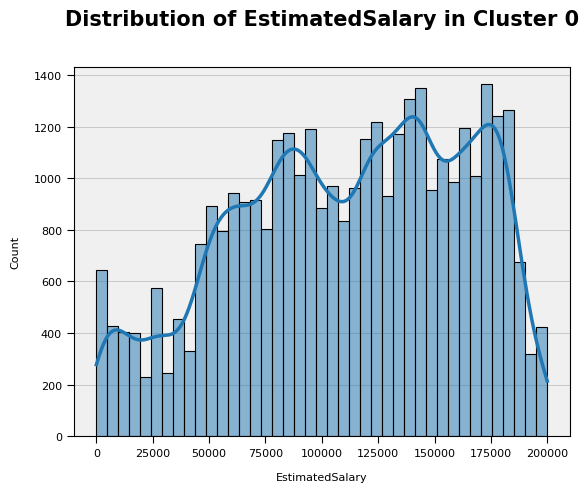


Categorical Features:

Geography:
Geography
Spain    1.0
Name: proportion, dtype: float64


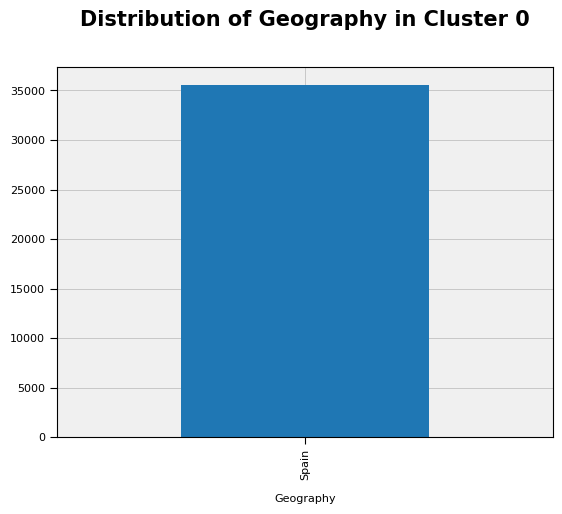


Gender:
Gender
Male      0.573844
Female    0.426156
Name: proportion, dtype: float64


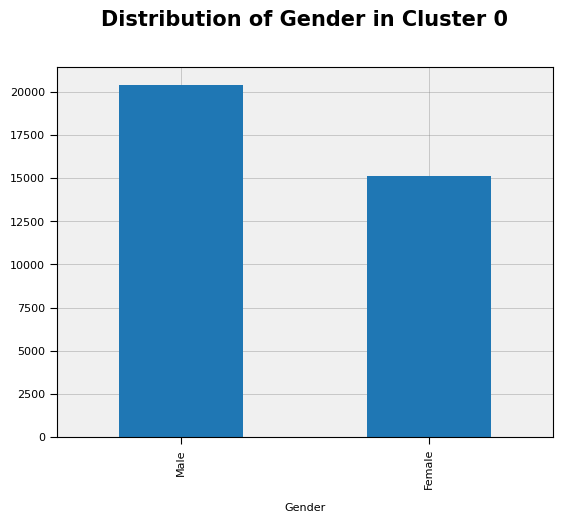


HasCrCard:
HasCrCard
1.0    0.742883
0.0    0.257117
Name: proportion, dtype: float64


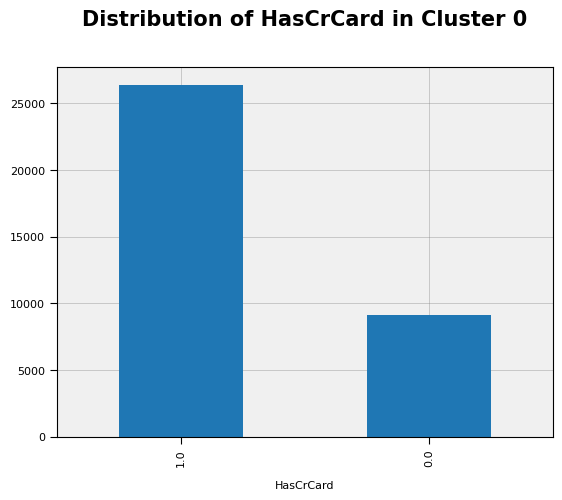


IsActiveMember:
IsActiveMember
1.0    0.514403
0.0    0.485597
Name: proportion, dtype: float64


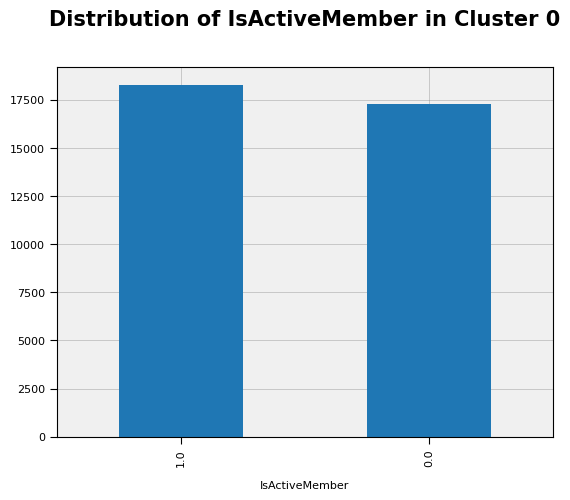

-----------------------------------

Analysis for Cluster 1:

Numerical Features:
        CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  33573.000000  33573.000000  33573.000000   33573.000000   33573.000000   
mean     656.864385     39.605070      4.980580  121394.501273       1.398356   
std       80.861266      9.119088      2.846574   22863.550586       0.525655   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      597.000000     33.000000      2.000000  106967.490000       1.000000   
50%      657.000000     38.000000      5.000000  122084.630000       1.000000   
75%      712.000000     45.000000      7.000000  135869.930000       2.000000   
max      850.000000     83.000000     10.000000  221532.800000       4.000000   

       EstimatedSalary  
count     33573.000000  
mean     113899.803699  
std       50054.227573  
min          11.580000  
25%       74965.900000  
50%      119644.590000  
75%      1579

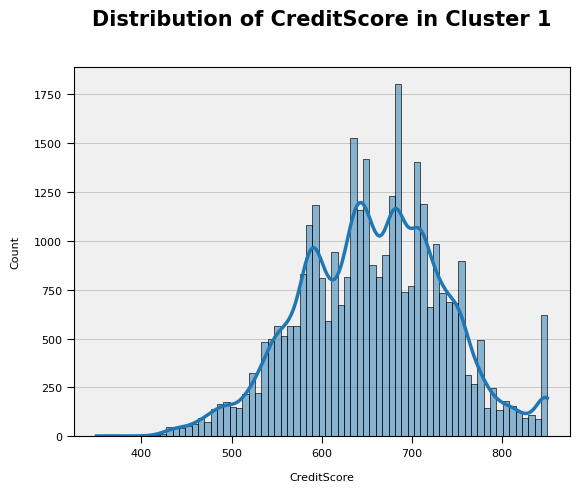

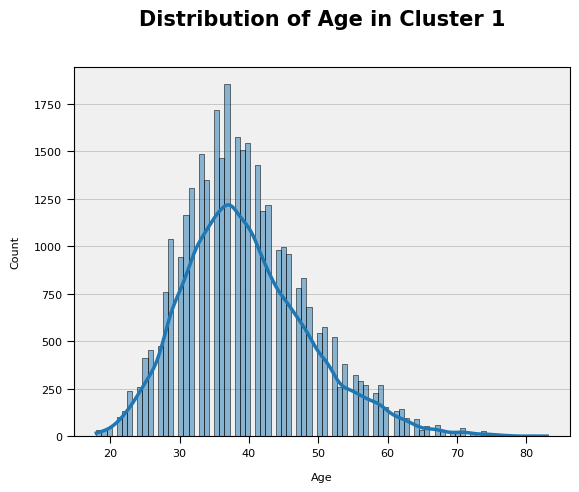

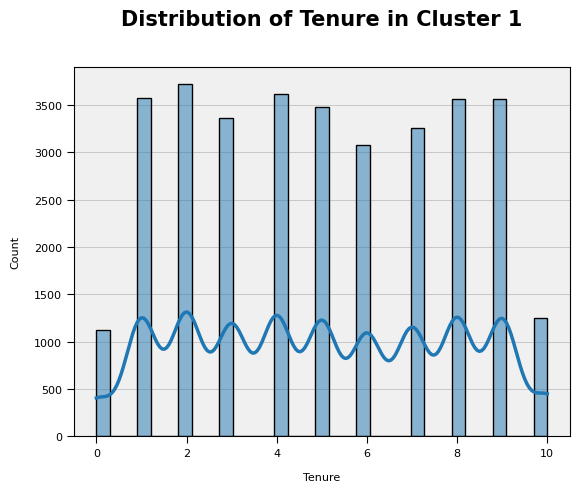

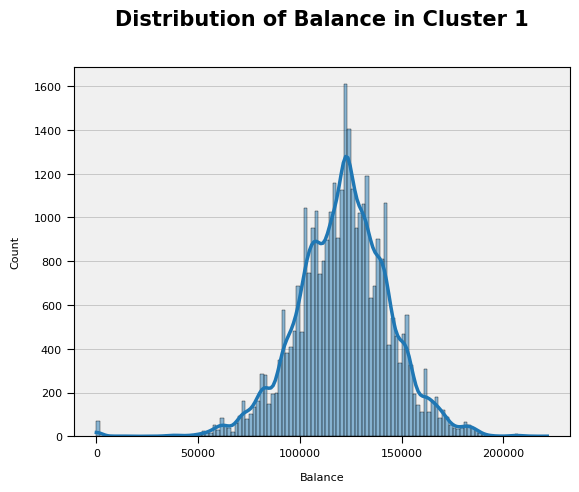

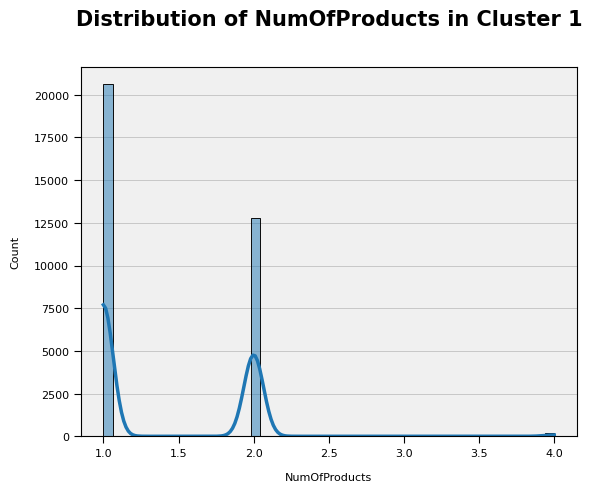

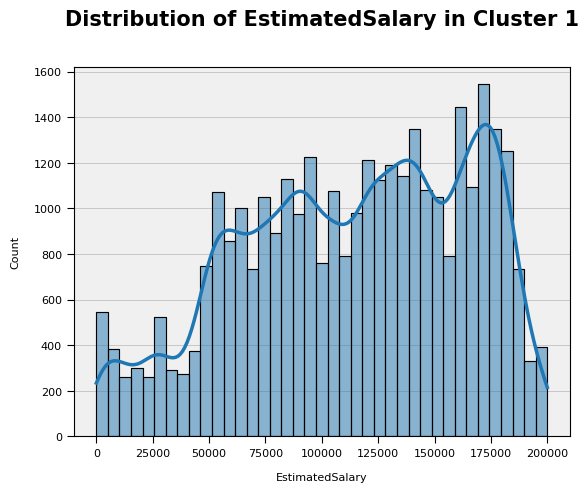


Categorical Features:

Geography:
Geography
Germany    1.0
Name: proportion, dtype: float64


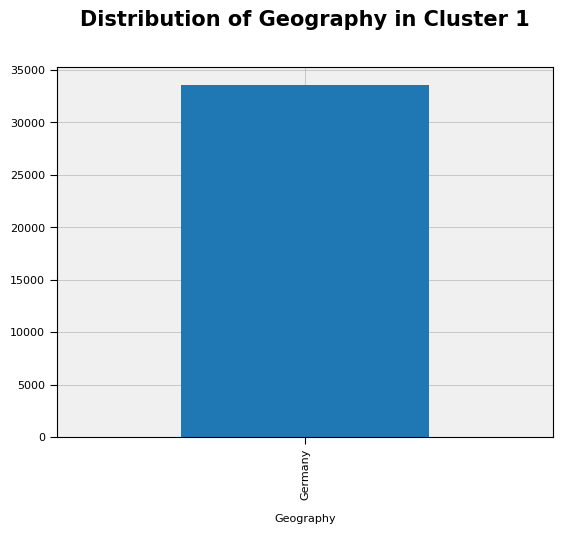


Gender:
Gender
Male      0.528282
Female    0.471718
Name: proportion, dtype: float64


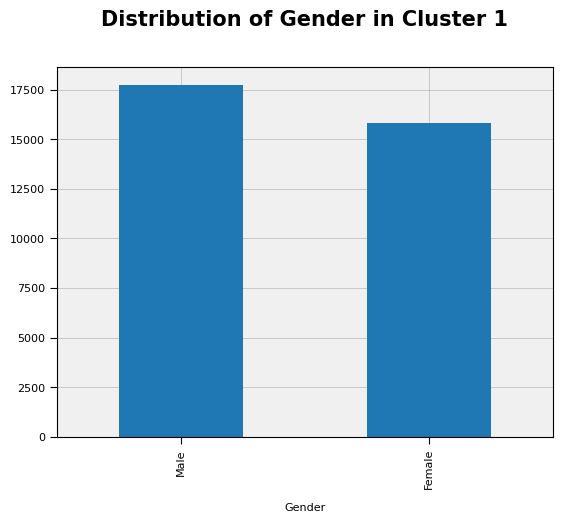


HasCrCard:
HasCrCard
1.0    0.750216
0.0    0.249784
Name: proportion, dtype: float64


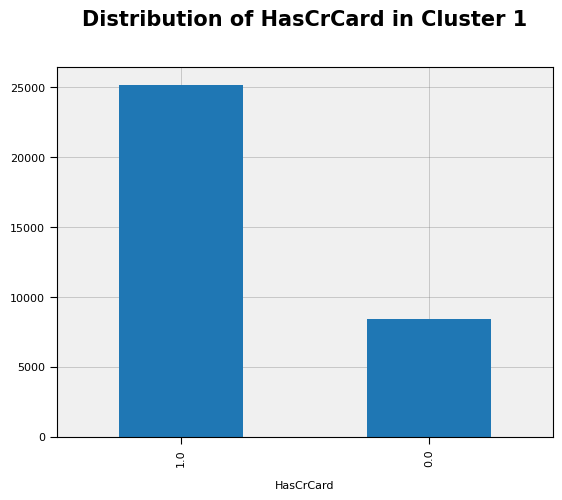


IsActiveMember:
IsActiveMember
0.0    0.533167
1.0    0.466833
Name: proportion, dtype: float64


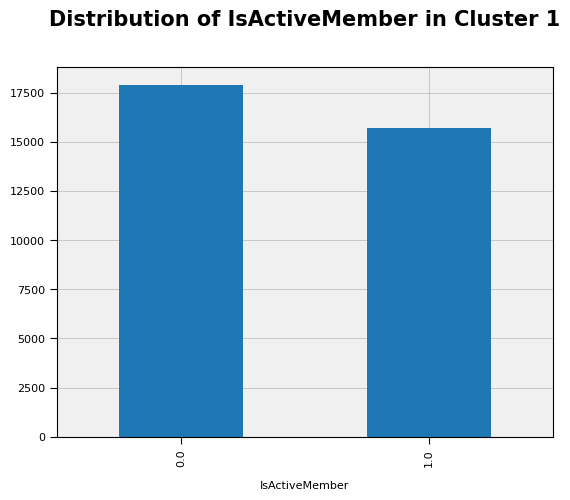

-----------------------------------

Analysis for Cluster 3:

Numerical Features:
        CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  29423.000000  29423.000000  29423.000000   29423.000000   29423.000000   
mean     655.732318     38.024267      5.006288    7449.498636       1.705774   
std       79.161150      8.863309      2.791766   27930.158384       0.470021   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      598.000000     32.000000      3.000000       0.000000       1.000000   
50%      660.000000     37.000000      5.000000       0.000000       2.000000   
75%      710.000000     42.000000      7.000000       0.000000       2.000000   
max      850.000000     92.000000     10.000000  146408.680000       4.000000   

       EstimatedSalary  
count     29423.000000  
mean     112463.893205  
std       50831.477532  
min          91.750000  
25%       73979.855000  
50%      117948.200000  
75%      1558

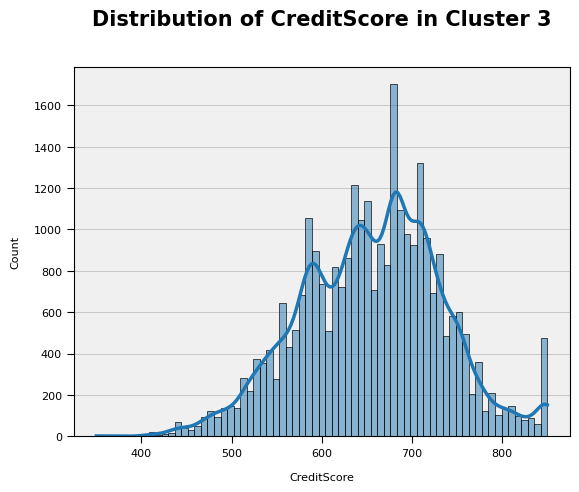

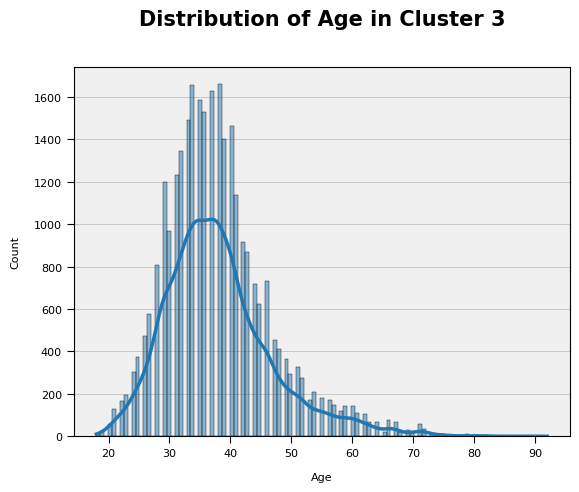

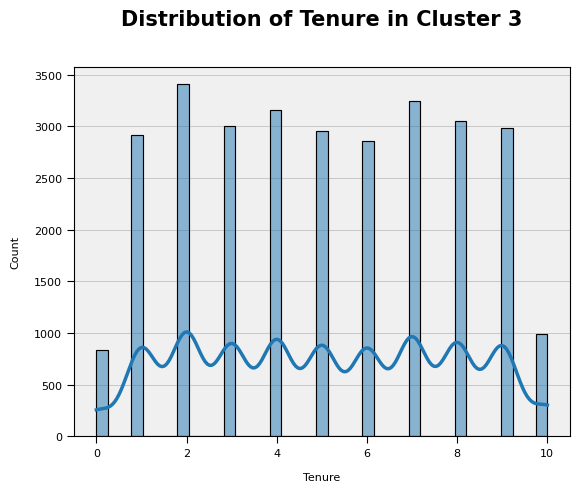

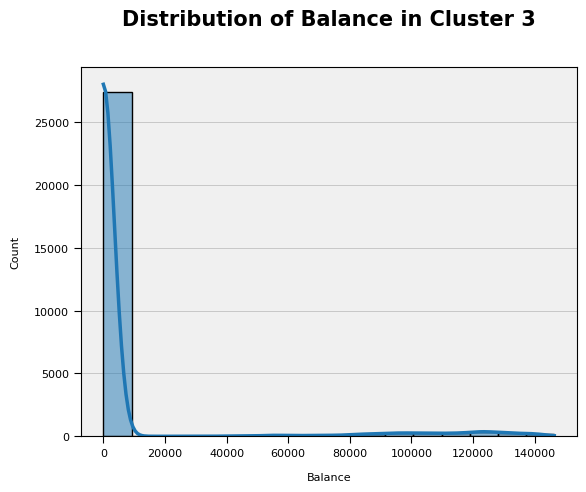

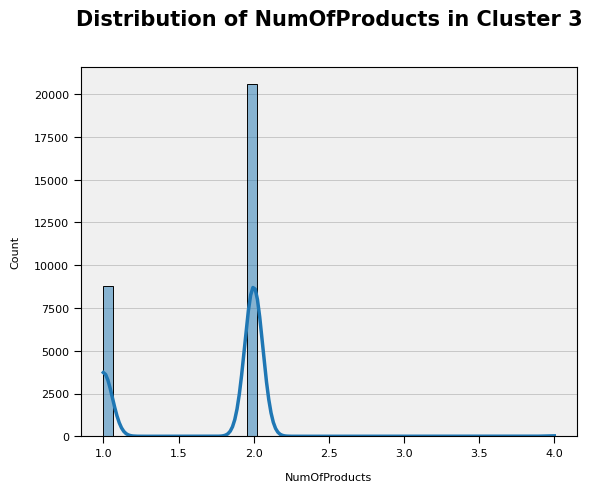

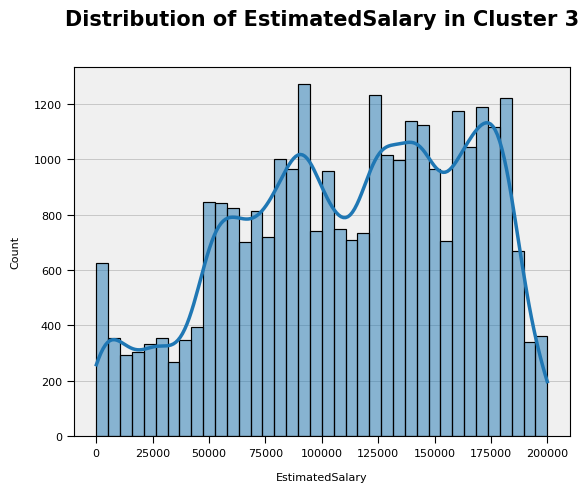


Categorical Features:

Geography:
Geography
France     0.999456
Germany    0.000544
Name: proportion, dtype: float64


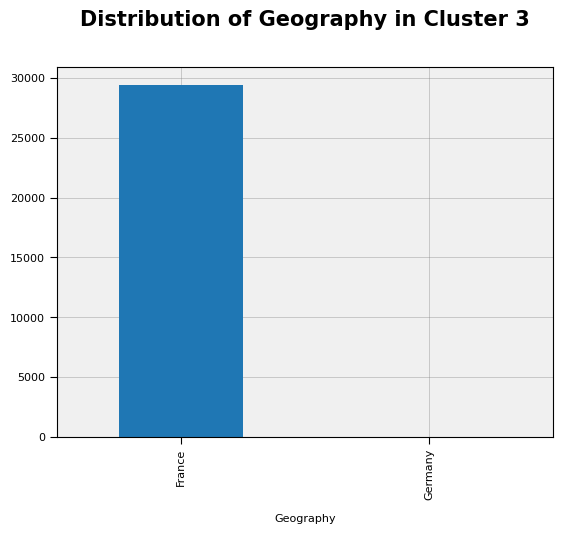


Gender:
Gender
Female    1.0
Name: proportion, dtype: float64


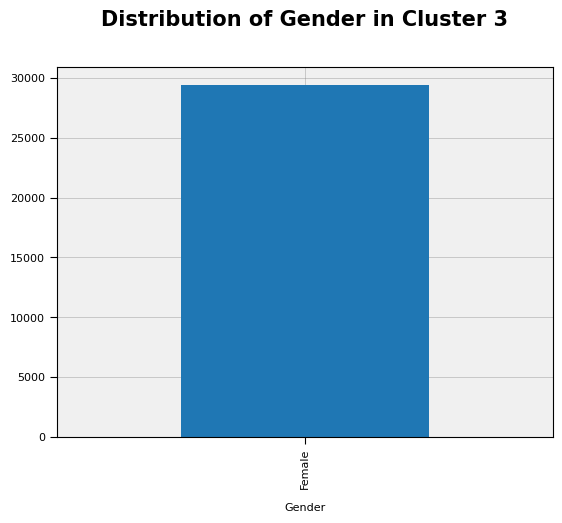


HasCrCard:
HasCrCard
1.0    0.762873
0.0    0.237127
Name: proportion, dtype: float64


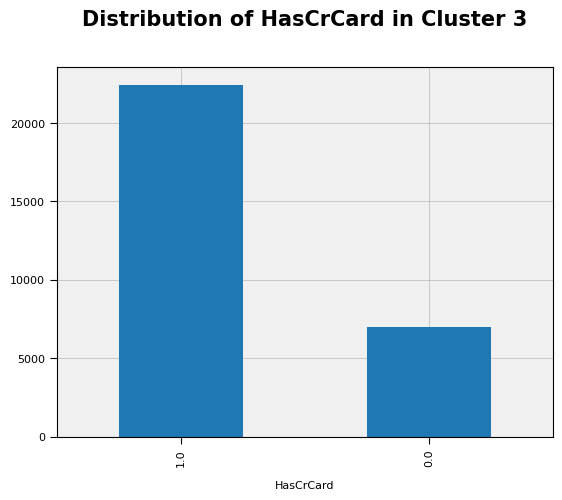


IsActiveMember:
IsActiveMember
0.0    0.509193
1.0    0.490807
Name: proportion, dtype: float64


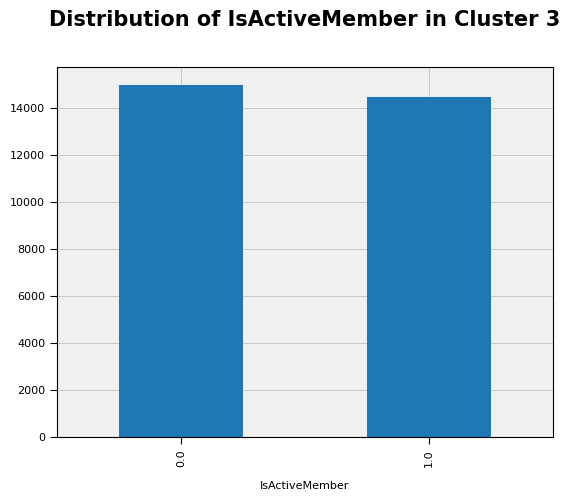

-----------------------------------

Analysis for Cluster 5:

Numerical Features:
       CreditScore          Age       Tenure        Balance  NumOfProducts  \
count  2894.000000  2894.000000  2894.000000    2894.000000         2894.0   
mean    654.621631    43.549067     4.948514   64438.112554            3.0   
std      84.825827     9.411228     2.774715   63242.207417            0.0   
min     363.000000    18.000000     0.000000       0.000000            3.0   
25%     592.000000    37.000000     3.000000       0.000000            3.0   
50%     653.000000    43.000000     5.000000   81281.075000            3.0   
75%     712.000000    50.000000     7.000000  122453.970000            3.0   
max     850.000000    77.000000    10.000000  250898.090000            3.0   

       EstimatedSalary  
count      2894.000000  
mean     113181.530318  
std       49499.087323  
min         142.810000  
25%       75745.825000  
50%      117785.420000  
75%      155645.190000  
max      199775

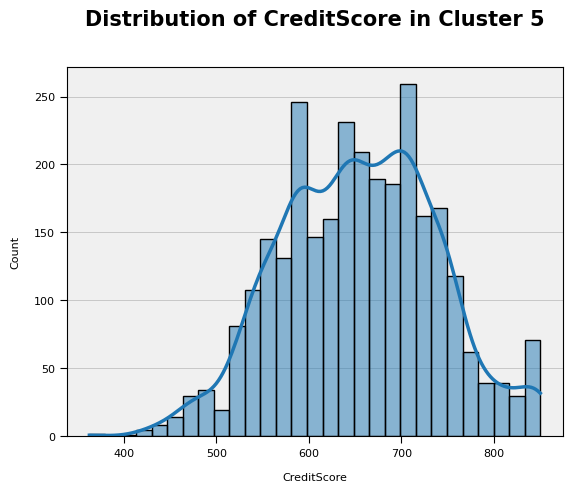

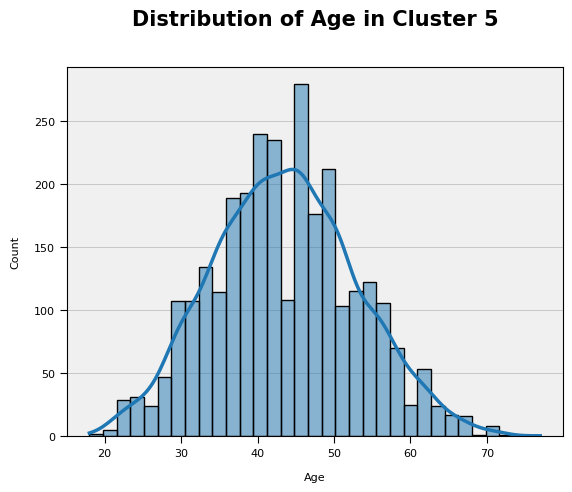

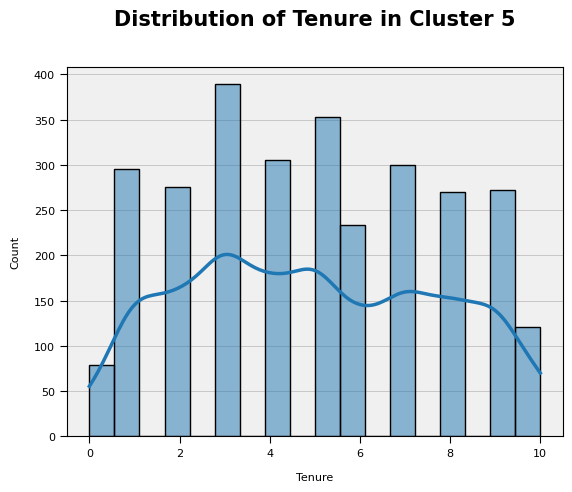

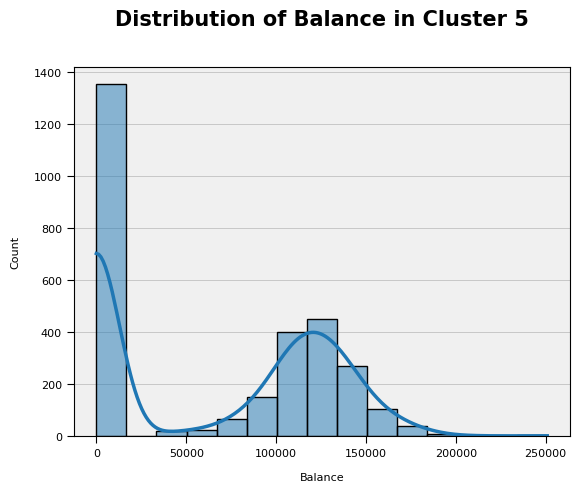

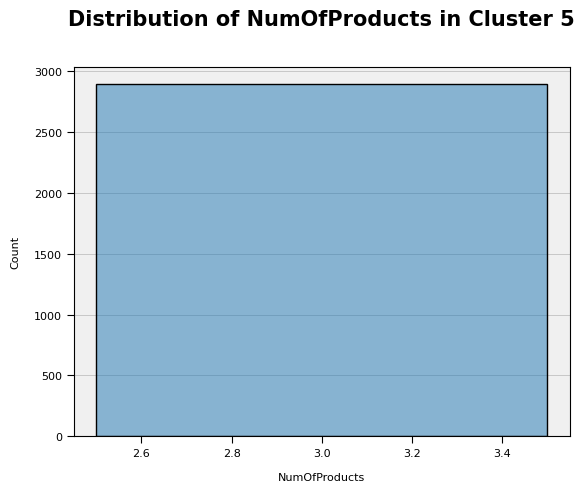

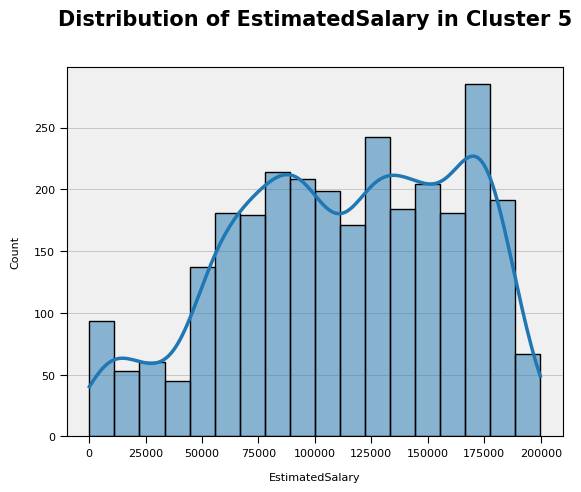


Categorical Features:

Geography:
Geography
France     0.448514
Germany    0.343124
Spain      0.208362
Name: proportion, dtype: float64


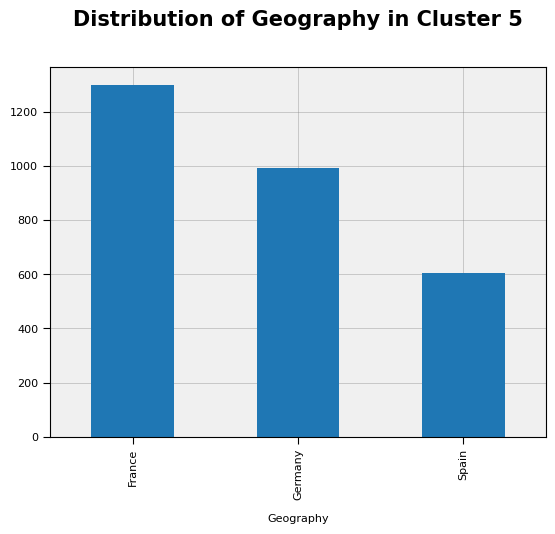


Gender:
Gender
Female    0.550449
Male      0.449551
Name: proportion, dtype: float64


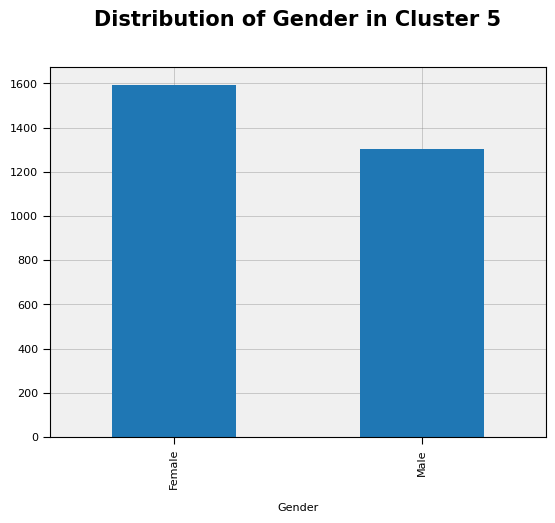


HasCrCard:
HasCrCard
1.0    0.739461
0.0    0.260539
Name: proportion, dtype: float64


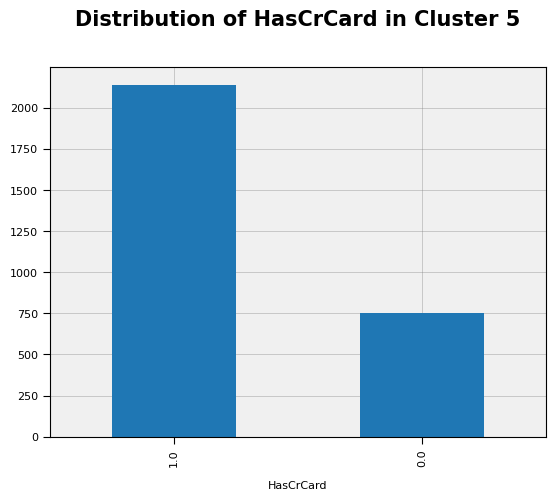


IsActiveMember:
IsActiveMember
0.0    0.679682
1.0    0.320318
Name: proportion, dtype: float64


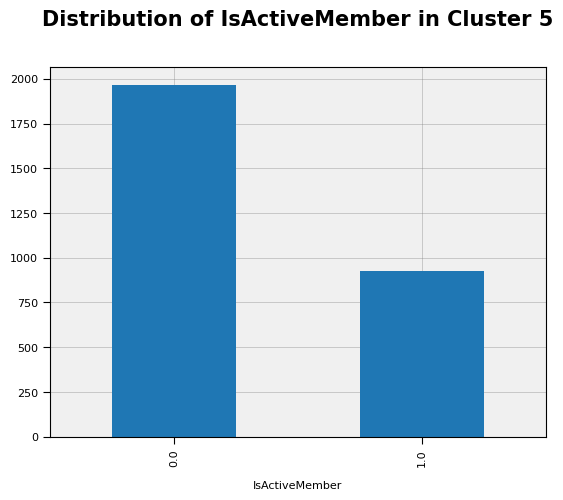

-----------------------------------


In [187]:
df_clustered = df.copy()
df_clustered['Cluster'] = kmeans.labels_
for cluster in df_clustered['Cluster'].unique():
    cluster_data = df_clustered[df_clustered['Cluster'] == cluster]
    print(f"\nAnalysis for Cluster {cluster}:")

    # Numerical features
    numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
    print("\nNumerical Features:")
    print(cluster_data[numerical_cols].describe()) # Descriptive statistics
    for col in numerical_cols:
      plt.figure()
      sns.histplot(cluster_data[col], kde=True) # Distribution within cluster
      plt.title(f'Distribution of {col} in Cluster {cluster}')
      plt.show()

    # Categorical features
    categorical_cols = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
    print("\nCategorical Features:")
    for col in categorical_cols:
        print(f"\n{col}:")
        print(cluster_data[col].value_counts(normalize=True)) # proportions
        cluster_data[col].value_counts().plot(kind='bar')
        plt.title(f'Distribution of {col} in Cluster {cluster}')
        plt.show()
    print("-----------------------------------")


In [188]:
df_clustered

id  CustomerId         Surname  CreditScore Geography  Gender  \
0            0    15674932  Okwudilichukwu          668    France    Male   
1            1    15749177   Okwudiliolisa          627    France    Male   
2            2    15694510           Hsueh          678    France    Male   
3            3    15741417             Kao          581    France    Male   
4            4    15766172       Chiemenam          716     Spain    Male   
...        ...         ...             ...          ...       ...     ...   
165029  165029    15667085            Meng          667     Spain  Female   
165030  165030    15665521       Okechukwu          792    France    Male   
165031  165031    15664752            Hsia          565    France    Male   
165032  165032    15689614          Hsiung          554     Spain  Female   
165033  165033    15732798         Ulyanov          850    France    Male   

         Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       33.0       3       0.00              2        1.0             0.0   
1       33.0       1       0.00              2        1.0             1.0   
2       40.0      10       0.00              2        1.0             0.0   
3       34.0       2  148882.54              1        1.0             1.0   
4       33.0       5       0.00              2        1.0             1.0   
...      ...     ...        ...            ...        ...             ...   
165029  33.0       2       0.00              1        1.0             1.0   
165030  35.0       3       0.00              1        0.0             0.0   
165031  31.0       5       0.00              1        1.0             1.0   
165032  30.0       7  161533.00              1        0.0             1.0   
165033  31.0       1       0.00              1        1.0             0.0   

        EstimatedSalary  Exited  Cluster  
0             181449.97       0        2  
1              49503.50       0        2  
2             184866.69       0        2  
3              84560.88       0        4  
4              15068.83       0        0  
...                 ...     ...      ...  
165029        131834.75       0        0  
165030        131834.45       0        2  
165031        127429.56       0        2  
165032         71173.03       0        0  
165033         61581.79       1        2  

[165034 rows x 15 columns]

In [189]:
churn_rate_by_cluster = df_clustered.groupby('Cluster')['Exited'].value_counts(normalize=True).unstack(fill_value=0)
churn_rate_by_cluster['Churn Rate'] = churn_rate_by_cluster[1]  # Churn is represented by 1
print("\nChurn Rate by Cluster:")
print(churn_rate_by_cluster[['Churn Rate']])



Churn Rate by Cluster:
Exited   Churn Rate
Cluster            
0          0.159840
1          0.363149
2          0.105250
3          0.208103
4          0.173552
5          0.882516


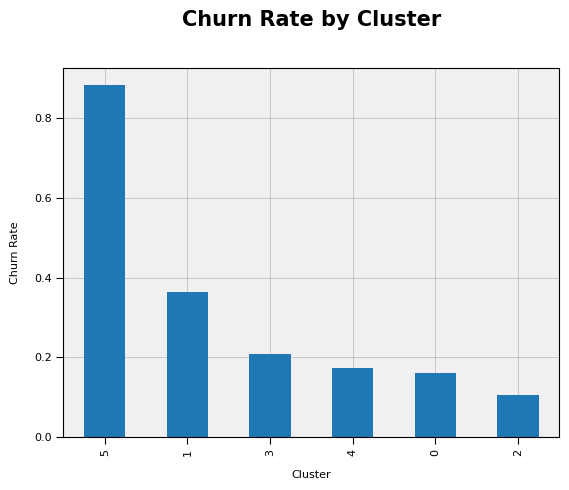

In [190]:
churn_rate_by_cluster=churn_rate_by_cluster.sort_values(by='Churn Rate', ascending=False)
churn_rate_by_cluster['Churn Rate'].plot(kind='bar')
plt.title('Churn Rate by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Churn Rate')
plt.show()


##### <code style="background:orange;color:black"> **Insights** </code>

**Cluster 0 – "Low-Churn Spanish Loyalists"**
- Churn Rate: 15.98%
- Credit Score: 657
- Age: ~38 years
- Tenure: 5 years
- Balance: Moderate (~39,581)
- Geography: Primarily Spain
- Gender: 57% Male
- Number of Products: Predominantly 2
- Active Membership: 51% active
- Credit Card Holders: 74%
- Churn Likelihood: Low
- Characteristics: Balanced across most demographics and financial metrics. Located primarily in Spain. 
- Interpretation: This group represents a stable customer base with average churn. They might be considered a "baseline" for comparison with other clusters. These customers are predominantly from Spain, mid-aged, and moderately active with moderate balances. Efforts to maintain engagement and financial activity could sustain retention.

**Cluster 1 – "High-Churn German Leavers"**
- Churn Rate: 36.31%
- Credit Score: 657
- Age: ~40 years
- Tenure: ~5 years
- Balance: High (~121,395)
- Geography: Mostly Germany
- Gender: 53% Male
- Number of Products: Primarily 2, some with 1
- Active Membership: 47% active
- Credit Card Holders: 75%
- Churn Likelihood: Medium to High
- Characteristics: High balances, primarily located in Germany.
- Interpretation: Despite high balances, this cluster has the highest churn rate. This suggests that factors beyond balance are influencing churn in this segment, potentially related to specific needs or preferences of German customers. In addition, active member engagement programs can help reduce churn risk.

**Cluster 2 – "Lowest-Churn Male Mavericks"**
- Churn Rate: 10.53%
- Credit Score: 655
- Age: ~37 years
- Tenure: ~5 years
- Balance: Very Low (~5,642)
- Geography: Mixed (Germany presence negligible)
- Gender: 100% Male
- Number of Products: 2
- Active Membership: 52%
- Credit Card Holders: 77%
- Churn Likelihood: Low
- Characteristics: Lowest balances, almost exclusively male.
- Interpretation: Surprisingly, this group has the lowest churn rate despite low balances. Customers in this cluster are more likely to stay due to higher engagement and product usage. This suggests that other factors, such as gender-specific targeting or product satisfaction, might be contributing to their loyalty.


**Cluster 3 – "Moderate-Churn Inactive Isolates"**
- Churn Rate: 20.81%
- Credit Score: 656
- Age: ~38 years
- Tenure: 5 years
- Balance: Low (~7,450)
- Geography: Minimal Germany representation
- Gender: 100% Female
- Number of Products: 2
- Active Membership: 49%
- Credit Card Holders: 76%
- Churn Likelihood: Medium
- Characteristics: Low balances, almost exclusively female, less active.
- Interpretation: This cluster consists entirely of female customers with low balances and average engagement. This group has a moderate churn rate, likely influenced by both low balances and inactivity. They might benefit from targeted engagement efforts to increase activity and product usage.


**Cluster 4 – "Low-Churn High-Balance Minimalists"**
- Churn Rate: 17.36%
- Credit Score: 658
- Age: ~38 years
- Tenure: ~5 years
- Balance: Very High (~124,142)
- Geography: Mostly Spain
- Gender: 60% Male
- Number of Products: Primarily 1
- Active Membership: 51%
- Credit Card Holders: 75%
- Churn Likelihood: Low
- Characteristics: High balances, primarily use one product.
- Interpretation: Customers here maintain high balances with minimal product usage. This group has a relatively low churn rate, likely due to high balances. However, their single product usage presents an opportunity for cross-selling or upselling to increase engagement and potentially reduce churn further. Offering product bundles may boost engagement.

**Cluster 5 – "Older, Moderate Balance, Less Engaged"**
- Churn Rate: 88.25%
- Credit Score: 655
- Age: ~44 years
- Tenure: 5 years
- Balance: ~64,438
- Geography: Mixed (Germany and Spain)
- Gender: 45% Male
- Number of Products: Primarily 1
- Active Membership: 32% (lowest)
- Credit Card Holders: 74%
- Churn Likelihood: High
- Characteristics: Older, uses multiple products, least active, below-average credit score.
- Interpretation: This group has the highest churn rate by far. Their older age, lower credit score, and lower activity levels might be contributing factors. They might require tailored retention strategies or product offerings to address their specific needs and concerns.


In [191]:
df_prediction

id  CustomerId    Surname  CreditScore Geography  Gender   Age  \
0       165034    15773898   Lucchese          586    France  Female  23.0   
1       165035    15782418       Nott          683    France  Female  46.0   
2       165036    15807120         K?          656    France  Female  34.0   
3       165037    15808905  O'Donnell          681    France    Male  36.0   
4       165038    15607314    Higgins          752   Germany    Male  38.0   
...        ...         ...        ...          ...       ...     ...   ...   
110018  275052    15662091      P'eng          570     Spain    Male  29.0   
110019  275053    15774133        Cox          575    France  Female  36.0   
110020  275054    15728456      Ch'iu          712    France    Male  31.0   
110021  275055    15687541   Yegorova          709    France  Female  32.0   
110022  275056    15663942       Tuan          621    France  Female  37.0   

        Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0            2       0.00              2        0.0             1.0   
1            2       0.00              1        1.0             0.0   
2            7       0.00              2        1.0             0.0   
3            8       0.00              1        1.0             0.0   
4           10  121263.62              1        1.0             0.0   
...        ...        ...            ...        ...             ...   
110018       7  116099.82              1        1.0             1.0   
110019       4  178032.53              1        1.0             1.0   
110020       2       0.00              2        1.0             0.0   
110021       3       0.00              1        1.0             1.0   
110022       7   87848.39              1        1.0             0.0   

        EstimatedSalary  Churn_Predicted  Churn_Probability  
0             160976.75                0           0.041323  
1              72549.27                1           0.915308  
2             138882.09                0           0.082940  
3             113931.57                0           0.329121  
4             139431.00                0           0.397862  
...                 ...              ...                ...  
110018        148087.62                0           0.056841  
110019         42181.68                0           0.187866  
110020         16287.38                0           0.040485  
110021        158816.58                0           0.258468  
110022         24210.56                1           0.603201  

[110023 rows x 15 columns]

In [192]:
df_encoded["Cluster"]=kmeans.labels_
df_encoded

risk_factors_by_cluster = df_encoded.groupby('Cluster').mean()
print(risk_factors_by_cluster[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited']])

         CreditScore  Geography    Gender        Age    Tenure        Balance  \
Cluster                                                                         
0         657.061776   2.000000  0.573844  37.823094  5.042562   39580.570890   
1         656.864385   1.000000  0.528282  39.605070  4.980580  121394.501273   
2         655.434469   0.000615  1.000000  36.923252  5.064251    5642.245755   
3         655.732318   0.000544  0.000000  38.024267  5.006288    7449.498636   
4         657.718080   0.005052  0.597409  37.936912  4.998085  124141.719245   
5         654.621631   0.759848  0.449551  43.549067  4.948514   64438.112554   

         NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary    Exited  
Cluster                                                                       
0             1.557443   0.742883        0.514403    111535.182018  0.159840  
1             1.398356   0.750216        0.466833    113899.803699  0.363149  
2             1.759974   0.767196  

In [193]:
xgboost_feature_importances = xgb_model_v2.feature_importances_
feature_names = xgb_model_v2.get_booster().feature_names


In [194]:
feature_importances_dict = dict(zip(feature_names, xgboost_feature_importances))

weighted_risk_scores = {}
for cluster, values in risk_factors_by_cluster.iterrows():
    weighted_score = sum(values[feature] * feature_importances_dict.get(feature, 0) for feature in feature_importances_dict)
    weighted_risk_scores[cluster] = weighted_score

print(weighted_risk_scores)


{0: np.float64(1187.691258444781), 1: np.float64(3216.1189332344857), 2: np.float64(349.0474808645804), 3: np.float64(394.3729193493633), 4: np.float64(3282.2250364005813), 5: np.float64(1806.6887670131182)}


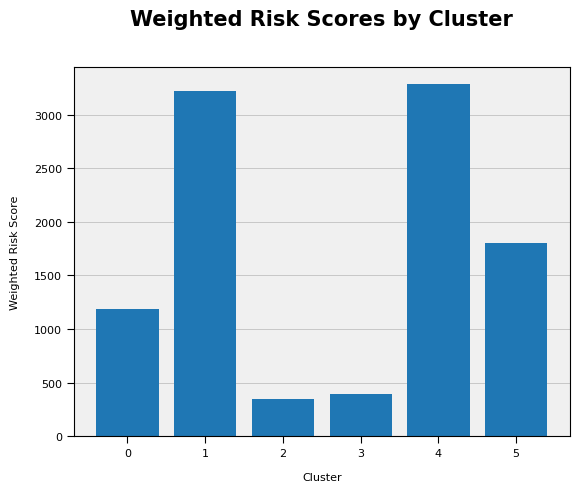

In [195]:
clusters = list(weighted_risk_scores.keys())
scores = list(weighted_risk_scores.values())

plt.bar(clusters, scores)
plt.xlabel('Cluster')
plt.ylabel('Weighted Risk Score')
plt.title('Weighted Risk Scores by Cluster')
plt.show()
